# Introducción


Alumnos:

- Ferrari, Enzo.

- Rodriguez, Abril.

El propósito principal del presente trabajo es realizar predicciones si lloverá o no mañana y cuánto lloverá en cinco ciudades de Australia. A lo largo del estudio, se explorarán diversos algoritmos y técnicas, abarcando tanto métodos de clasificación como de regresión. Entre las metodologías empleadas se encuentran regresiones lineales y logísticas, así como el uso de redes neuronales.

Iniciamos el proyecto con una exploración exhaustiva del conjunto de datos, donde se analizan detalladamente todas las variables involucradas. Se lleva a cabo un proceso de limpieza que incluye la identificación y tratamiento de outliers, así como la gestión de valores faltantes. Este paso fue crucial para asegurar la calidad de los resultados y la robustez de los modelos a desarrollar.

Posteriormente, nos adentramos en el ámbito de la regresión lineal, entrenando modelos con diversas características con el fin de quedarnos con aquella que ofrece el mejor rendimiento en términos de coeficiente R^2 y errores mínimos.

Continuamos nuestra exploración incorporando técnicas de regularización, como Lasso, Ridge y Elastic Net, con el objetivo de mejorar la estabilidad y generalización de nuestros modelos.

Además, desarrollaremos modelos de redes neuronales para clasificación y para regresión, aprovechando la capacidad de las mismas para capturar patrones complejos y relaciones no lineales en los datos.

En el proceso de interpretación de nuestros modelos, implementaremos la técnica SHAP, brindándonos insights valiosos sobre la importancia de cada variable en nuestras predicciones.

Finalmente, incorporaremos prácticas de MLOps para  ??¿¿

# Librerías

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.5 MB/s eta 0:00:00


In [ ]:
pip install tensorflow

In [ ]:
# Importaciones generales
import warnings
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, stats

# Importaciones de scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.base import BaseEstimator, TransformerMixin

# Modelos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Manejo de desequilibrio de clases
from imblearn.over_sampling import RandomOverSampler

# Modelos y métricas de TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc

# Optimización de hiperparámetros con Optuna
import optuna

# Carga del dataset
El archivo *weather-AUS.csv* consiste en un dataset de registros metereológicos de Australia.

El objetivo del trabajo es la predicción de las variables **RainTomorrow** y **RainFallTomorrow**. Además, se analizará solo sobre las ciudades Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport.


In [ ]:
data = pd.read_csv("weatherAUS.csv")

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/Aprendizaje Automatico I/TP/weatherAUS.csv')

Como sólo trabajaremos con 5 ciudades de todo el dataset, las filtraremos.

In [ ]:
data = data[data['Location'].isin(['Sydney','SydneyAirport','Canberra','Melbourne','MelbourneAirport'])]
data

Unnamed: 0        Date   Location  MinTemp  MaxTemp  Rainfall  \
30167       30176  2008-02-01     Sydney     19.5     22.4      15.6   
30168       30177  2008-02-02     Sydney     19.5     25.6       6.0   
30169       30178  2008-02-03     Sydney     21.6     24.5       6.6   
30170       30179  2008-02-04     Sydney     20.2     22.8      18.8   
30171       30180  2008-02-05     Sydney     19.7     25.7      77.4   
...           ...         ...        ...      ...      ...       ...   
70366       70387  2017-06-20  Melbourne      6.4     15.8       0.0   
70367       70388  2017-06-21  Melbourne      7.8     13.5       0.6   
70368       70389  2017-06-22  Melbourne      6.7     14.1       0.2   
70369       70390  2017-06-23  Melbourne      7.4     14.9       0.0   
70370       70391  2017-06-24  Melbourne      8.3     12.3       1.4   

       Evaporation  Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm  \
30167          6.2       0.0         NaN            NaN  ...        84.0   
30168          3.4       2.7         NaN            NaN  ...        73.0   
30169          2.4       0.1         NaN            NaN  ...        86.0   
30170          2.2       0.0         NaN            NaN  ...        90.0   
30171          NaN       0.0         NaN            NaN  ...        74.0   
...            ...       ...         ...            ...  ...         ...   
70366          2.4       8.8           N           39.0  ...        56.0   
70367          0.6       0.0         NNW           24.0  ...        80.0   
70368          0.6       0.0           N           24.0  ...        56.0   
70369          1.6       6.0         NNW           44.0  ...        63.0   
70370          1.8       5.6          SW           30.0  ...        63.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
30167      1017.6       1017.4       8.0       8.0     20.7     20.9   
30168      1017.9       1016.4       7.0       7.0     22.4     24.8   
30169      1016.7       1015.6       7.0       8.0     23.5     23.0   
30170      1014.2       1011.8       8.0       8.0     21.4     20.9   
30171      1008.3       1004.8       8.0       8.0     22.5     25.5   
...           ...          ...       ...       ...      ...      ...   
70366      1028.1       1024.5       1.0       7.0      7.9     15.6   
70367      1028.8       1028.4       7.0       7.0     11.2     12.7   
70368      1028.2       1024.8       7.0       7.0      7.5     13.5   
70369      1018.8       1013.8       1.0       7.0      9.1     12.5   
70370      1018.7       1017.4       2.0       7.0      9.6     11.2   

       RainToday  RainTomorrow  RainfallTomorrow  
30167        Yes           Yes               6.0  
30168        Yes           Yes               6.6  
30169        Yes           Yes              18.8  
30170        Yes           Yes              77.4  
30171        Yes           Yes               1.6  
...          ...           ...               ...  
70366         No            No               0.6  
70367         No            No               0.2  
70368         No            No               0.0  
70369         No           Yes               1.4  
70370        Yes            No               0.0  

[15986 rows x 25 columns]

Con el método 'info' veremos las columnas, la cantidad de registros no-nulos y el tipo de dato que contiene cada una.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15986 entries, 30167 to 70370
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15986 non-null  int64  
 1   Date              15986 non-null  object 
 2   Location          15986 non-null  object 
 3   MinTemp           15495 non-null  float64
 4   MaxTemp           15500 non-null  float64
 5   Rainfall          15199 non-null  float64
 6   Evaporation       14280 non-null  float64
 7   Sunshine          14038 non-null  float64
 8   WindGustDir       14529 non-null  object 
 9   WindGustSpeed     14531 non-null  float64
 10  WindDir9am        15291 non-null  object 
 11  WindDir3pm        15696 non-null  object 
 12  WindSpeed9am      15725 non-null  float64
 13  WindSpeed3pm      15737 non-null  float64
 14  Humidity9am       15416 non-null  float64
 15  Humidity3pm       15461 non-null  float64
 16  Pressure9am       15251 non-null  fl

El dataset ya filtrado cuenta con 25 columnas y 15986 registros. Sin embargo, se observa que la gran mayoría de las columnas posee valores nulos.

Por otro lado, gran parte de ellas contienen datos tipo float, mientras que algunas pocas son de tipo object.

In [ ]:
print("El dataset contiene ", len(data.columns), " columnas en total.")

El dataset contiene  25  columnas en total.


Separaremos en dos listas las variables numéricas y categóricas para mayor comodidad y también para luego visualizarlas por separado.

In [ ]:
def numericas_categoricas(df):
  '''Divide el dataframe en variables numéricas
  y categóricas'''
  numerical = []
  categorical = []
  for columna in df.columns:
    if df[columna].dtype in ['float64','int64']:
      numerical.append(columna)
    if df[columna].dtype == 'object':
      categorical.append(columna)
  return numerical, categorical

In [ ]:
numerical, categorical = numericas_categoricas(data)
numerical.remove('Unnamed: 0')
categorical.remove('Date') # No nos interesa explorar la fecha
print(numerical)
print(categorical)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainfallTomorrow']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Con el método 'describe', obtendremos un resumen estadístico de cada variable. Esto nos será de interés para ver, en rasgos generales, cómo se distribuye cada una de ellas, así como también los valores mínimos y máximos con el fin de evidenciar valores atípicos a simple vista.

In [ ]:
data_describe = data.describe()
data_describe

Unnamed: 0       MinTemp       MaxTemp      Rainfall   Evaporation  \
count  15986.000000  15495.000000  15500.000000  15199.000000  14280.000000   
mean   49512.619855     11.605221     21.751781      2.303744      4.866828   
std    15172.399796      5.851347      6.053679      7.385992      3.069869   
min    30176.000000     -8.000000      4.100000      0.000000      0.000000   
25%    34173.250000      7.900000     17.100000      0.000000      2.600000   
50%    47228.500000     11.600000     21.300000      0.000000      4.200000   
75%    66393.750000     15.800000     25.800000      0.800000      6.600000   
max    70391.000000     30.500000     46.800000    119.400000     23.800000   

           Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am  \
count  14038.000000   14531.000000  15725.000000  15737.000000  15416.000000   
mean       6.854694      44.417315     16.613672     21.797166     68.903023   
std        3.842419      14.958027     10.336386      9.518033     15.614788   
min        0.000000      11.000000      0.000000      0.000000     11.000000   
25%        3.700000      33.000000      9.000000     15.000000     59.000000   
50%        7.500000      43.000000     15.000000     20.000000     70.000000   
75%       10.000000      54.000000     22.000000     28.000000     80.000000   
max       13.900000     122.000000     69.000000     76.000000    100.000000   

        Humidity3pm   Pressure9am   Pressure3pm      Cloud9am      Cloud3pm  \
count  15461.000000  15251.000000  15260.000000  13309.000000  13054.000000   
mean      51.280577   1018.305836   1016.064239      4.750545      4.746131   
std       17.721335      7.400730      7.265386      2.728329      2.589879   
min        3.000000    986.700000    985.500000      0.000000      0.000000   
25%       39.000000   1013.400000   1011.200000      2.000000      2.000000   
50%       51.000000   1018.500000   1016.300000      6.000000      6.000000   
75%       62.000000   1023.300000   1021.000000      7.000000      7.000000   
max      100.000000   1040.600000   1037.900000      9.000000      8.000000   

            Temp9am       Temp3pm  RainfallTomorrow  
count  15481.000000  15490.000000      15199.000000  
mean      15.545953     20.229154          2.302586  
std        5.559295      5.857956          7.385251  
min       -1.300000      3.700000          0.000000  
25%       11.600000     15.900000          0.000000  
50%       15.400000     19.800000          0.000000  
75%       19.500000     24.100000          0.800000  
max       37.200000     46.100000        119.400000

En la gran mayoría de las variables la media es aproximadamente igual que la mediana, esto quiere decir que sus distribuciones tienden a ser simétricas.

Se puede concluir que los valores que están presentes en el dataset son certeros, no parece haber valores atípicos en una vista global.

Sin embargo, se cuentan con una gran cantidad de datos faltates, en todas las columnas. Debemos decidir qué hacer con estos datos.

# Datos faltantes

En el siguiente código, se observa que las cuatro variables a explicar (Rainfall, RainfallTomorrow, RainToday, RainTomorrow) presentan la misma cantidad de valores faltantes, con un total de 787 observaciones incompletas para cada una.

Además, como el porcentaje de faltantes representa menos del 10% del conjunto total de datos, tomamos la decisión de eliminar las filas correspondientes a estos valores nulos. Optamos por esta acción ya que carece de sentido imputar o completar los valores para estas variables, considerando la proporción reducida de datos ausentes.

In [ ]:
data.isnull().sum()

Unnamed: 0             0
Date                   0
Location               0
MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

In [ ]:
data.dropna(subset=['Rainfall', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'], inplace=True)

In [ ]:
print(f'Cantidad de registros: {data.shape[0]}')
print(f'Registros con todos los datos presentes: {data.notnull().all(axis=1).sum()}')

print('Cantidad de registros faltantes para cada variable')
data.isna().sum()

Cantidad de registros: 15036
Registros con todos los datos presentes: 10461
Cantidad de registros faltantes para cada variable


Unnamed: 0             0
Date                   0
Location               0
MinTemp                8
MaxTemp                5
Rainfall               0
Evaporation         1681
Sunshine            1931
WindGustDir         1436
WindGustSpeed       1434
WindDir9am           672
WindDir3pm           288
WindSpeed9am         260
WindSpeed3pm         249
Humidity9am           86
Humidity3pm           43
Pressure9am          252
Pressure3pm          244
Cloud9am            1900
Cloud3pm            2136
Temp9am               22
Temp3pm               14
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

Notamos que ninguna columna pasa de un 20% de valores faltantes. Es factible entonces llenar los valores faltantes en todas las columnas.

A continuación, vemos graficados los datos faltantes según localidad

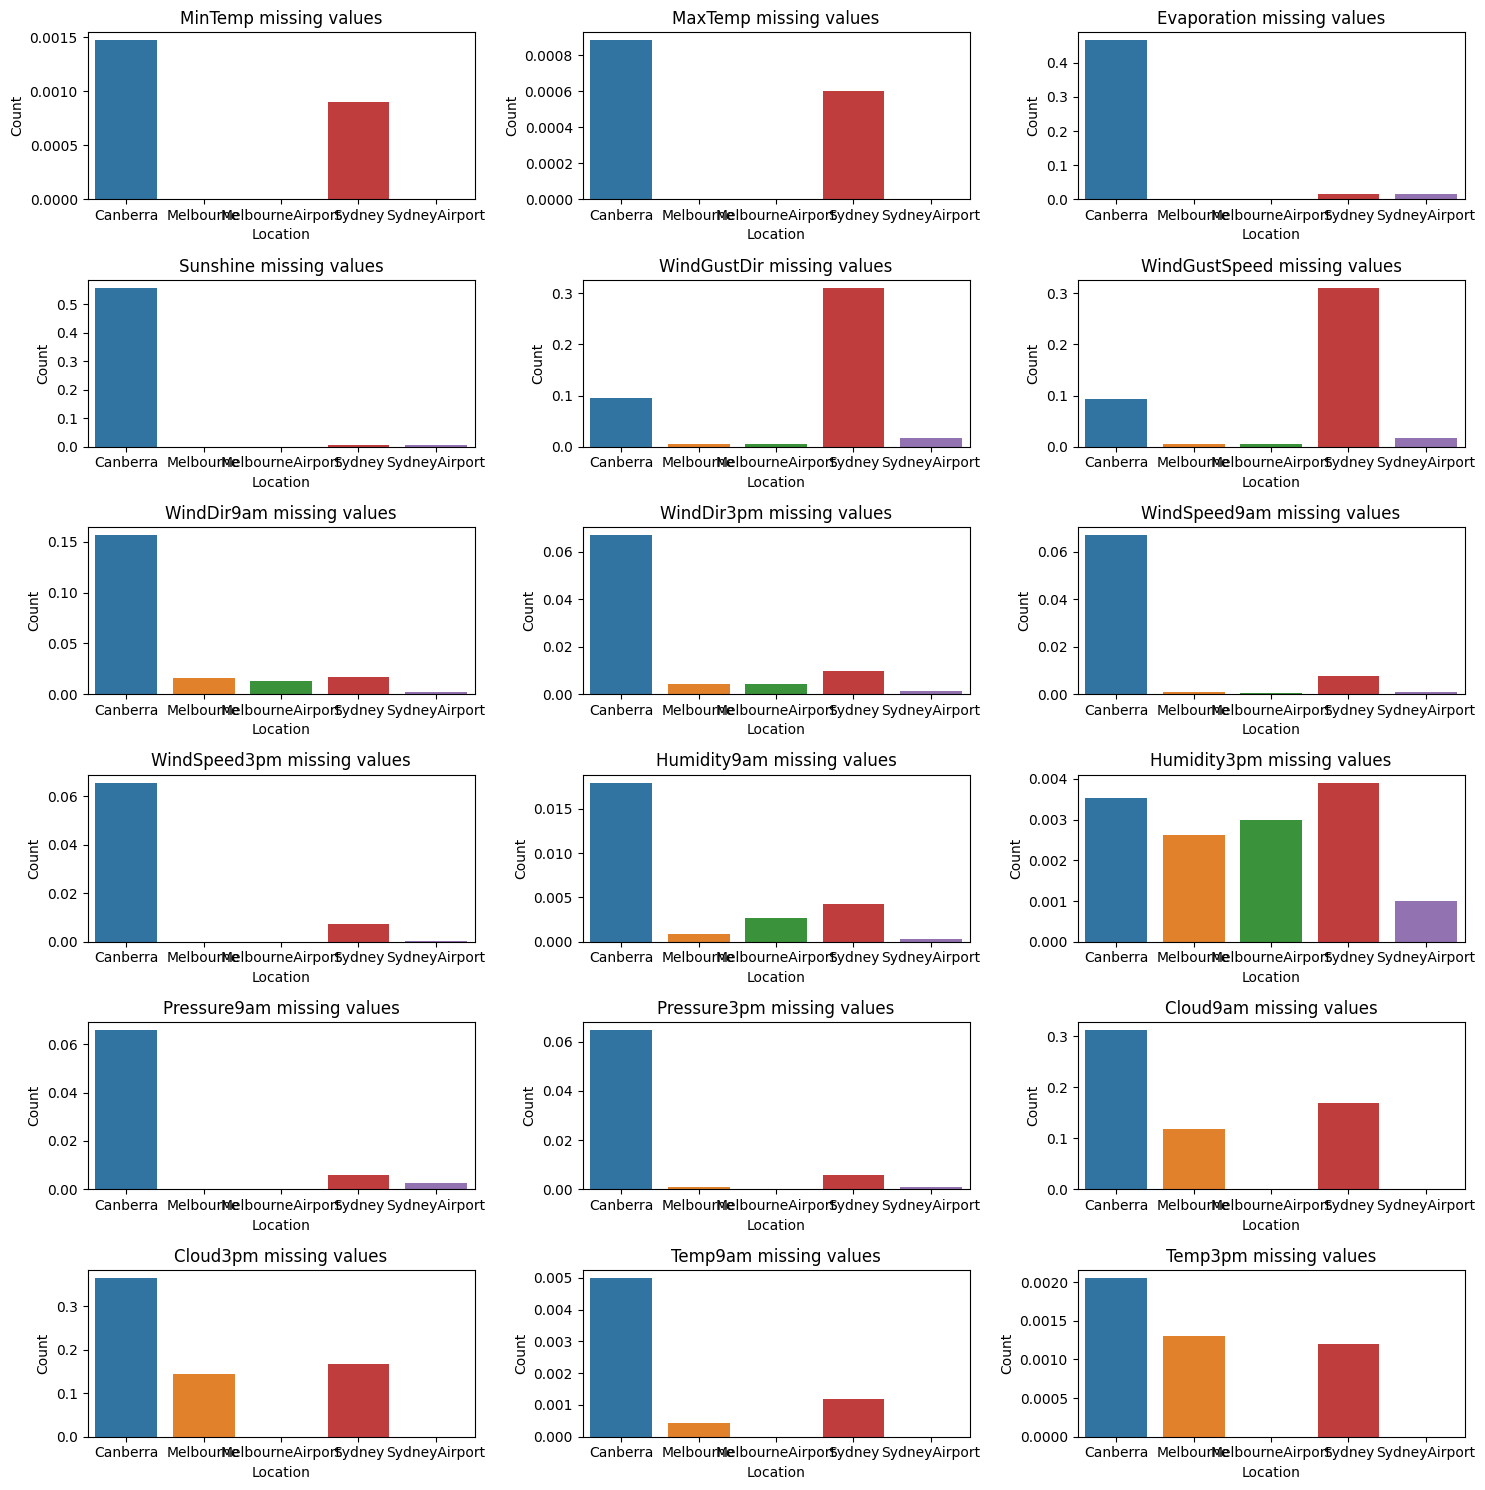

In [ ]:
def plot_missing_values(df):
    '''Recibe un dataframe y realiza un gráfico representando
    los valores nulos en cada columna'''

    x_size = 6  # Nro de filas
    y_size = 3  # Nro de columnas

    # lista de columnas con al menos un valor nulo
    columns_with_missing_values = df.columns[df.isnull().any()].tolist()
    total_plots = len(columns_with_missing_values)
    x_size = (total_plots // y_size) + (1 if total_plots % y_size != 0 else 0)

    plt.figure(figsize=(15, 15))

    for n_col, column in enumerate(columns_with_missing_values):
        plt.subplot(x_size, y_size, n_col + 1)
        # verificar si hay valores nulos en la columna actual
        if df[column].isnull().any():
            data_missing = df.groupby('Location')[column].apply(lambda x: x.isna().sum() / x.size)
            sns.barplot(x=data_missing.index, y=data_missing.values)
            plt.ylabel('Count')
            plt.title(f'{column} missing values')

    plt.tight_layout()
    plt.show()

# Uso de la función
plot_missing_values(data)

Observamos que la mayor cantidad de datos faltantes para todas las columnas coinciden con la ciudad de Canberra.

## Valores faltantes para variables numéricas
Para llenar los valores faltantes de cada variable, consideramos como una opción completar con la media de cada localidad ya que la mayoría de las distribuciones son simétricas.

Sin embargo, notamos que los valores faltantes de cada columna se encuentran distribuidos la mayoría sobre una ciudad. Esto dificulta nuestro método de rellenar valores faltantes ya que una ciudad puede tener una gran cantidad de ellos.

Analizando los valores faltantes de cada columna, vemos que aquellos que tienen una ciudad con una gran proporción de valores faltantes son Evaporation, Sunshine, Cloud9am y Cloud3pm. Podemos considerar tomar las medias globales, pero para esto deberiamos ver que la varianza no sea muy alta.

Podemos ver en el segundo gráfico que no hay una varianza alta, por lo que podemos completar con la media global para estas variables

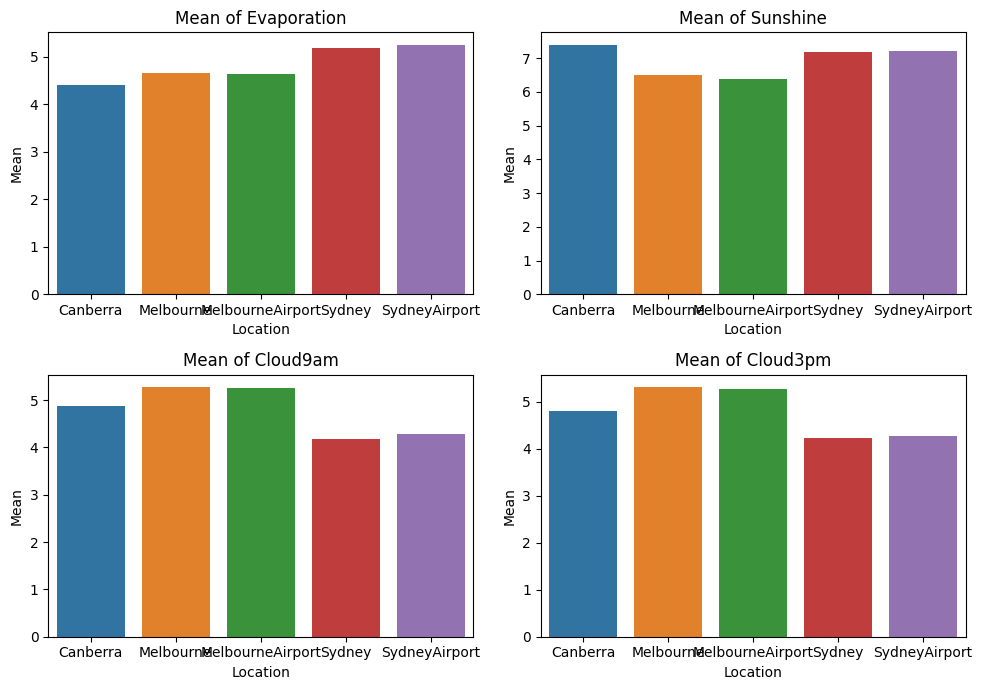

In [ ]:
def plot_promedio_por_localidad(df, columnas):
    '''Recibe un dataframe y columnas del mismo. Grafica
    el promedio por localidad de dichas columnas.'''

    total_plots = len(problematic_numerical)
    x_size = (total_plots // 2) + (1 if total_plots % 2 != 0 else 0)

    plt.figure(figsize=(10, 7))

    for n_col, column in enumerate(problematic_numerical):
        plt.subplot(x_size, 2, n_col + 1)
        data_mean = df.groupby('Location')[column].mean()
        sns.barplot(x=data_mean.index, y=data_mean.values)
        plt.ylabel('Mean')
        plt.title(f'Mean of {column}')

    plt.tight_layout()
    plt.show()

# Uso de la función
problematic_numerical = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
plot_promedio_por_localidad(data, problematic_numerical)

La imputación de valores faltantes mediante la sustitución por la media y la moda se realizará en etapas posteriores, específicamente durante la evaluación de los modelos y únicamente para el conjunto de entrenamiento.

Esta estrategia la implementaremos con el objetivo de prevenir la fuga de datos.

In [ ]:
# Completamos missing values
# non_problematic_numerical = list(set(numerical) - set(problematic_numerical))
# for column in non_problematic_numerical:
#   data[column] = data.groupby('Location')[column].transform(lambda x: x.fillna(x.mean()))

# for column in problematic_numerical:
#   data[column] = data[column].fillna(data[column].mean())

## Valores faltantes para variables categóricas
De manera similar a lo que hicimos para variables numéricas, decidimos completar las variables categóricas con la moda de su respectiva localidad. Sin embargo, esto será realizado más adelante para cada modelo, según lo explicado anteriormente.

In [ ]:
# Reemplazar missing values de categóricas

# categorical_explicative = list(set(categorical) - set(['Location', 'RainToday', 'RainTomorrow']))

# for column in categorical_explicative:
#     data[column] = data.groupby('Location')[column].apply(lambda x: x.fillna(x.mode().iloc[0])) # iloc dado que pueden dar varias modas

# Análisis exploratorio y tratamiento de datos
Las variables que intervienen en el dataset tienen distinta naturaleza: algunas son numéricas, otras categóricas, algunas tienen una mayor importancia que las otras y algunas tienen una mayor cantidad de valores faltantes que otras.

## Análisis
Para conocer la naturaleza de cada variable, debemos realizar un análisis exhaustivo sobre cada una de ellas.

A continuación, un histograma para cada variable númerica, y luego un boxplot.

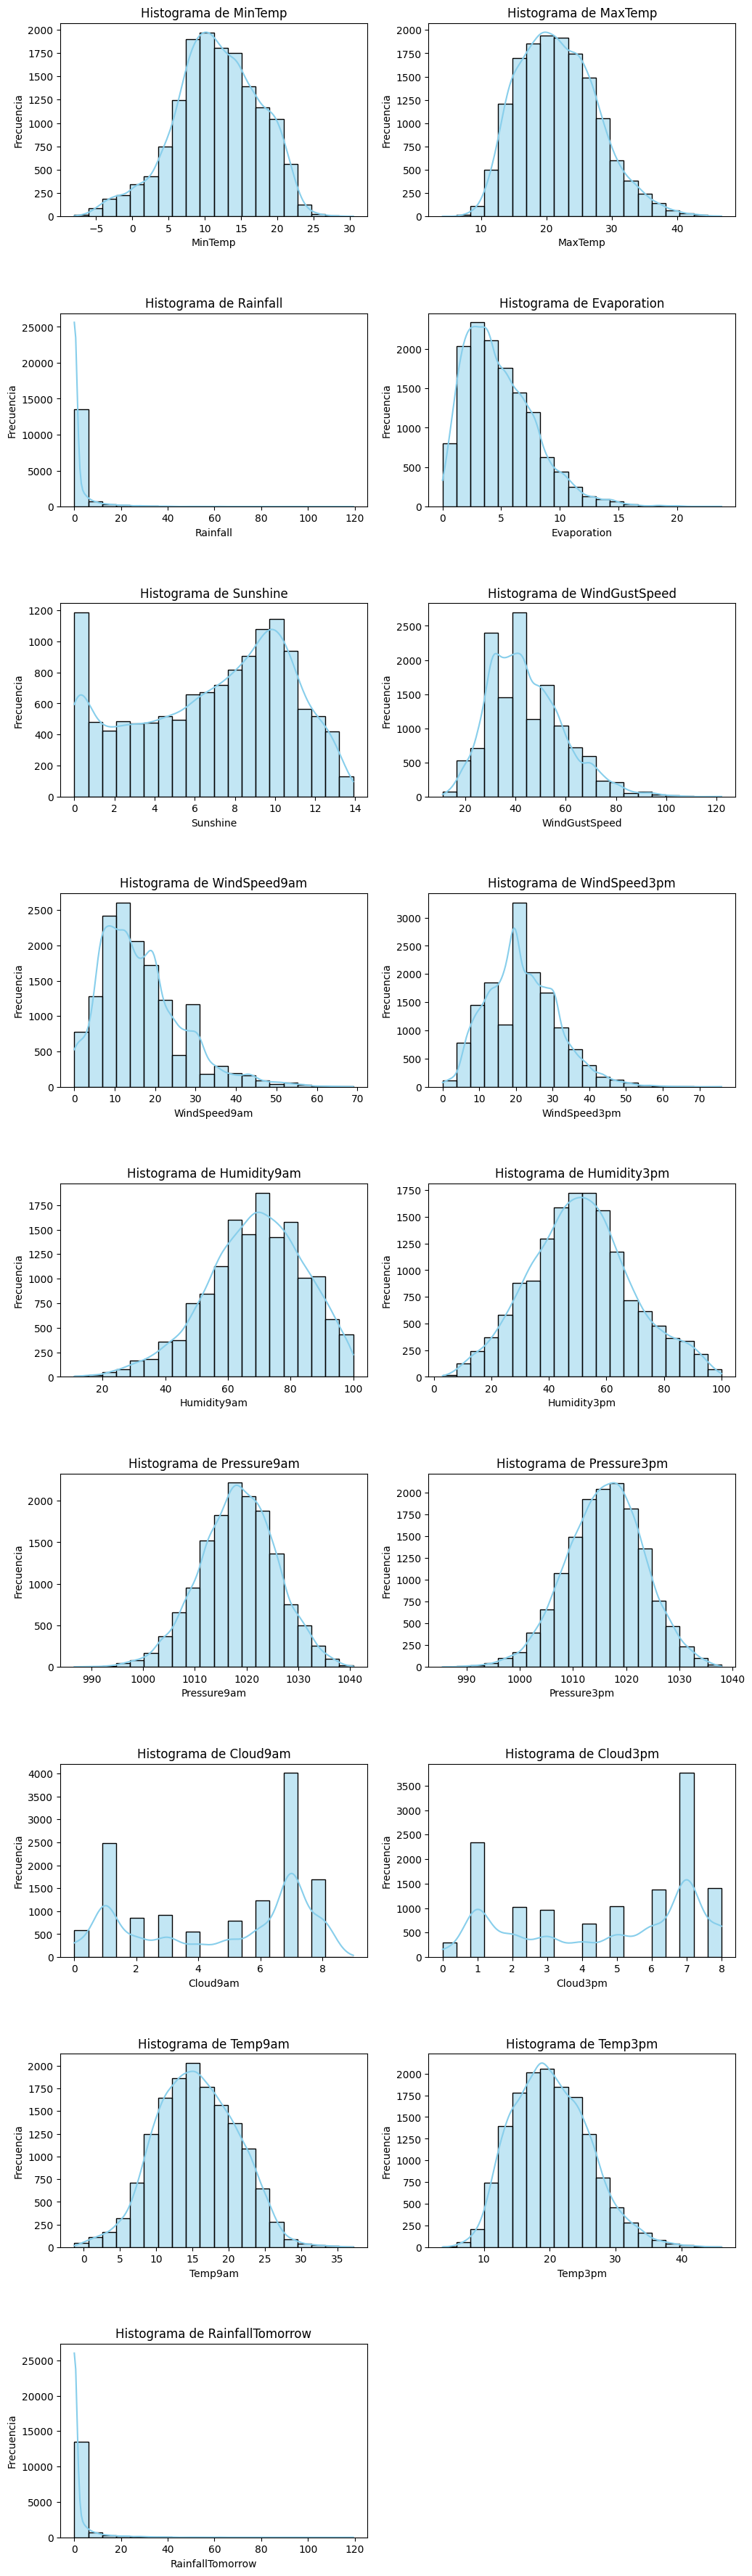

In [ ]:
def plot_histogramas(df, numerical):
    num_cols = len(numerical)
    num_rows = (num_cols // 2) + (1 if num_cols % 2 != 0 else 0)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(numerical):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        sns.histplot(df[column], bins=20, kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Histograma de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')

    # Eliminar el último subplot si hay un número impar de columnas
    if num_cols % 2 != 0:
        fig.delaxes(axes[num_rows-1, 1])

    plt.show()

# Uso de la función
plot_histogramas(data, numerical)

Se observa que las distribuciones de las variables presentan dos tendencias predominantes. Por un lado, algunas variables, como las relacionadas con las temperaturas, tienden a exhibir distribuciones simétricas. Por otro lado, variables como 'Evaporation' o las referidas a los vientos muestran levemente una inclinación, sugiriendo una leve asimetría.

Por otro lado, llama la atención la distribución de las dos variables objetivo, 'RainfallToday' y 'RainfallTomorrow', las cuales muestran una clara asimetría hacia la derecha. Esta asimetría se atribuye a que la mayoría de los días no experimentan lluvias significativas o incluso no llueven en absoluto, lo que resulta en una cola pesada hacia la derecha para los días con lluvias más intensas.

Estos últimos, al ser menos frecuentes, se consideran atípicos en comparación con la mayoría de los días sin lluvia o con lluvia moderada.

A continuación, se presenta un boxplot para cada variable numérica. Dado que las escalas entre las variables son diversas, procedemos a estandarizar temporalmente el conjunto de datos con el fin de lograr una visualización más coherente y comparativa.

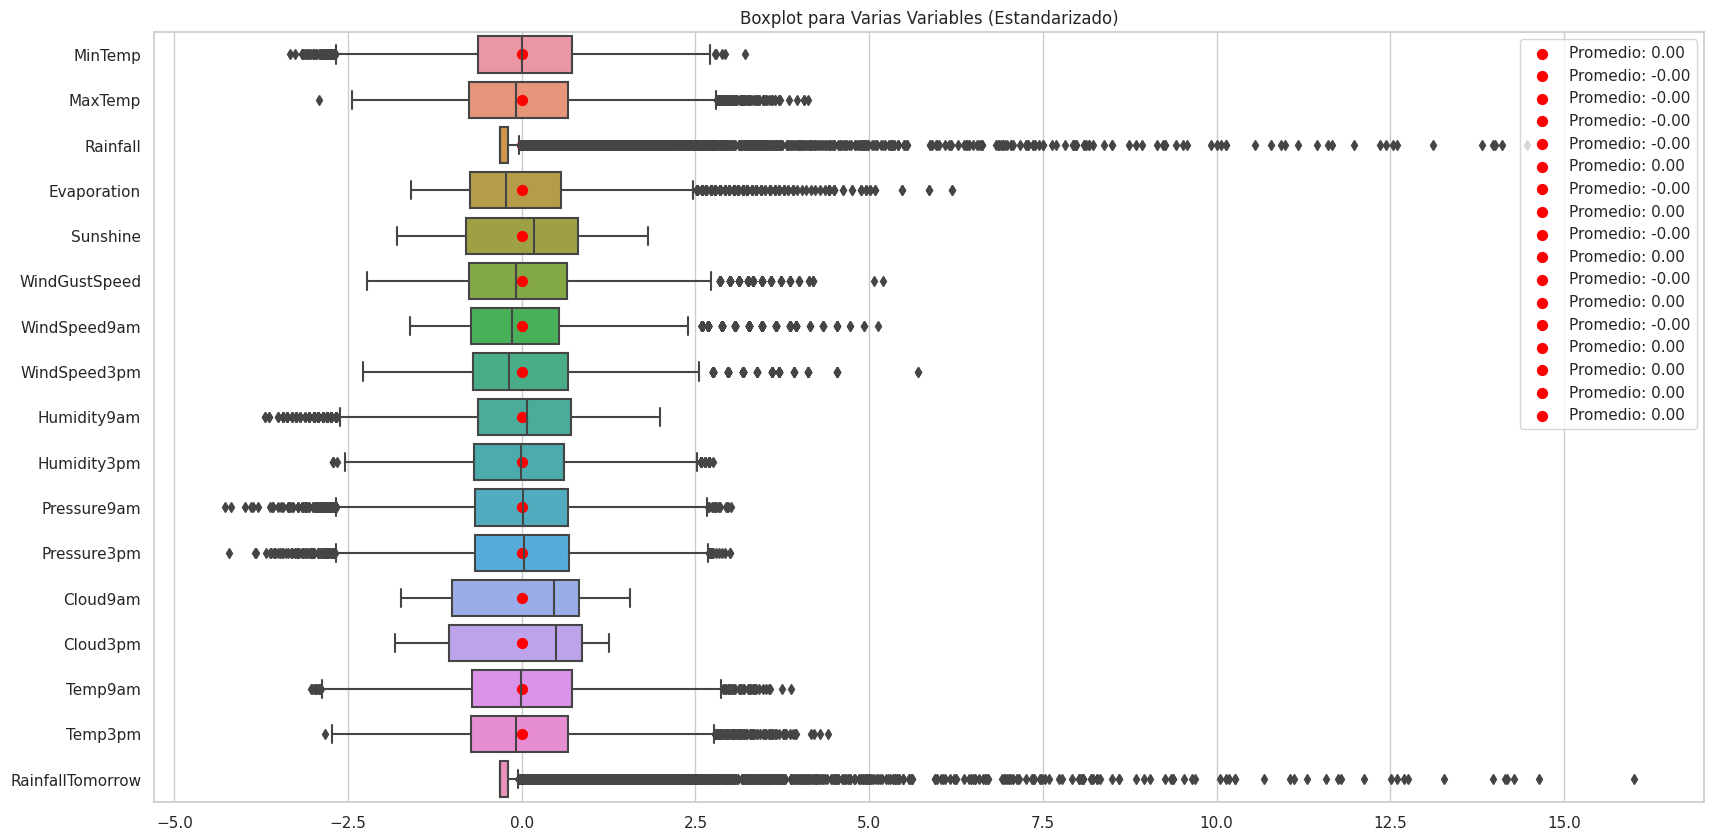

In [ ]:
def plot_boxplot_standarized(df):
    '''Recibe un dataframe con variables numéricas y realiza un boxplot
    para cada una de ellas.'''

    # Estandarizamos para la visualización
    df = (df - df.mean()) / df.std()
    means = df.mean()

    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 10))
    ax = sns.boxplot(data=df, orient="h")

    #promedios
    for i, mean in enumerate(means):
        ax.scatter(mean, i, color='red', marker='o', s=50, label=f'Promedio: {mean:.2f}')

    plt.yticks(range(len(df.columns)), df.columns)
    plt.title("Boxplot para Varias Variables (Estandarizado)")
    plt.legend(loc='upper right')
    plt.show()

plot_boxplot_standarized(data[numerical])

Efectivamente, se observa que la mayoría de las variables poseen distribuciones simétricas, es decir, que tienden a ser normales. Sin embargo, hay dos variables en donde esto no se cumple: Rainfall y RainfallTomorrow. Sus distribuciones son asimétricas hacia la derecha ya que la mayoría de los días no llueve. A causa de esto, gran parte de los días donde ha llovido se tomaron como atípicos (como también se vio en los histogramas)

Luego, graficaremos las variables categóricas para visualizar cómo se comportan.

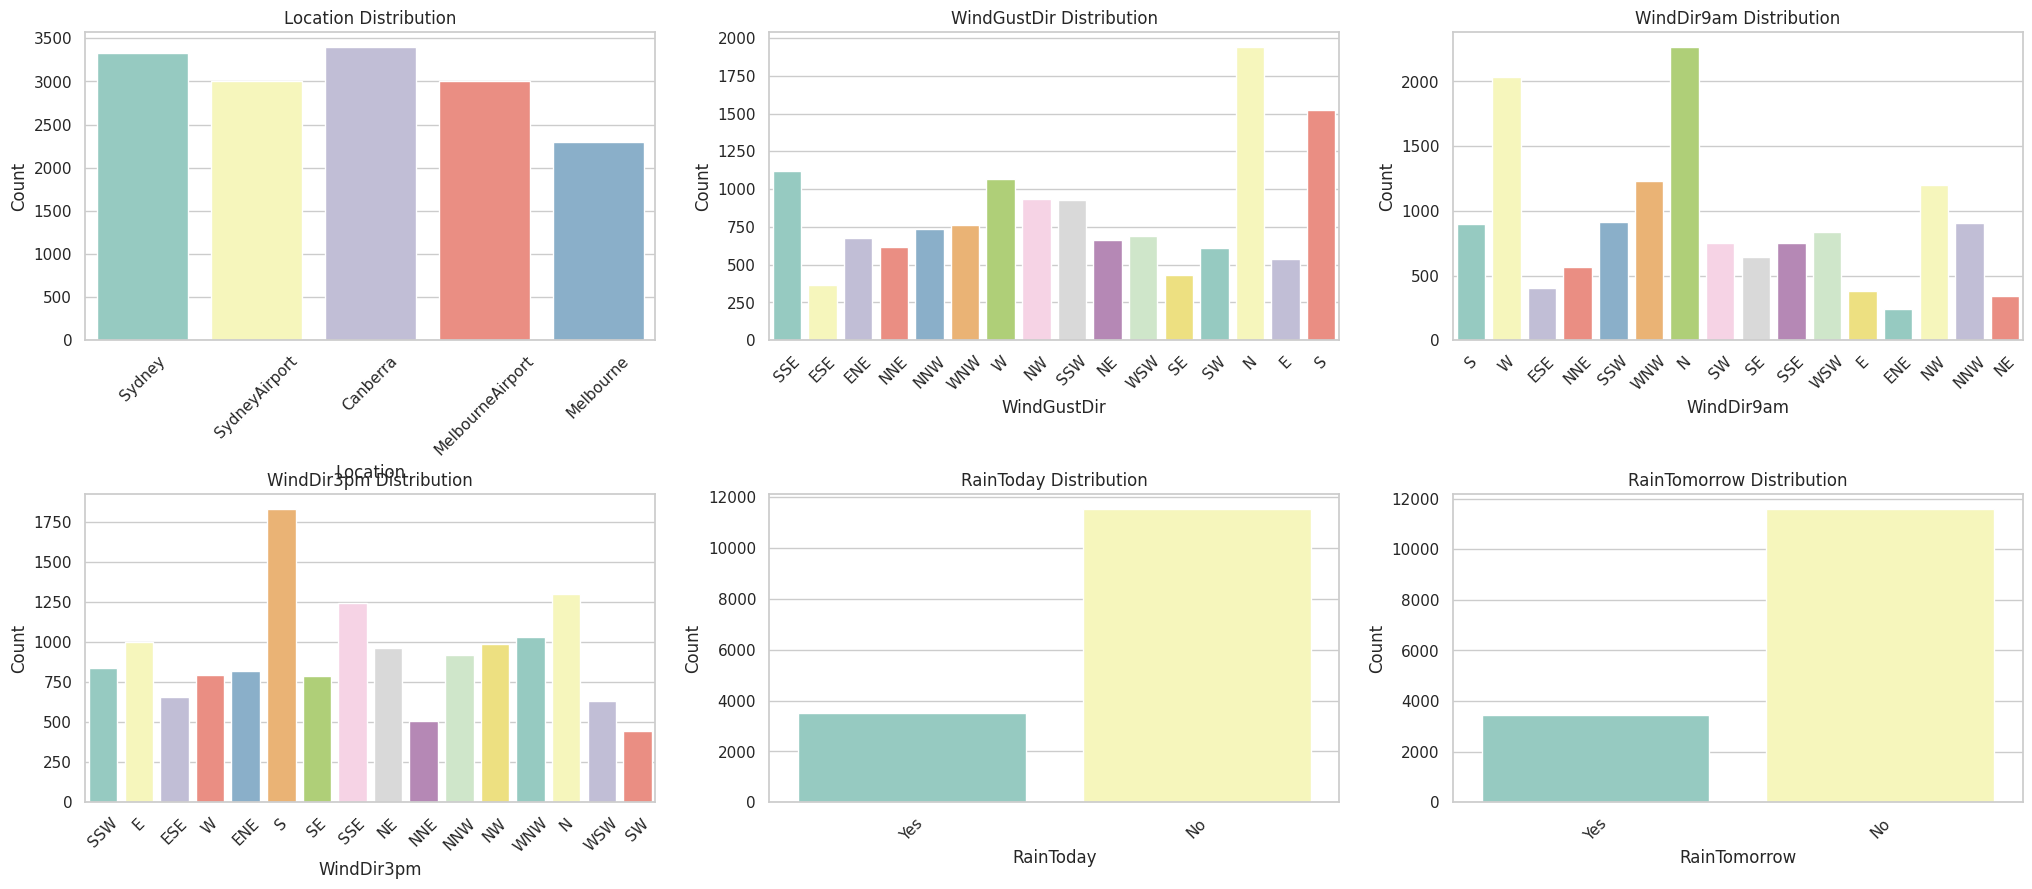

In [ ]:
def plot_distribuciones_categoricas(df, categorical):
    '''Recibe un dataframe y sus columnas categóricas y realiza
    un gráfico de distribuciones para cada una de ellas.'''
    num_plots = len(categorical)
    num_rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)

    fig, axes = plt.subplots(num_rows, 3, figsize=(25, num_rows * 5))
    fig.subplots_adjust(hspace=0.5)

    axes = axes.flatten()

    for i, var in enumerate(categorical):
        sns.countplot(data=df, x=var, palette="Set3", ax=axes[i])
        axes[i].set_title(f'{var} Distribution')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Eliminamos subgráficos vacíos si es necesario
    for j in range(num_plots, num_rows * 3):
        fig.delaxes(axes[j])

    plt.show()

plot_distribuciones_categoricas(data, categorical)

A primera vista, vemos que el dataset está desbalanceado debido a la gran diferencia entre los días que llueven y no llueven.


### Variable objetivo

Veamos como está distribuida nuestra variable objetivo

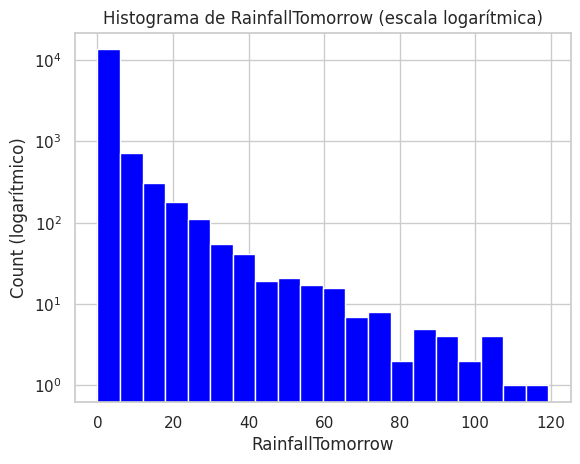

In [ ]:
def hist_escala_log(df):
  '''Recibe un dataframe con una columna y realiza
  un histograma en escala logarítmica para dicha columna.'''
  counts, bins, _ = plt.hist(df, bins=20, alpha=1, color='blue')
  plt.yscale('log')
  plt.xlabel('RainfallTomorrow')
  plt.ylabel('Count (logarítmico)')
  plt.title('Histograma de RainfallTomorrow (escala logarítmica)')
  plt.show()

hist_escala_log(data['RainfallTomorrow'])

Se observó anteriormente que hay una mayor cantidad de datos donde no llueve comparado con los días que llueve. Esto puede hacer que el modelo sea mejor para predecir dias en los que no llueva.

Por esta razón, los datos no se encuentran balanceados y este hecho se debe tener en cuenta en caso de realizar clasificación o dependiendo los objetivos del problema.

## Scatter plot
Veamos ahora como se relaciona cada variable respecto a nuestra variable objetivo. Para esto, usamos scatter plots.

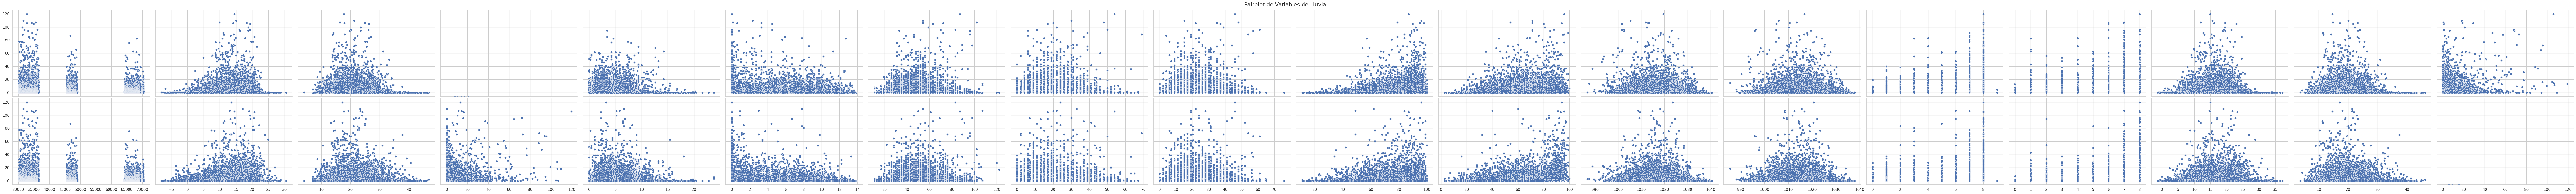

In [ ]:
def plot_pairplot(df, target_vars):
    sns.set(style='whitegrid')
    pairplot = sns.pairplot(df, y_vars=target_vars, height=4, aspect=1.5, kind='scatter', palette='viridis')

    # Ajustes visuales adicionales
    pairplot.fig.suptitle('Pairplot de Variables de Lluvia', y=1.02, fontsize=16)
    pairplot.set(xlabel='', ylabel='')

    plt.show()

# Uso de la función
target_variables = ['Rainfall', 'RainfallTomorrow']
plot_pairplot(data, target_variables)


## Análisis de correlación
Veamos ahora si existe correlación entre las variables explicativas, así podemos evitar el problema de la multicolinearidad.

Haremos un mapa de calor entre variables y analizaremos sus coeficientes de correlación.

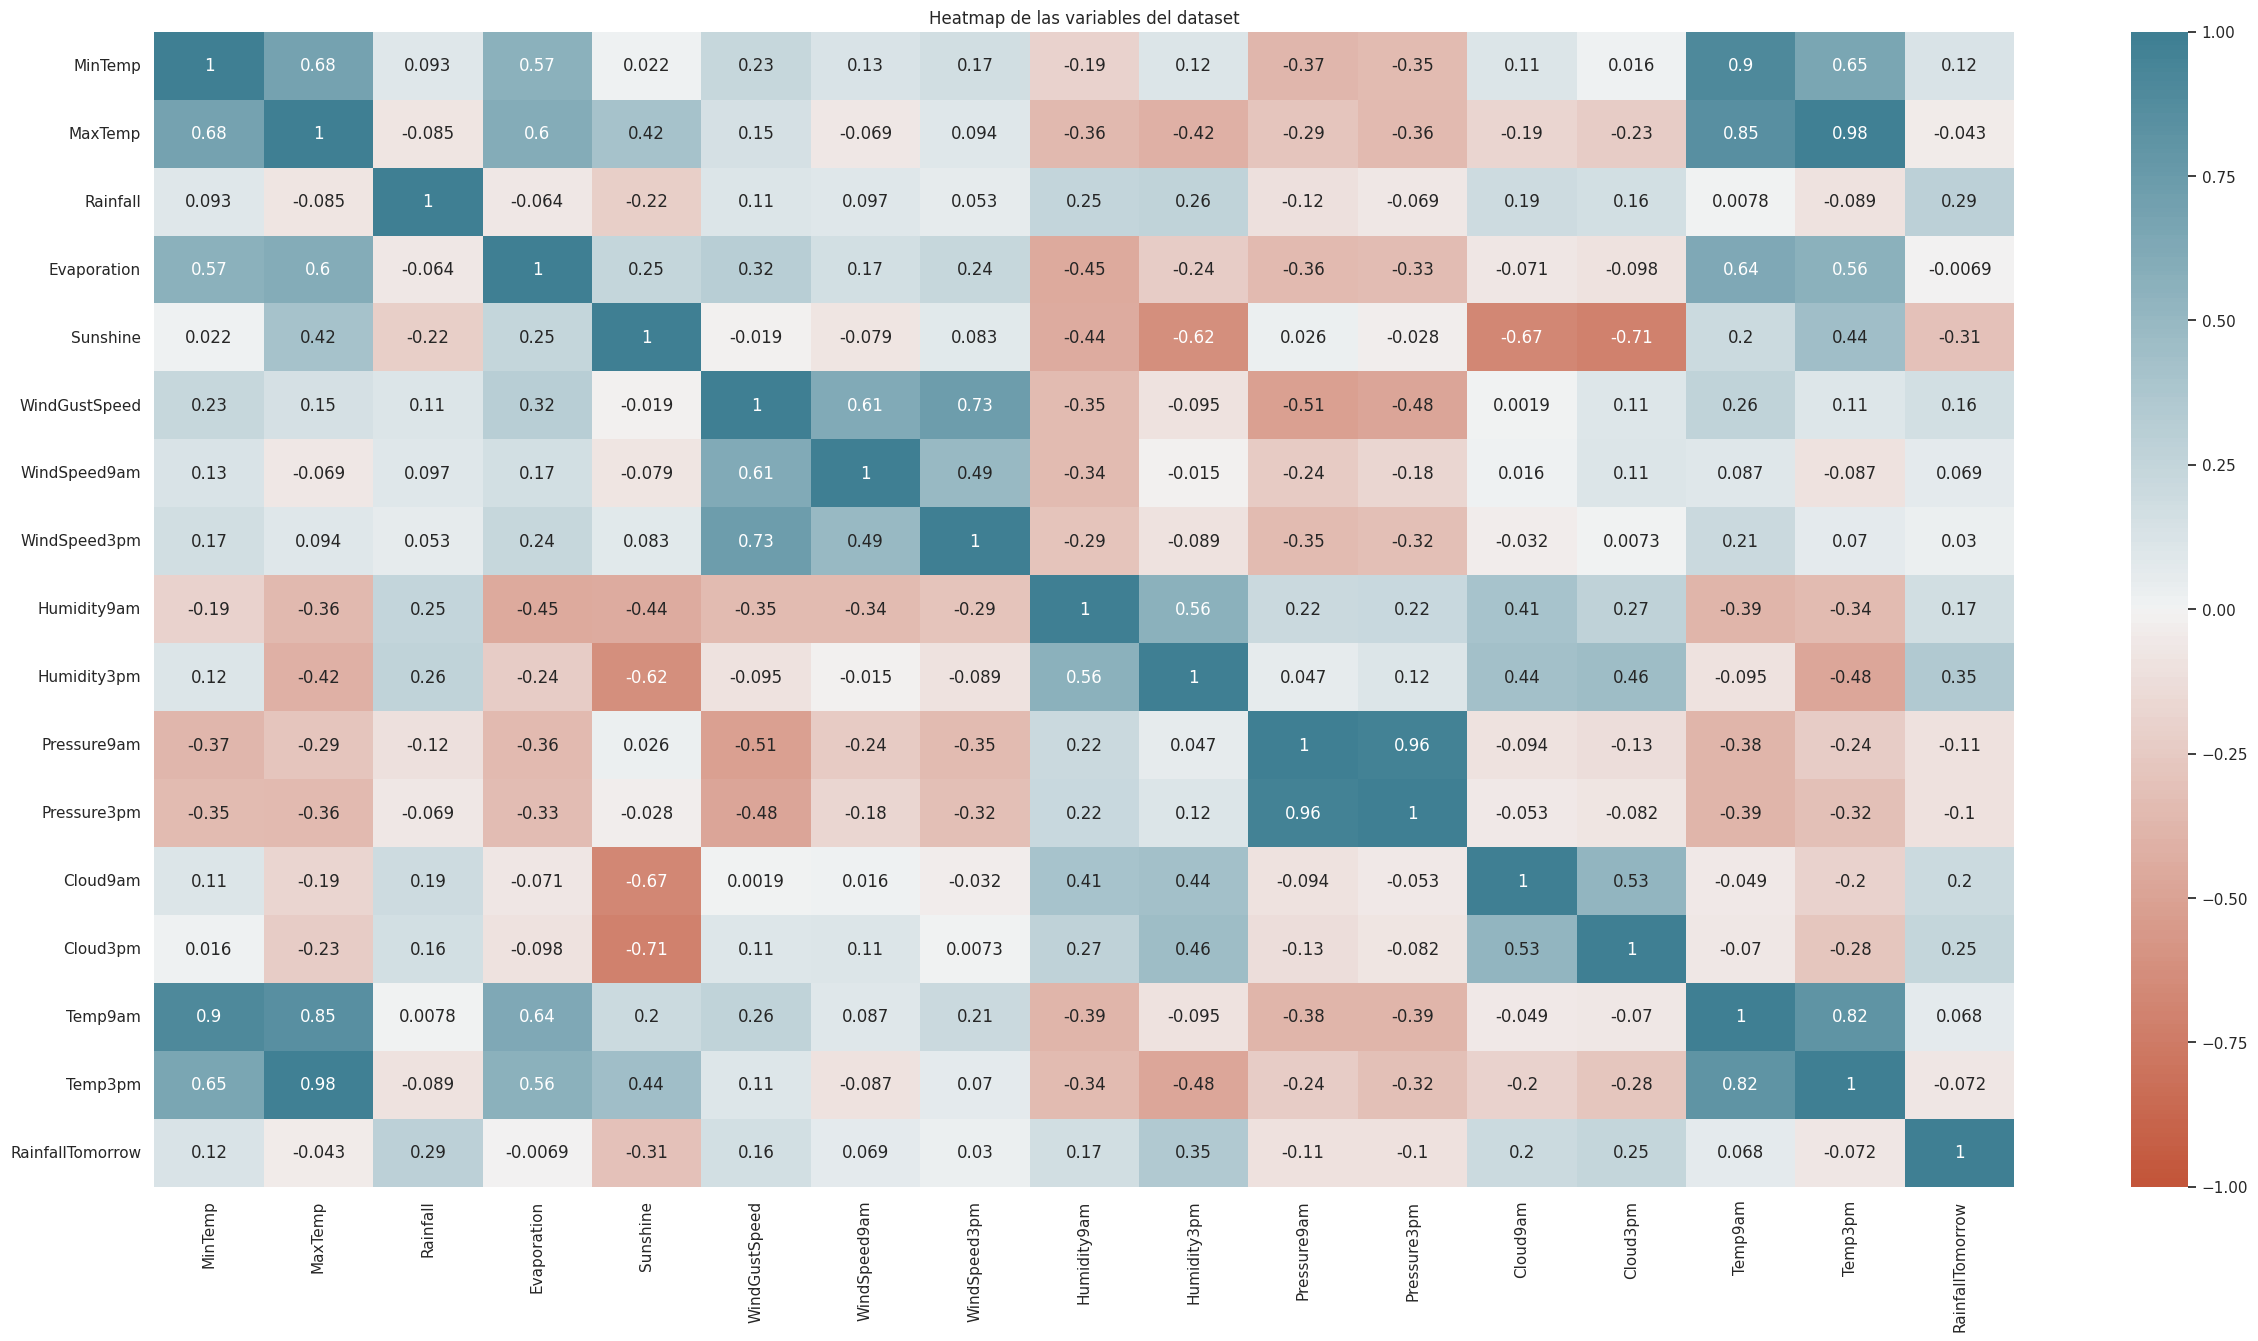

In [ ]:
def plot_heatmap(df):
    '''Recibe un dataframe y grafica el mapa de calor
    para correlaciones entre sus variables.'''

    matrix_corr = df.corr()
    plt.figure(figsize=(30, 15))
    ax = sns.heatmap(
        matrix_corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        annot=True
    )
    plt.title('Heatmap de las variables del dataset')
    plt.show()

plot_heatmap(data.drop(['Unnamed: 0'], axis=1))

Como contamos con muchas variables, se hace complicado visualizarlas correctamente. Veamos aquellos pares que tengan mayor correlación, ordenados de mayor a menor.

In [ ]:
def spearman_correlation(df):
    matrix_corr = df.corr(method='spearman')

    upper_matrix_corr = matrix_corr.where(
        np.triu(np.ones(matrix_corr.shape), k=1).astype(np.bool)
    )

    # Con estas matrices triangulares superiores
    top_pos_corr = upper_matrix_corr.unstack().dropna().sort_values(ascending=False).head(25)
    top_neg_corr = upper_matrix_corr.unstack().dropna().sort_values(ascending=True).head(20)

    print("Top Correlaciones Positivas:\n")
    print(top_pos_corr)
    print("\n---------------------------------")
    print("\nTop Correlaciones Negativas:\n")
    print(top_neg_corr)

# Uso de la función
spearman_correlation(data.drop(['Unnamed: 0'], axis=1))

Top Correlaciones Positivas:

Temp3pm           MaxTemp          0.979040
Pressure3pm       Pressure9am      0.958861
Temp9am           MinTemp          0.907703
                  MaxTemp          0.867431
Temp3pm           Temp9am          0.838596
WindSpeed3pm      WindGustSpeed    0.728540
MaxTemp           MinTemp          0.714429
Temp3pm           MinTemp          0.689171
Temp9am           Evaporation      0.656827
Evaporation       MaxTemp          0.624991
Temp3pm           Evaporation      0.593506
Evaporation       MinTemp          0.589493
WindSpeed9am      WindGustSpeed    0.560274
Humidity3pm       Humidity9am      0.543580
Cloud3pm          Cloud9am         0.538823
                  Humidity3pm      0.483107
Temp3pm           Sunshine         0.463241
Cloud9am          Humidity3pm      0.450757
RainfallTomorrow  Humidity3pm      0.449488
WindSpeed3pm      WindSpeed9am     0.449098
RainfallTomorrow  Cloud3pm         0.445548
Cloud9am          Humidity9am      0.439714
Su

## Selección de variables
La correlación entre las variables explicativas debe ser tenida en cuenta en el momento de aplicar el modelo. A pesar de que la correlación no afecta directamente al modelo, si incluímos variables que están fuertemente relacionadas, agregar ambas puede ser redundante, o incluso puede ser complicado interpretar los coeficientes dado que la multicolinearidad puede dar malos valores del z-value.

### Criterios

Decidimos tomar el siguiente criterio para tratar los pares de variables respecto a su correlación:
- entre 0.7 y 1: Alta correlación, estos pares deben ser tratados si o si.
- entre 0.3 y 0.7: Correlación moderada, se deben tomar consideraciones respecto a si tratamos o no estas variables.
- entre 0 y 0.3: Correlación baja, ignoramos estos pares.

Sin embargo, hay que esperar que haya correlación entre variables, al ser datos del clima, hay que considerar ser flexibles con este indicador.

### Variables

Por lo visto en las tablas anteriores, notamos que las siguientes variables tienen una correlación considerable:
- MinTemp, MaxTemp, Temp3pm, Temp9am: Todos los pares tomados de estas variables tienen una correlación alta, llegando lo más alto a ser 0.97. MinTemp tiene alta correlación con Temp9am y MaxTemp con Temp3pm, lo que es lógico ya que los extremos de temperatura se suelen dar en esos horarios. Se decide dropear Temp9am y Temp3pm y quedarnos con Min y Max, ya que aportan mayor explicabilidad. Sin embargo, también creamos una nueva columna que es el promedio, luego experimentando con los modelos decidiremos con cuál quedarnos.
- Pressure9am, Pressure3pm: Alta correlación, es razonable tomar el promedio entre estas dos para reducir las variables. Otra opción puede ser quedarnos con Pressure9am e incluir una nueva variable que tome la diferencia de presión, no habrá correlación y guarda la información de las dos variables.
- WindGustSpeed, WindSpeed9am, WindSpeed3pm: WindGustSpeed tiene una fuerte correlación con WindSpeed3pm, podríamos considerar dropear WindGustSpeed, y nos quedaríamos con WindSpeed3pm y WindSpeed9am.
- Sunshine: Tiene correlación negativa considerable con múltiples variables, puede generar muchos problemas incluirla. Podríamos dropearla esperando que la información de las nubes y la humedad. Sin embargo, tiene correlación con RainFallTomorrow ¿Qué hacemos?

### ¿Cómo podemos incluir la fecha?
A pesar de que no es incluir a la fecha como variable en el modelo, podemos tratar de convertirlo en algo más manejable. Una opción es tomar la temporada y otra es tomar el mes. Optamos por tomar el mes.

### Alternativa para la dirección del viento
Hay 16 tipos distintos de dirección. Podemos usar una transformación trigonométrica para representar la dirección, y así pasar de una variable categórica con 16 categorías a dos numéricas.

De esta manera perdemos interpretabilidad (¿Cómo entendemos la evaluación del coseno y seno en el modelo?) pero compactamos las variables y contemplamos la cercanía y naturaleza de las direcciones (en una codificación one-hot todas las direcciones son perpendiculares).

¡Incluso podemos hacer lo mismo para la fecha!

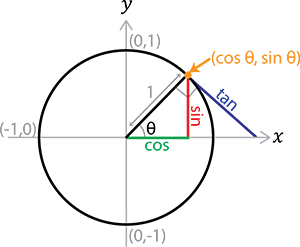

A continuación, agregaremos una nueva variable al dataset: "Month". Ésta será necesaria a la hora de hacer regresión y mucho más manejable que "Date".

In [ ]:
def agregar_mes(df, date_column_name):
    '''Agrega una columna al DataFrame con el mes correspondiente a la fecha.'''

    # nos aseguramos que la columna de fecha sea de tipo datetime
    df[date_column_name] = pd.to_datetime(df[date_column_name])
    # agregamos una nueva columna con el mes en formato abreviado
    df['Month'] = df[date_column_name].dt.strftime('%b')

    return df

data = agregar_mes(data, 'Date')
data['Month']

30167    Feb
30168    Feb
30169    Feb
30170    Feb
30171    Feb
        ... 
70366    Jun
70367    Jun
70368    Jun
70369    Jun
70370    Jun
Name: Month, Length: 15036, dtype: object

Luego, agregaremos más columnas: otras maneras de representar las direcciones de los vientos y los meses (variables categóricas) con valores de seno y coseno. Este criterio lo tomamos con el fin de analizar qué maneras de representar estos datos son mejores/más eficientes a la hora de realizar regresión lineal.

Para ello, definiremos funciones que nos permitan agregar estas columnas.

In [ ]:
# Primero, creemos un diccionario que represente cada dirección con su ángulo en grados
direction_to_angle = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

# Tomamos como referencia las direcciones en la convención que aparece en Wikipedia https://en.wikipedia.org/wiki/Points_of_the_compass
def dir_to_circle(series_direccion):
  '''Transforma a coordenadas polares la dirección.
  Recibe como entrada el Series con las direcciones.
  Devuelve un par ordenado donde la primera componente
  representa el Series con los valores del coseno y
  la segunda los valores del seno'''
  # numpy toma valores en radianes, necesitamos convertirlo primero
  direccion_radian = series_direccion.map(direction_to_angle).apply(np.deg2rad)

  # Transformamos a seno y coseno
  sine_series = direccion_radian.apply(np.sin)
  cosine_series = direccion_radian.apply(np.cos)
  return cosine_series, sine_series

def is_leap_year(date):
  # Chequear si es un datetime es año bisiesto
  is_leap_year = (date.year % 4 == 0) and (date.year % 100 != 0 or date.year % 400 == 0)
  return is_leap_year

def date_to_circle(series_fecha):
  '''
  Transforma a representación coseno-seno la fecha.
  Recibe como entrada el Series con los datetime.
  Devuelve un par ordenado donde la primera componente
  representa el Series de los valores del coseno y
  la segunda los del seno
  '''
  direccion_radian = series_fecha.apply(lambda x: 2 * np.pi * x.dayofyear / (366 if is_leap_year(x) else 355)) # Pasar a radianes la fecha (vuelta completa si es un año entero)

  # Transformamos a seno y coseno
  sine_series = direccion_radian.apply(np.sin)
  cosine_series = direccion_radian.apply(np.cos)
  return cosine_series, sine_series

In [ ]:
# Usamos las funciones
dir_to_circle(data['WindGustDir'])
date_to_circle(data['Date'])

(30167    0.852864
 30168    0.843776
 30169    0.834438
 30170    0.824855
 30171    0.815028
            ...   
 70366   -0.993390
 70367   -0.995266
 70368   -0.996830
 70369   -0.998082
 70370   -0.999021
 Name: Date, Length: 15036, dtype: float64,
 30167    0.522133
 30168    0.536696
 30169    0.551102
 30170    0.565345
 30171    0.579421
            ...   
 70366    0.114791
 70367    0.097191
 70368    0.079562
 70369    0.061907
 70370    0.044233
 Name: Date, Length: 15036, dtype: float64)

In [ ]:
# Ejemplo de la conversión

datetime_str = '2006-02-20'
datetime_obj = pd.to_datetime(datetime_str)

dayofyear_sin = np.sin(2 * np.pi * datetime_obj.dayofyear / 365)
dayofyear_cos = np.cos(2 * np.pi * datetime_obj.dayofyear / 365)

print(f'Date: {datetime_obj}')
print(f'DayofYear_sin: {dayofyear_sin}')
print(f'DayofYear_cos: {dayofyear_cos}')

Date: 2006-02-20 00:00:00
DayofYear_sin: 0.7694148268839378
DayofYear_cos: 0.6387494220515272


# Outliers y nuevas variables
Observando el histograma de frecuencia anteriormente, vemos que no hay outliers que hayan sido producto de un bad input, son todos outliers naturales.

En esta sección, definiremos una función 'reemplazar_outliers' con el fin de colapsarlos al rango intercuartil. De esta manera, podremos tratar los outliers y luego utilizar el conjunto de datos tratado para generar nuevos modelos y evaluarlos.

Sin embargo, es importante aclarar que haremos uso de esta función más adelante, únicamente sobre el conjunto de entrenamiento, para evitar fuga de datos.

Decidimos tomar como método para tratar outliers al winsoring. Para esto, colapsamos los outliers sobre el rango intercuartil con la ayuda de la siguiente función.

In [ ]:
def reemplazar_outliers(X):
    '''Función auxiliar para usar con el método transform en el groupby.
    Toma como entrada un array de NumPy y colapsa los outliers al rango intercuartil'''

    numeric_columns = np.arange(X.shape[1])  # índices de columnas numéricas

    for column in numeric_columns:
        series = X[:, column]
        Q1 = np.percentile(series, 25)
        Q3 = np.percentile(series, 75)
        IQR = Q3 - Q1

        # Definimos los límites intercuartílicos
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Usamos la librería numpy para reemplazar outliers en la serie
        X[:, column] = np.where(X[:, column] > limite_superior, limite_superior, X[:, column])
        X[:, column] = np.where(X[:, column] < limite_inferior, limite_inferior, X[:, column])

    return X

Para ilustrar de manera práctica el concepto, crearemos un nuevo DataFrame denominado 'data_no_outliers'. Este nuevo conjunto de datos nos permitirá visualizar gráficamente la idea de tratar outliers en un contexto más concreto.

In [ ]:
data_no_outliers = data.copy()

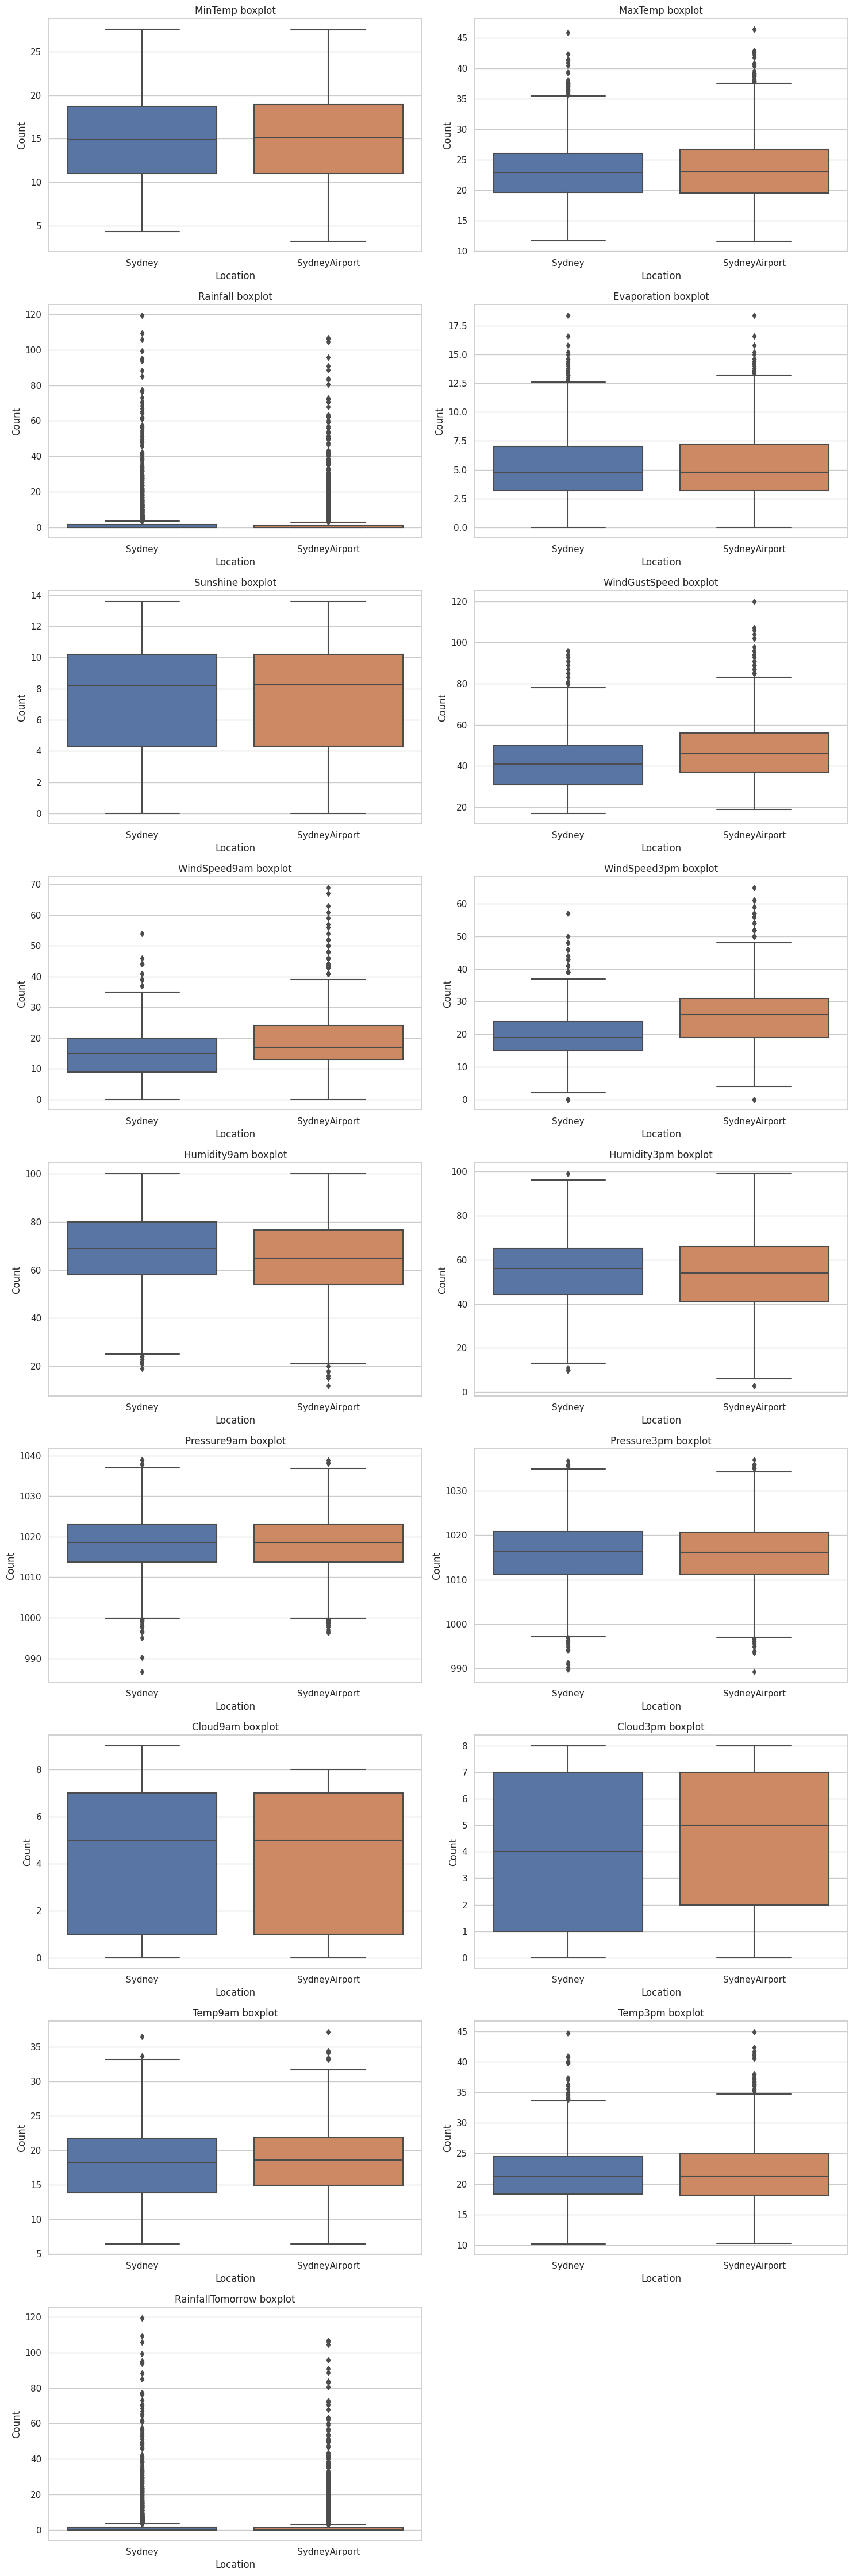

In [ ]:
# def boxplot_localidad(df, columns):
#     '''Recibe un dataframe y columnas numéricas, y muestra un boxplot
#     de cada variable según la localidad, con dos boxplots por fila.'''
#     n_columns = len(columns)
#     n_rows = (n_columns + 1) // 2  # Redondeo hacia arriba

#     plt.figure(figsize=(15, 5 * n_rows))

#     for i, column in enumerate(columns, start=1):
#         plt.subplot(n_rows, 2, i)
#         sns.boxplot(x='Location', y=column, data=df)
#         plt.ylabel('Count')
#         plt.title(f'{column} boxplot')

#     plt.tight_layout()
#     plt.show()

# boxplot_localidad(data, numerical)

Cambiamos outliers con la función anteriormente definida, y volvemos a visualizar los boxplot para ver cómo han cambiado.

In [ ]:
# # Cambiar outliers
# numerical_explicative = list(set(numerical) - set(['Rainfall', 'RainfallTomorrow']))
# data_no_outliers_target = data_no_outliers.copy() # Tener un dataset removiendo los outliers de las variables objetivo

# # Un dataset quitando outliers en las variables explicativas y otro en todas las variables
# for column in numerical_explicative:
#   data_no_outliers[column] = data.groupby('Location')[column].transform(reemplazar_outliers)
# for column in numerical:
#   data_no_outliers_target[column] = data.groupby('Location')[column].transform(reemplazar_outliers)

ValueError: ignored

Volvemos a llamar a la función para graficar boxplots por localidad.

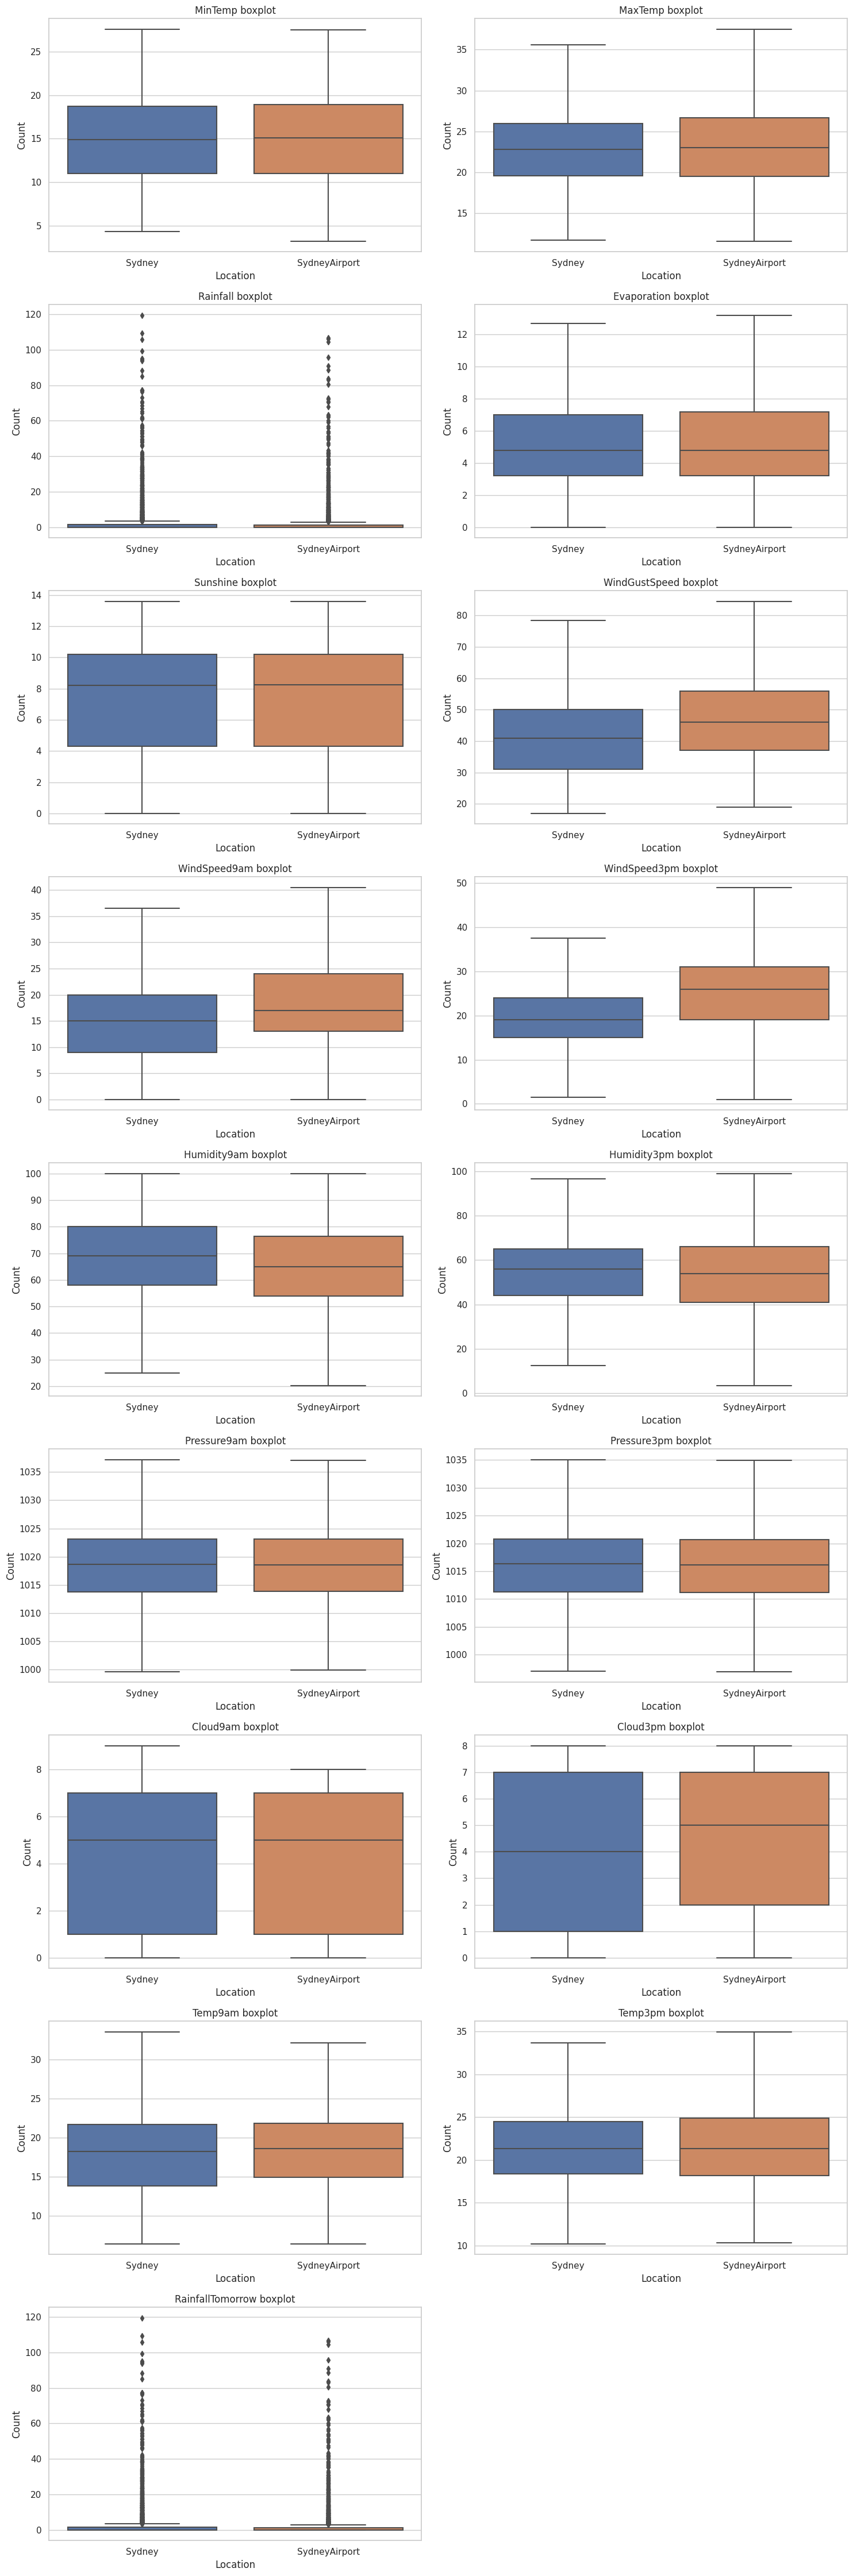

In [ ]:
# boxplot_localidad(data_no_outliers, numerical)

Ahora, vemos que ninguna variable posee outliers a excepción de Rainfall y RainfallTomorrow.

Luego, agregaremos más columnas: aquellas que representen una diferencia, como por ejemplo: TempDiff (diferencia entre la temperatura máxima y la mínima), PressureDiff (diferencia entre la presión a las 9am y a las 3pm), etc.

Nuevamente, este criterio lo tomamos con el fin de realizar comparaciones en las regresiones.

In [ ]:
def columnas_diferencias(df):
  '''Recibe un dataframe y realiza la diferencia entre
  algunas columnas, agregándolas al mismo.'''

  df['TempDiff'] = df['MaxTemp'] - df['MinTemp']
  df['PressureDiff'] = df['Pressure3pm'] - df['Pressure9am']
  df['CloudDiff'] = df['Cloud3pm'] - df['Cloud9am']
  df['WindSpeedDiff'] = df['WindSpeed3pm'] - df['WindSpeed9am']

  return df

In [ ]:
# Llamamos a la función para ambos dataframes
data = columnas_diferencias(data)
data_no_outliers = columnas_diferencias(data_no_outliers)

Por último, agregamos las columnas correspondientes a la representación polar de las direcciones.

In [ ]:
for column in ['WindDir9am', 'WindDir3pm', 'WindGustDir','Date']:
  series_cos, series_sin = dir_to_circle(data['WindDir9am'])
  data[f'{column}_cos'] = series_cos
  data[f'{column}_sin'] = series_sin
  data_no_outliers[f'{column}_cos'] = series_cos
  data_no_outliers[f'{column}_sin'] = series_sin

In [ ]:
print("Ahora hay ", len(data.columns), " columnas en el dataframe.")

Ahora hay  38  columnas en el dataframe.


# Estandarización
Para poder aplicar los modelos de regresión, debemos primero estandarizar las variables explicativas para que todas tengan el mismo desvío y una no pese mas que otra.

## Tipo de estandarización

La mayoría de las variables tienen distribución normal, es lógico aplicar z-score a estas.

Las variables que no tienen una distribución normal son las que explican las nubes, que son bimodales. Con el fin de mantener el desvío similar entre las variables, decidimos usar z-score en estas.

Sin embargo, hay algunas que tienen distribuciones distintas, aquellas que corresponden a las variables a explicar. Estas tienen distribuciones inversamente proporcional. Podemos decidir no estandarizarlas, aunque podríamos considerar hacerlo por motivos de recursos computacionales.

Como esta es una técnica que puede causar fuga de datos a la hora de entrenar modelos, no la realizaremos ahora sobre la totalidad de los dataframes trabajados (data y data_no_outliers), sino que más adelante estandarizaremos únicamente el conjunto de entrenamiento.

In [ ]:
# numerical_explicative = list(set(numerical) - set(['Rainfall', 'RainfallTomorrow']))

In [ ]:
# Inicializamos la instancia
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data[numerical_explicative])
# scaled_data_no_outliers = scaler.fit_transform(data_no_outliers[numerical_explicative])

# numerical_explicative + ['TempDiff', 'PressureDiff', 'CloudDiff', 'WindSpeedDiff',
#        'WindDir9am_cos', 'WindDir9am_sin', 'WindDir3pm_cos', 'WindDir3pm_sin',
#        'WindGustDir_cos', 'WindGustDir_sin', 'Date_cos', 'Date_sin']

# data[numerical_explicative] = scaled_data
# data_no_outliers[numerical_explicative] = scaled_data_no_outliers

# Función Pipelines

En esta sección, definimos una función destinada a construir una tubería. Esta función tomará como entrada un conjunto de variables predictoras (X), una variable a predecir (y) representada como un array, y un modelo específico (regresión lineal, logística o red neuronal). Su propósito será diseñar una tubería que integre el preprocesamiento de los datos y el modelo seleccionado.

En el proceso de preprocesamiento, se implementarán las siguientes técnicas: imputación por la media y estandarización para las variables numéricas, e imputación por la moda y generación de dummies para las variables categóricas.
Como ya hemos mencionado, estas decisiones se toman exclusivamente sobre el conjunto de entrenamiento, evitando así posibles problemas de fuga de datos.

Esta estrategia garantiza que el preprocesamiento se realice de manera coherente y robusta, permitiendo una construcción adecuada de la tubería para la aplicación de los modelos en cuestión.

In [ ]:
def construir_pipeline(X, y, modelo=None):
    '''Devuelve una tubería para aplicar preprocesamiento y el
    modelo pasado por parámetro'''

    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', modelo)
    ])

    return pipeline

In [ ]:
def construir_pipeline_sin_outliers(X, y, modelo):
    '''Devuelve una tubería con preprocesamiento que incluye la función
    'reemplazar_outliers' y el modelo pasado por parámetro'''

    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('outlier_replacement', FunctionTransformer(reemplazar_outliers)),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', modelo)
    ])

    return pipeline

# Regresión Lineal

En esta sección probamos tomando diferentes combinaciones de las variables que participan en el dataset, con el fin de quedarnos con aquel que mejores métricas presente, es decir, el que más explique la predicción de la variable 'RainfallTomorrow'.

Probaremos los modelos con los dos datasets definidos anteriormente: 'data' (sin tratar outliers) y 'df_no_outliers' (tratando outliers).


In [ ]:
df_model = data.drop(columns= ["Unnamed: 0", "Date"]) #este es el dataframe q vamos a usar para regresion con outliers incluidos

In [ ]:
df_model.to_csv("df_model.csv")

A continuación, definimos una clase para regresión lineal

In [ ]:
class Regresion_Lineal:
    '''Clase para entrenar un modelo de regresión lineal'''
    def __init__(self, pipeline, X_train, y_train, X_test, y_test, cv=5):
        self.pipeline = pipeline
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.cv = cv
        self.cv_scores = []  # Almacena los R^2 de cada fold
        self.cv_scores_mse = []  # Almacena los MSE de cada fold
        self.cv_scores_mae = []  # Almacena los MAE de cada fold

    def train_model(self):
        '''Entrena el modelo con validación cruzada y calcula las métricas
        para cada fold'''

        for i, (train_index, test_index) in enumerate(KFold(n_splits=self.cv).split(self.X_train, self.y_train)):
            X_train_fold, X_test_fold = self.X_train.iloc[train_index], self.X_train.iloc[test_index]
            y_train_fold, y_test_fold = self.y_train.iloc[train_index], self.y_train.iloc[test_index]

            self.pipeline.fit(X_train_fold, y_train_fold)
            y_pred_fold = self.pipeline.predict(X_test_fold)

            r2_fold = metrics.r2_score(y_test_fold, y_pred_fold)
            mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
            mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)

            self.cv_scores.append(r2_fold)
            self.cv_scores_mse.append(mse_fold)
            self.cv_scores_mae.append(mae_fold)

            print(f"\nConjunto de Validación Cruzada {i + 1}:")
            print("R^2:", round(r2_fold, 4))
            print("Error Cuadrático Medio (MSE):", round(mse_fold, 4))
            print("Error Absoluto Medio (MAE):", round(mae_fold, 4))

    def calculate_test_metrics(self):
        '''Calcula las métricas en el conjunto de prueba'''
        y_pred_test = self.pipeline.predict(self.X_test)

        r2_test = metrics.r2_score(self.y_test, y_pred_test)
        mse_test = mean_squared_error(self.y_test, y_pred_test)
        mae_test = mean_absolute_error(self.y_test, y_pred_test)

        print("\nMétricas en Conjunto de Prueba:")
        print("R^2:", round(r2_test, 4))
        print("Error Cuadrático Medio (MSE):", round(mse_test, 4))
        print("Error Absoluto Medio (MAE):", round(mae_test, 4))

        return r2_test, mse_test, mae_test

    def plot_coefficients(self):
        '''Muestra un gráfico con los coeficientes de cada variable'''
        coeficients = self.pipeline.steps[1][1].coef_.flatten()
        feature_names = self.pipeline.named_steps['preprocessor'].get_feature_names_out()

        coef_df = pd.DataFrame({'predictor': feature_names, 'coef': coeficients})

        fig, ax = plt.subplots(figsize=(10, 5))
        ax.stem(coef_df.predictor, coef_df.coef, markerfmt=' ')
        plt.xticks(rotation=90, ha='right', size=10)
        ax.set_xlabel('feature')
        ax.set_ylabel('weights')
        ax.set_title('Parámetros del modelo')
        plt.show()

    def plot_residuals(self):
        '''Muestra un gráfico de residuos'''
        y_pred = self.pipeline.predict(self.X_test)

        fig = plt.figure(figsize=(10, 5))
        sns.histplot((self.y_test - y_pred), color="red", kde=True, stat="density", linewidth=0, bins=20)
        fig.suptitle('Análisis de Residuos', fontsize=20)
        plt.show()

    def plot_residuals_scatter(self):
        '''Muestra un gráfico personalizado de residuos'''
        y_pred = self.pipeline.predict(self.X_test)

        fig = plt.figure(figsize=(8, 4))
        fig.suptitle('Residuos')
        plt.xlabel('y_test')
        plt.ylabel('Residuos')
        plt.scatter(self.y_test, 100 * (self.y_test - y_pred) / self.y_test)
        plt.ylim(50, 120)
        plt.show()

    def plot_results(self):
        '''Muestra gráficamente los resultados de la validación cruzada'''

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Plot de barras para R^2
        ax1.barh(range(len(self.cv_scores)), self.cv_scores, color='skyblue', label='R^2 Score')
        ax1.set_yticks(range(len(self.cv_scores)))
        ax1.set_yticklabels([f'Fold {i+1}' for i in range(len(self.cv_scores))])
        ax1.set_xlabel('R^2 Score')
        ax1.set_title('Resultados de Validación Cruzada (R^2)')

        # Plot de barras para MSE
        ax2.barh(range(len(self.cv_scores_mse)), self.cv_scores_mse, color='orange', label='MSE')
        ax2.set_yticks(range(len(self.cv_scores_mse)))
        ax2.set_yticklabels([f'Fold {i+1}' for i in range(len(self.cv_scores_mse))])
        ax2.set_xlabel('MSE')
        ax2.set_title('Resultados de Validación Cruzada (MSE)')

        plt.show()

    def plot_test_pred(self):
        '''Muestra un gráfico valores reales vs predicciones'''

        y_pred = self.pipeline.predict(self.X_test)

        fig, ax = plt.subplots(figsize=(8, 4))
        ax.scatter(self.y_test, y_pred)
        ax.set_xlabel('Valores Reales')
        ax.set_ylabel('Predicciones')
        ax.set_title('Valores Reales vs. Predicciones')

        # Línea diagonal
        diagonal = np.linspace(min(self.y_test.min(), y_pred.min()), max(self.y_test.max(), y_pred.max()))
        ax.plot(diagonal, diagonal, '-r')

        plt.show()

    def get_processed_data(self):
        '''Obtiene los conjuntos de entrenamiento y prueba procesados por la tubería'''
        X_train_transformed = self.pipeline.named_steps['preprocessor'].transform(self.X_train)
        X_test_transformed = self.pipeline.named_steps['preprocessor'].transform(self.X_test)

        return X_train_transformed, X_test_transformed, self.y_train, self.y_test

A continuación, codificaremos con get_dummies las variables categóricas: "Month", "WindGustDir", "RainToday", WindDir9am", "WindDir3pm" y "RainTomorrow" (que luego la quitaremos porque será nuestra variable a predecir)

In [ ]:
df_regresion = pd.get_dummies(df_model)
df_regresion.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow', 'TempDiff', 'PressureDiff',
       'CloudDiff', 'WindSpeedDiff', 'WindDir9am_cos', 'WindDir9am_sin',
       'WindDir3pm_cos', 'WindDir3pm_sin', 'WindGustDir_cos',
       'WindGustDir_sin', 'Date_cos', 'Date_sin', 'Location_Canberra',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Sydney',
       'Location_SydneyAirport', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N

Ahora, dentro del dataset contamos con distintas formas de representar algunas variables, como por ejemplo para la variable mes, tenemos doce variables dummy y dos variables que representan sus coordenadas polares.

Lo mismo sucede con "WindGustDir", "WindDir9am" y "WindDir3pm". Dichas variables están representadas de dos maneras en el dataset: con sus respectivas dummies y con sus respectivas coordenadas polares.

A continuación, entrenamos 6 modelos. Los tres primeros, utilizando el dataset con outliers. Los tres últimos, con el dataset 'data_no_outliers' en donde hemos tratado los atípicos.

Como se dijo anteriormente, probamos con dos datasets distintos con el fin de analizar cuánto impactan los outliers en los resultados de la regresión lineal.

### Modelo 1  (con outliers incluidos)

En este primer modelo, probaremos incluyendo todas las variables que participan en el dataset, a excepción de aquellas que intentamos predecir (RainfallTomorrow y RainTomorrow)

In [ ]:
X1 = df_regresion.drop(['RainfallTomorrow', 'RainTomorrow_Yes', 'RainTomorrow_No'], axis=1) #todas las variables predictoras
y1 = df_regresion['RainfallTomorrow']

regresion_pipe1 = construir_pipeline(X1, y1, modelo=LinearRegression())
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

regresion_trainer1 = Regresion_Lineal(regresion_pipe1, X_train1, y_train1, X_test1, y_test1)
regresion_trainer1.train_model() #metricas para cada fold
regresion_trainer1.calculate_test_metrics() #metricas para el conjunto de prueba


Conjunto de Validación Cruzada 1:
R^2: 0.2095
Error Cuadrático Medio (MSE): 30.4042
Error Absoluto Medio (MAE): 2.8683

Conjunto de Validación Cruzada 2:
R^2: 0.242
Error Cuadrático Medio (MSE): 37.1245
Error Absoluto Medio (MAE): 2.9783

Conjunto de Validación Cruzada 3:
R^2: 0.2131
Error Cuadrático Medio (MSE): 35.2836
Error Absoluto Medio (MAE): 3.0337

Conjunto de Validación Cruzada 4:
R^2: 0.2551
Error Cuadrático Medio (MSE): 38.2889
Error Absoluto Medio (MAE): 3.0345

Conjunto de Validación Cruzada 5:
R^2: 0.2208
Error Cuadrático Medio (MSE): 50.7476
Error Absoluto Medio (MAE): 3.1051

Métricas en Conjunto de Prueba:
R^2: 0.2262
Error Cuadrático Medio (MSE): 53.0462
Error Absoluto Medio (MAE): 3.2555


(0.22624155626373277, 53.0461630150936, 3.2554708708843)

Observamos que si incluimos absolutamente todas las variables, el R^2 fluctua alrededor de 0.22-0.30.
En el conjunto de prueba, el R^2 es 0.2535, indicando que el modelo explica aproximadamente un 22.62% de la variabilidad en la variable objetivo. Además, el Error Cuadrático Medio (MSE) y el Error Absoluto Medio (MAE) en el conjunto de prueba son 53.0462 y 3.2555, respectivamente.

Sin embargo, este modelo posee variables predictoras redundantes, por lo explicado anteriormente. A continuación, probaremos eliminando las variables dummy de las que respectan a información sobre los vientos y los meses, quedándonos solo con sus coordenadas polares. ¿Mejorará nuestro R^2?

###Modelo 2 (con outliers incluidos)

En este segundo modelo, eliminamos de las variables predictoras todas las dummies referidas a los vientos y a los meses, quedándonos así con sus respectivas coordenadas polares. Decidimos tomar este criterio para el modelo con el fin de analizar si ésta es una buena forma de representar las variables.

In [ ]:
X2 = df_regresion.drop(columns=['RainfallTomorrow', 'RainTomorrow_No', 'RainTomorrow_Yes', 'WindGustDir_E', 'WindGustDir_ENE',
                                'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
                                'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
                                'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
                                'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
                                'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
                                'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
                                'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
                                'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
                                'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
                                'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
                                'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
                                'WindDir3pm_WNW', 'WindDir3pm_WSW',  'Month_Apr', 'Month_Aug',
                                'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
                                'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'])

y2 = df_regresion['RainfallTomorrow'] # Variable a predecir

regresion_pipe2 = construir_pipeline(X2, y2, modelo=LinearRegression())
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

regresion_trainer2 = Regresion_Lineal(regresion_pipe2, X_train2, y_train2, X_test2, y_test2)
regresion_trainer2.train_model() #metricas para cada fold
regresion_trainer2.calculate_test_metrics() #metricas para el conjunto de prueba


Conjunto de Validación Cruzada 1:
R^2: 0.2095
Error Cuadrático Medio (MSE): 30.4042
Error Absoluto Medio (MAE): 2.8683

Conjunto de Validación Cruzada 2:
R^2: 0.242
Error Cuadrático Medio (MSE): 37.1245
Error Absoluto Medio (MAE): 2.9783

Conjunto de Validación Cruzada 3:
R^2: 0.2131
Error Cuadrático Medio (MSE): 35.2836
Error Absoluto Medio (MAE): 3.0337

Conjunto de Validación Cruzada 4:
R^2: 0.2551
Error Cuadrático Medio (MSE): 38.2889
Error Absoluto Medio (MAE): 3.0345

Conjunto de Validación Cruzada 5:
R^2: 0.2208
Error Cuadrático Medio (MSE): 50.7476
Error Absoluto Medio (MAE): 3.1051

Métricas en Conjunto de Prueba:
R^2: 0.2262
Error Cuadrático Medio (MSE): 53.0462
Error Absoluto Medio (MAE): 3.2555


(0.22624155626373277, 53.0461630150936, 3.2554708708843)

Observamos que las métricas generadas por este modelo de Regresión Lineal son consistentes con las métricas obtenidas en el modelo anterior, donde se utilizaron todas las variables.

En nuestra implementación en la entrega anterior (con fuga de datos), el resultado del R^2 de este modelo habiendo quitado las dummies mencionadas, fue de 0.232. Se observó un leve incremento respecto al modelo entrenado anteriormente. Esto nos indicó que haber tranformado las variables del viento ("WindGustDir", "WindDir9am" y "WindDir3pm") y la variable de la fecha en sus respectivas coordenadas polares es una "buena" manera de representarlas.

Sin embargo, esta forma de representación de las variables es muy poco explicativa. En el siguiente modelo veremos si entrenándolo con las dummies mejoran o empeoran los resultados.

### Modelo 3 - Outliers incluidos

Como representar las variables categóricas referidas a los vientos y a los meses con sus coordenas polares no aporta explicatividad ya que es dificil interpretar y analizar sus valores, entrenamos un 3° modelo quitandólas y quedándonos con sus dummies.

Además, este modelo fue entrenado varias veces a modo de prueba. En cada prueba, quitamos y agregamos variables como por ejemplo aquellas que poseen valores a las 9am y a las 3pm, las diferencias (como CloudDiff, PressureDiff, entre otras), etc; con el fin de lograr la mayor explicatividad de la variable a predecir (RainfallTomorrow).

El mejor resultado arrojado luego de haber hecho varias pruebas fue el que muestra este 3° modelo.

In [ ]:
X3 = df_regresion.drop(columns=['RainfallTomorrow', 'RainTomorrow_No', 'RainTomorrow_Yes', 'Date_cos', 'Date_sin', 'WindDir9am_cos',
                                'WindDir9am_sin', 'WindDir3pm_cos', 'WindDir3pm_sin', 'WindGustDir_cos', 'WindGustDir_sin', 'Temp9am',
                                'Temp3pm', 'TempDiff', 'PressureDiff', 'CloudDiff', 'WindDir9am_E', 'WindDir9am_ENE',
                                'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
                                'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
                                'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
                                'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
                                'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
                                'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
                                'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
                                'WindDir3pm_WNW', 'WindDir3pm_WSW'])

y3 = df_regresion['RainfallTomorrow'] # Variable a predecir


regresion_pipe3 = construir_pipeline(X3, y3, modelo=LinearRegression())
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

regresion_trainer3 = Regresion_Lineal(regresion_pipe3, X_train3, y_train3, X_test3, y_test3)
regresion_trainer3.train_model() #metricas para cada fold
regresion_trainer3.calculate_test_metrics() #metricas para el conjunto de prueba


Conjunto de Validación Cruzada 1:
R^2: 0.2082
Error Cuadrático Medio (MSE): 30.454
Error Absoluto Medio (MAE): 2.8314

Conjunto de Validación Cruzada 2:
R^2: 0.2404
Error Cuadrático Medio (MSE): 37.2006
Error Absoluto Medio (MAE): 2.9342

Conjunto de Validación Cruzada 3:
R^2: 0.2069
Error Cuadrático Medio (MSE): 35.5631
Error Absoluto Medio (MAE): 3.0282

Conjunto de Validación Cruzada 4:
R^2: 0.251
Error Cuadrático Medio (MSE): 38.5019
Error Absoluto Medio (MAE): 3.0213

Conjunto de Validación Cruzada 5:
R^2: 0.2143
Error Cuadrático Medio (MSE): 51.1659
Error Absoluto Medio (MAE): 3.0842

Métricas en Conjunto de Prueba:
R^2: 0.2255
Error Cuadrático Medio (MSE): 53.0997
Error Absoluto Medio (MAE): 3.2315


(0.22546126154307455, 53.09965728231216, 3.231540956253252)

In [ ]:
print(X3.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'WindSpeedDiff', 'Location_Sydney', 'Location_SydneyAirport',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'RainToday_No', 'RainToday_Yes', 'Month_Apr',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul',
       'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep'],
      dtype='object')


Este modelo, que fue entrenado varias veces con más o menos variables, es capaz de explicar entre el 20.69% y el 25% de la variabilidad en la variable objetivo "RainfallTomorrow" en los diferentes conjuntos de validación.

Concluimos que para el dataset sin tratar outliers, la mejor predicción de RainfallTomorrow se da cuando las variables predictoras son:
*'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
'WindSpeedDiff', 'Location_Sydney', 'Location_SydneyAirport',
'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
'WindGustDir_WSW', 'RainToday_No', 'RainToday_Yes', 'Month_Apr',
'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul',
'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
'Month_Sep'*

A modo de observación, destacamos que las peores métricas se dieron cuando quitamos las variables referidas a la humedad. Esto nos da la idea de que dichas variables son necesarias para hacer una buena predicción de lluvia.

### Modelo 4 (sin outliers incluidos)

En los próximos dos modelos, utilizaremos el dataset en el cual tratamos los outliers: 'data_no_outliers'. Aquí, el objetivo será ver si los resultados son mejores que en los modelos anteriores, donde no tratamos los outliers.


Haremos lo mismo que en el primer modelo: tomar todas las variables, aunque algunas sean redundantes.

In [ ]:
X4 = df_regresion.drop(['RainfallTomorrow', 'RainTomorrow_Yes', 'RainTomorrow_No'], axis=1) #todas las variables predictoras
y4 = df_regresion['RainfallTomorrow']

regresion_pipe4 = construir_pipeline_sin_outliers(X4, y4, modelo=LinearRegression())
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

regresion_trainer4 = Regresion_Lineal(regresion_pipe4, X_train4, y_train4, X_test4, y_test4)
regresion_trainer4.train_model() #metricas para cada fold
regresion_trainer4.calculate_test_metrics() #metricas para el conjunto de prueba


Conjunto de Validación Cruzada 1:
R^2: 0.1851
Error Cuadrático Medio (MSE): 31.3419
Error Absoluto Medio (MAE): 2.9476

Conjunto de Validación Cruzada 2:
R^2: 0.2149
Error Cuadrático Medio (MSE): 38.4497
Error Absoluto Medio (MAE): 3.1257

Conjunto de Validación Cruzada 3:
R^2: 0.1978
Error Cuadrático Medio (MSE): 35.972
Error Absoluto Medio (MAE): 3.1577

Conjunto de Validación Cruzada 4:
R^2: 0.2275
Error Cuadrático Medio (MSE): 39.7068
Error Absoluto Medio (MAE): 3.1684

Conjunto de Validación Cruzada 5:
R^2: 0.1931
Error Cuadrático Medio (MSE): 52.5521
Error Absoluto Medio (MAE): 3.1205

Métricas en Conjunto de Prueba:
R^2: 0.2017
Error Cuadrático Medio (MSE): 54.7295
Error Absoluto Medio (MAE): 3.2682


(0.20168809300019552, 54.729462273933926, 3.2682280247479563)

El R^2 para este primer modelo sin outliers es de aproximadamente 0.20. Por el momento, es el más bajo.

### Modelo 5 - sin outliers incluidos

Finalmente, entrenaremos un último modelo de regresión lineal con las mismas variables predictoras que en el caso del modelo 3, que fue el que mejor R^2 nos dio.

In [ ]:
X5 = df_regresion.drop(columns=['RainfallTomorrow', 'RainTomorrow_No', 'RainTomorrow_Yes', 'Date_cos', 'Date_sin', 'WindDir9am_cos',
                                'WindDir9am_sin', 'WindDir3pm_cos', 'WindDir3pm_sin', 'WindGustDir_cos', 'WindGustDir_sin', 'Temp9am',
                                'Temp3pm', 'TempDiff', 'PressureDiff', 'CloudDiff', 'WindDir9am_E', 'WindDir9am_ENE',
                                'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
                                'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
                                'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
                                'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
                                'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
                                'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
                                'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
                                'WindDir3pm_WNW', 'WindDir3pm_WSW'])  # Variables predictoras

y5 = df_regresion['RainfallTomorrow'] # Variable a predecir

regresion_pipe5 = construir_pipeline_sin_outliers(X5, y5, modelo=LinearRegression())
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

regresion_trainer5 = Regresion_Lineal(regresion_pipe5, X_train5, y_train5, X_test5, y_test5)
regresion_trainer5.train_model() #metricas para cada fold
regresion_trainer5.calculate_test_metrics() #metricas para el conjunto de prueba


Conjunto de Validación Cruzada 1:
R^2: 0.1841
Error Cuadrático Medio (MSE): 31.3821
Error Absoluto Medio (MAE): 2.9122

Conjunto de Validación Cruzada 2:
R^2: 0.2093
Error Cuadrático Medio (MSE): 38.7282
Error Absoluto Medio (MAE): 3.1015

Conjunto de Validación Cruzada 3:
R^2: 0.1915
Error Cuadrático Medio (MSE): 36.2529
Error Absoluto Medio (MAE): 3.159

Conjunto de Validación Cruzada 4:
R^2: 0.2229
Error Cuadrático Medio (MSE): 39.942
Error Absoluto Medio (MAE): 3.1576

Conjunto de Validación Cruzada 5:
R^2: 0.185
Error Cuadrático Medio (MSE): 53.0786
Error Absoluto Medio (MAE): 3.0944

Métricas en Conjunto de Prueba:
R^2: 0.2008
Error Cuadrático Medio (MSE): 54.7913
Error Absoluto Medio (MAE): 3.2418


(0.2007860586403324, 54.79130258351099, 3.241788028385872)

Ambos modelos sin outliers en el dataset nos han arrojado valores de R^2 menores que los modelos anteriores donde no tratamos outliers. Esto nos indica que un modelo de regresión lineal, para este dataset en particular, puede explicar mejor las predicciones sin que tratemos los valores atípicos.

A continuación, guardaremos la información del modelo 3 para luego analizar resultados y aplicar otros tipos de modelos, como por ejemplo de regularización.

In [ ]:
xtrain_mod3 = X_train3
xtest_mod3 = X_test3
ytrain_mod3 = y_train3
ytest_mod3 = y_test3
# ypred_mod3 = y_pred3

### Analizando las métricas del modelo 3

Como el modelo 3 fue el que mejor R^2 nos otorgó, haremos un breve análisis del mismo.

En el siguiente gráfico se observan los valores que tomaron los coeficientes de las variables predictoras.

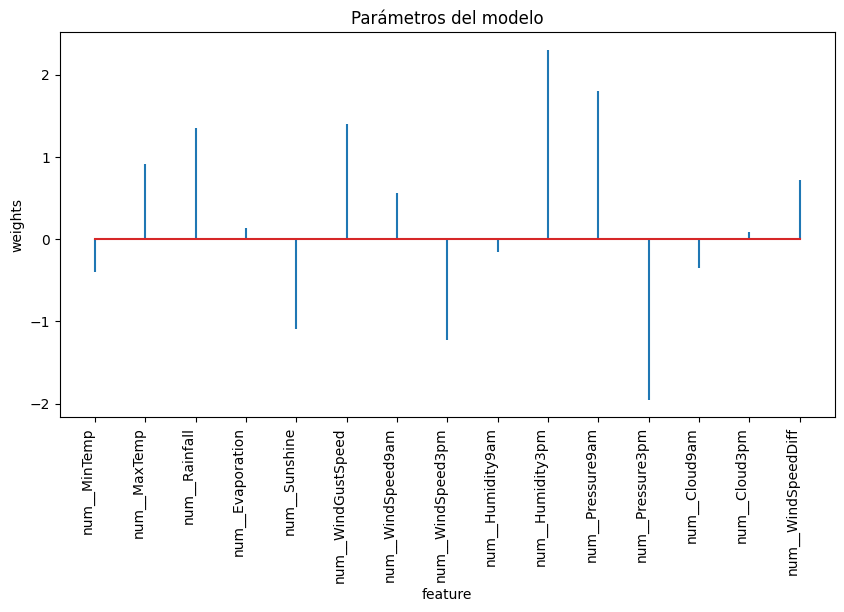

In [ ]:
regresion_trainer3.plot_coefficients()

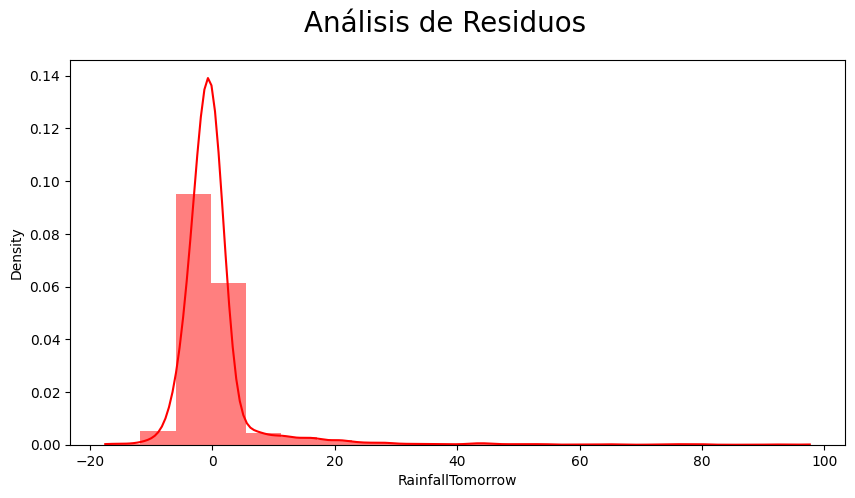

In [ ]:
regresion_trainer3.plot_residuals()

Observamos el gráfico de residuos del modelo.

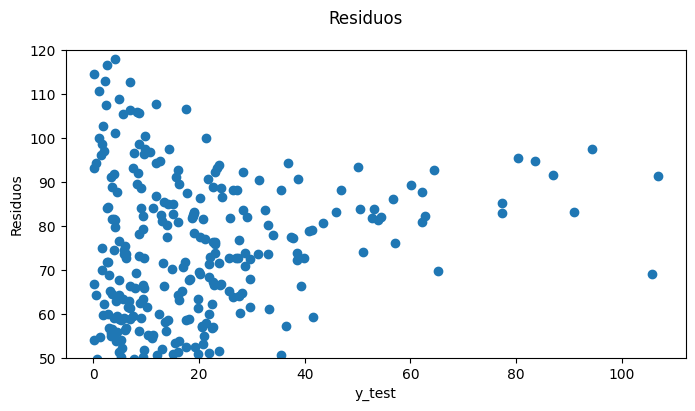

In [ ]:
regresion_trainer3.plot_residuals_scatter()

Esta métrica tiene muchos problemas con nuestro dataset debido al hecho de que la mayoría de nuestros datos están concentrados en días de poca lluvia, por lo que un error percentual no es interpretado fácilmente.

A continuación, un gráfico comparativo de los resultados para cada fold.

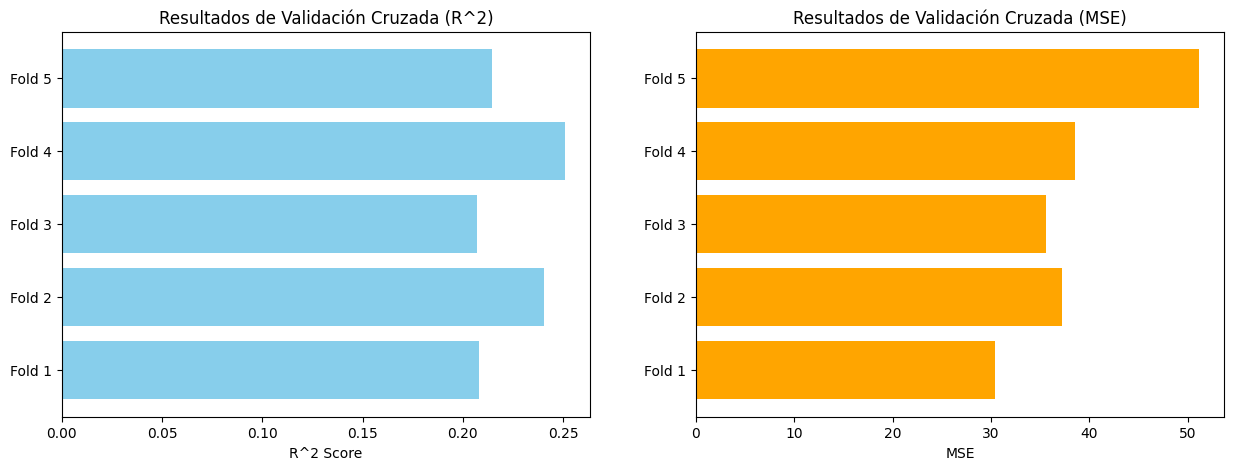

In [ ]:
regresion_trainer3.plot_results()

Finalmente, mostramos un gráfico de valores reales vs. predicciones

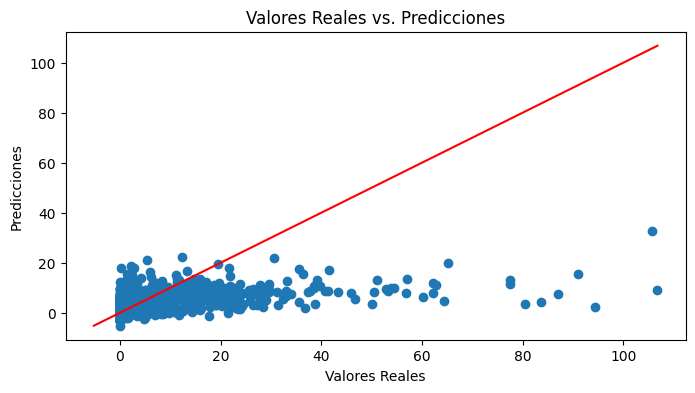

In [ ]:
regresion_trainer3.plot_test_pred()

Debido al hecho de que los datos no están balanceados, el modelo se sobreajusta respecto a los días con poca lluvia, por esto se encuentran muchos puntos por debajo de la identidad.

In [ ]:
X_train_mod3, X_test_mod3, y_train_mod3, y_test_mod3 = regresion_trainer3.get_processed_data()

In [ ]:
# a partir de ahora, evaluaremos los modelos con las columnas que intervinieron en el modelo 3

var = set(list(df_regresion.columns))
columnas = var - set(['RainfallTomorrow', 'RainTomorrow_No', 'RainTomorrow_Yes', 'Date_cos', 'Date_sin', 'WindDir9am_cos',
                                'WindDir9am_sin', 'WindDir3pm_cos', 'WindDir3pm_sin', 'WindGustDir_cos', 'WindGustDir_sin', 'Temp9am',
                                'Temp3pm', 'TempDiff', 'PressureDiff', 'CloudDiff', 'WindDir9am_E', 'WindDir9am_ENE',
                                'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
                                'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
                                'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
                                'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
                                'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
                                'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
                                'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
                                'WindDir3pm_WNW', 'WindDir3pm_WSW'])

columnas

{'Cloud3pm',
 'Cloud9am',
 'Evaporation',
 'Humidity3pm',
 'Humidity9am',
 'Location_Canberra',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Sydney',
 'Location_SydneyAirport',
 'MaxTemp',
 'MinTemp',
 'Month_Apr',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jan',
 'Month_Jul',
 'Month_Jun',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'Pressure3pm',
 'Pressure9am',
 'RainToday_No',
 'RainToday_Yes',
 'Rainfall',
 'Sunshine',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindGustSpeed',
 'WindSpeed3pm',
 'WindSpeed9am',
 'WindSpeedDiff'}



# Gradiente Descendiente

En esta sección, aplicaremos gradiente descendiente a los conjuntos train-test del modelo de regresión lineal n°3. Para ello, definimos la siguiente función.

In [ ]:
def gradient_descent(X_train, y_train, X_test, y_test, learning_rate=0.01, num_iterations=1000, random_seed=42):
    """
    Perform gradient descent to fit a linear regression model and plot learning and testing errors.

    Parameters:
    - X_train: Numpy array of shape (m_train, n) for training features.
    - y_train: Numpy array of shape (m_train,) for training target variable.
    - X_test: Numpy array of shape (m_test, n) for testing features.
    - y_test: Numpy array of shape (m_test,) for testing target variable.
    - learning_rate: The learning rate for gradient descent.
    - num_iterations: The number of iterations for gradient descent.

    Returns:
    - theta: Numpy array of shape (n,) representing the learned coefficients.
    """
    # Seteamos random seed
    np.random.seed(random_seed)
    m_train, n = X_train.shape
    m_test, _ = X_test.shape
    #theta = np.zeros(n)  # Initialize coefficients to zeros
    theta = np.random.rand(n) # Coeficientes aleatorios

    train_errors = []
    test_errors = []

    for epoch in range(num_iterations):
        # Calculate the predicted values for training and testing sets
        y_train_pred = X_train.dot(theta)
        y_test_pred = X_test.dot(theta)

        # Calculate the training and testing errors (Mean Squared Error)
        train_error = np.mean((y_train_pred - y_train) ** 2)
        test_error = np.mean((y_test_pred - y_test) ** 2)

        train_errors.append(train_error)
        test_errors.append(test_error)

        # Calculate the gradient for training set
        gradient = (1 / m_train) * X_train.T.dot(y_train_pred - y_train)

        # Update the coefficients using gradient descent
        theta -= learning_rate * gradient

    # Plot learning and testing errors
    plt.figure()
    plt.plot(range(num_iterations), train_errors, label='Training Error')
    plt.plot(range(num_iterations), test_errors, label='Testing Error')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    return theta

A continuación, llamaremos a la función definida anteriormente pero realizando un preprocesamiento a los datos de entrenamiento, como imputar faltantes y escalar las variables numéricas.

In [ ]:
numeric_features = X3.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X3.select_dtypes(include=['object']).columns

# Construimos transformers para imputación y estandarización
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicamos la transformación a X3
X3_processed = preprocessor.fit_transform(X3)
X_train3_processed, X_test3_processed, y_train3_processed, y_test3_processed = train_test_split(X3_processed, y3, test_size=0.2, random_state=42)

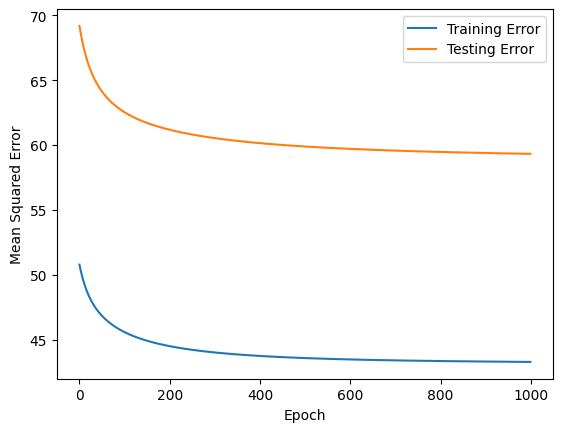

In [ ]:
theta = gradient_descent(X_train_mod3, y_train_mod3, X_test_mod3, y_test_mod3, random_seed = 40)

Vemos, en el gráfico que los errores de prueba se encuentran por encima que los errores de entrenamiento.

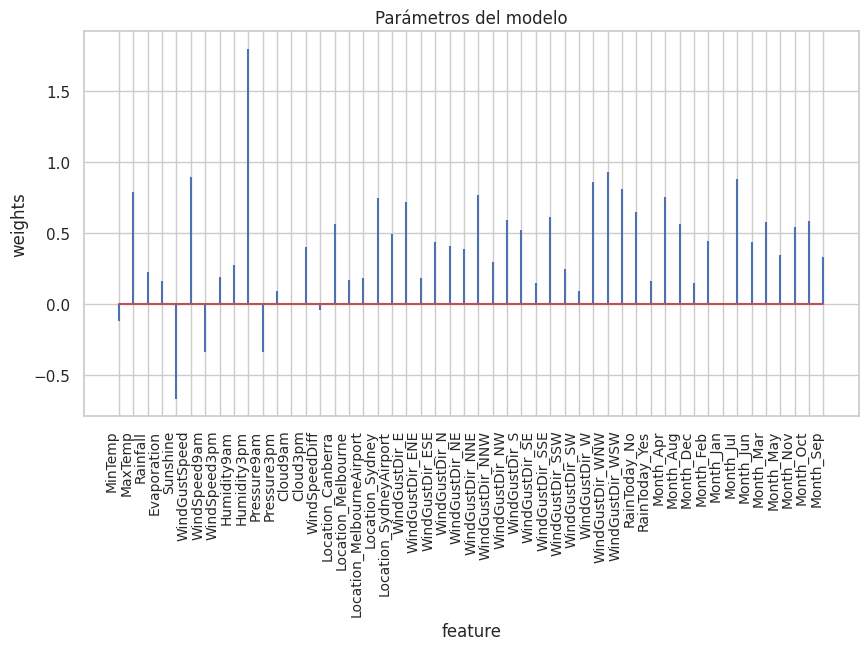

R2 error: 0.21798342828762463


In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(theta.index, theta.values, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()


# Calculamos el R2

y_pred_gd = X_train3.apply(lambda x: np.dot(theta.values,x), axis=1)
y_pred_gd.shape
R2 = metrics.r2_score(y_train3, y_pred_gd)
print(f'R2 error: {R2}')

Podemos ver que el R2 ronda entre 0.26 y 0.28. En el gráfico podemos observar cuáles son las variables que tienen más peso y cuáles no.

## Optimización de HP

Optimizaremos los hiperparámetros que intevinieron en la función anterior (learning rate y epochs) para determinar un mejor modelo de gradiente descendiente.

Esta optimización la realizaremos con Grid Search, donde definiremos un conjunto de valores para ambos hiperparámetros y serán evaluadas todas las combinaciones.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin

In [ ]:
class GradientDescentRegressor(BaseEstimator, RegressorMixin):
    '''Clase para evaluar gradiente descendiente'''
    def __init__(self, learning_rate=0.01, num_iterations=1000, random_seed=42):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.random_seed = random_seed
        self.theta = None

    def fit(self, X, y):
        np.random.seed(self.random_seed)
        m_train, n = X.shape
        self.theta = np.random.rand(n)  # Coeficientes aleatorios

        for epoch in range(self.num_iterations):
            y_pred = X.dot(self.theta)
            gradient = (1 / m_train) * X.T.dot(y_pred - y)
            self.theta -= self.learning_rate * gradient

        return self

    def predict(self, X):
        return X.dot(self.theta)


# Función para grid search
def grid_search(X_train, y_train, X_test, y_test, param_grid, random_seed=42):
    '''Recibe conjunto de entrenamiento y prueba y una grilla con parámetros
    para encontar los que producen el mejor rendimiento'''

    model = GradientDescentRegressor()
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Obtenemos los mejores hiperparámetros
    best_params = grid_search.best_params_

    # Obtenemos el mejor modelo
    best_model = grid_search.best_estimator_

    # Calculamos las predicciones en el conjunto de prueba
    y_pred = best_model.predict(X_test)

    # Calculamos el error en el conjunto de prueba
    test_error = mean_squared_error(y_test, y_pred)

    return best_params, best_model, test_error


# espacio de búsqueda en cuadrícula
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.5],
    'num_iterations': [500, 1000, 1500]
}

best_params, best_model, test_error = grid_search(X_train3, y_train3, X_test3, y_test3, param_grid)

# resultados
print("Mejores hiperparámetros:", best_params)
print("Error en el conjunto de prueba:", test_error)

Mejores hiperparámetros: {'learning_rate': 0.1, 'num_iterations': 1500}
Error en el conjunto de prueba: 59.00490794988589


Error en el conjunto de prueba (MSE): 59.00339797424956
Coeficiente de determinación (R2): 0.13934628261960047


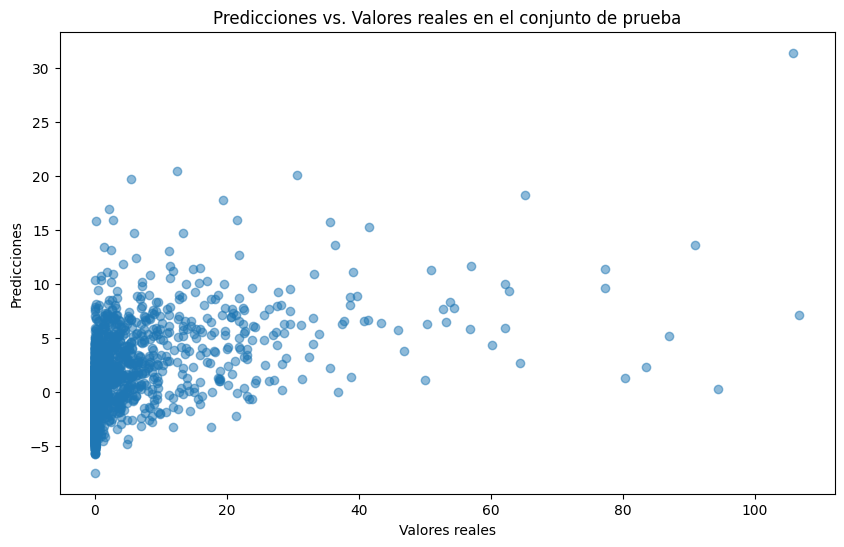

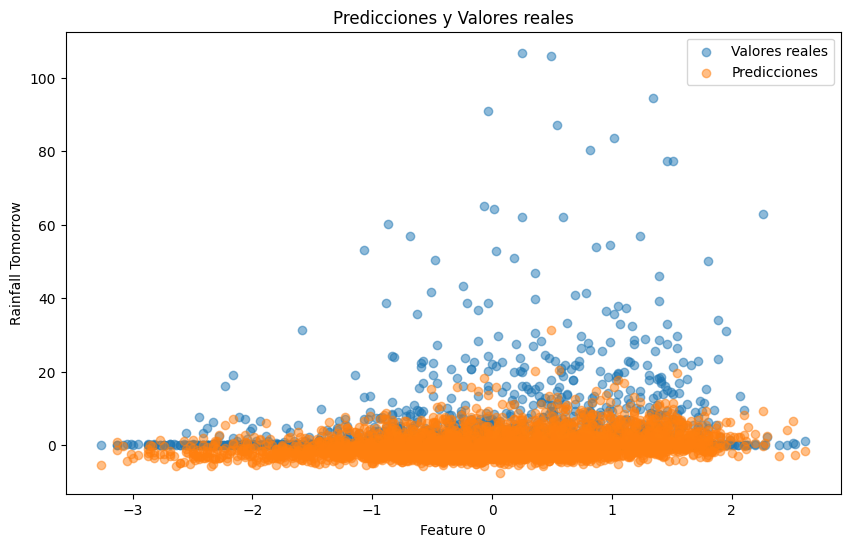

In [ ]:
# instancia del modelo con los mejores hiperparámetros
best_model = GradientDescentRegressor(learning_rate=best_params['learning_rate'], num_iterations=best_params['num_iterations'])
best_model.fit(X_train3, y_train3)

# predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test3)

# error en el conjunto de prueba
test_error = mean_squared_error(y_test3, y_pred)
r2 = r2_score(y_test3, y_pred)

print("Error en el conjunto de prueba (MSE):", test_error)
print("Coeficiente de determinación (R2):", r2)

# Graficos
plt.figure(figsize=(10, 6))
plt.scatter(y_test3, y_pred, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores reales en el conjunto de prueba")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test3[:, 0], y_test3, alpha=0.5, label="Valores reales")
plt.scatter(X_test3[:, 0], y_pred, alpha=0.5, label="Predicciones")
plt.xlabel("Feature 0")
plt.ylabel("Rainfall Tomorrow")
plt.title("Predicciones y Valores reales")
plt.legend()
plt.show()

# Regularizaciones: Ridge, Lasso y Elastic Net

Basándonos en el modelo de regresión lineal 3, que fue el que mejores resultados nos otorgó, realizaremos regularización Ridge.

Es importante mencionar que los siguientes resultados (tanto como para Ridge, Lasso y Elastic Net) fueron realizados sobre los datos del modelo 3 de la entrega pasada, donde había fuga de datos.

A continuación, vemos como fueron variando los parámetros del modelo.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.76881e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.28349e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.38049e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08396e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


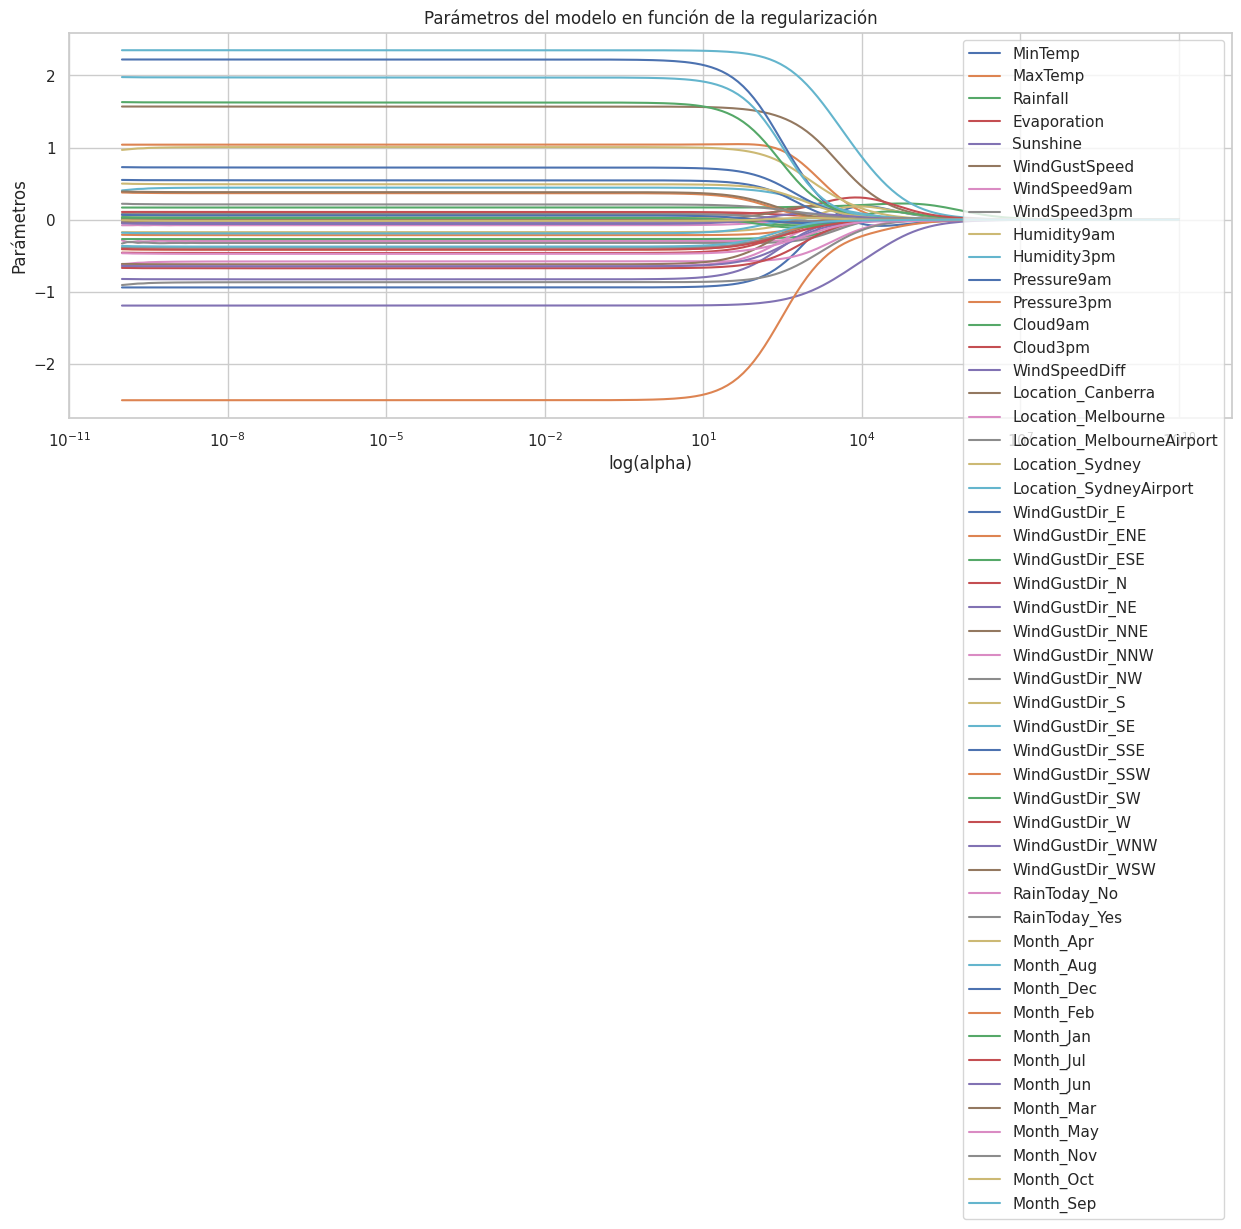

In [ ]:
alphas = modelo_ridge.alphas
coefs = []

for alpha in alphas:
    modelo_aux =  Ridge(alpha=alpha)
    modelo_aux.fit(xtrain_mod3, ytrain_mod3)
    coefs.append(modelo_aux.coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=xtrain_mod3.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

En el siguiente gráfico se muestra cómo fue evolucionando el error de validación en función del alpha.

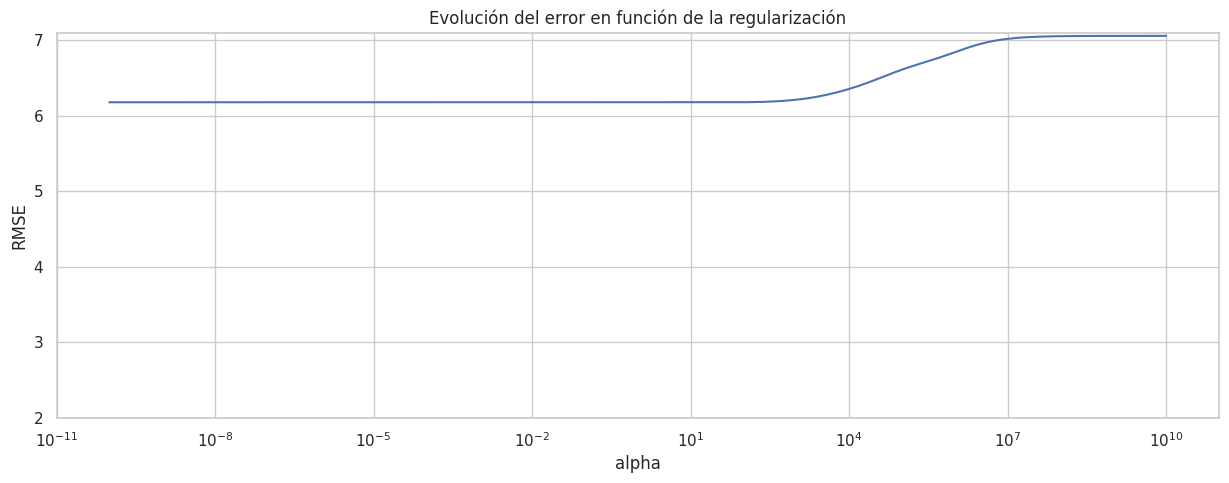

In [ ]:
mse_cv = modelo_ridge.cv_values_.reshape((-1, 200)).mean(axis=0)

# Aplicamos la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Identificamos el mejor
min_rmse     = np.min(rmse_cv)
optimo       = modelo_ridge.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(modelo_ridge.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [ ]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado en Ridge: {round(modelo_ridge.alpha_,4)}")

Mejor valor de alpha encontrado en Ridge: 36.1234


Vemos que el mejor alpha que encontró el modelo es 36.12 aproximadamente.

Finalmente, conoceremos el R^2 y el rmse luego de aplicar la regularización Ridge.

In [ ]:
from sklearn.metrics import r2_score

y_pred_ridge = modelo_ridge.predict(xtest_mod3)
R2_ridge = r2_score(ytest_mod3, y_pred_ridge)

print("R^2 luego de aplicar Ridge:", round(R2_ridge,4))

R^2 luego de aplicar Ridge: 0.2339


In [ ]:
rmse_ridge = mean_squared_error(ytest_mod3,
                y_pred_ridge,
                squared = False
             )

print(f"El error (rmse) de test para Ridge es: {round(rmse_ridge,4)}")

El error (rmse) de test para Ridge es: 7.247


Las métricas brindadas por Ridge no proporcionaron mejores resultados que las que brindó el modelo 3, sino que son bastante similares.

### Regularización Lasso

Entrenaremos el modelo aplicando Lasso y luego visualizaremos cómo variaron los coeficientes del modelo en función de la regularización.

In [ ]:
modelo_lasso = LassoCV(alphas=np.logspace(-2, 2, 200), cv=10)
_ = modelo_lasso.fit(xtrain_mod3, ytrain_mod3.ravel())

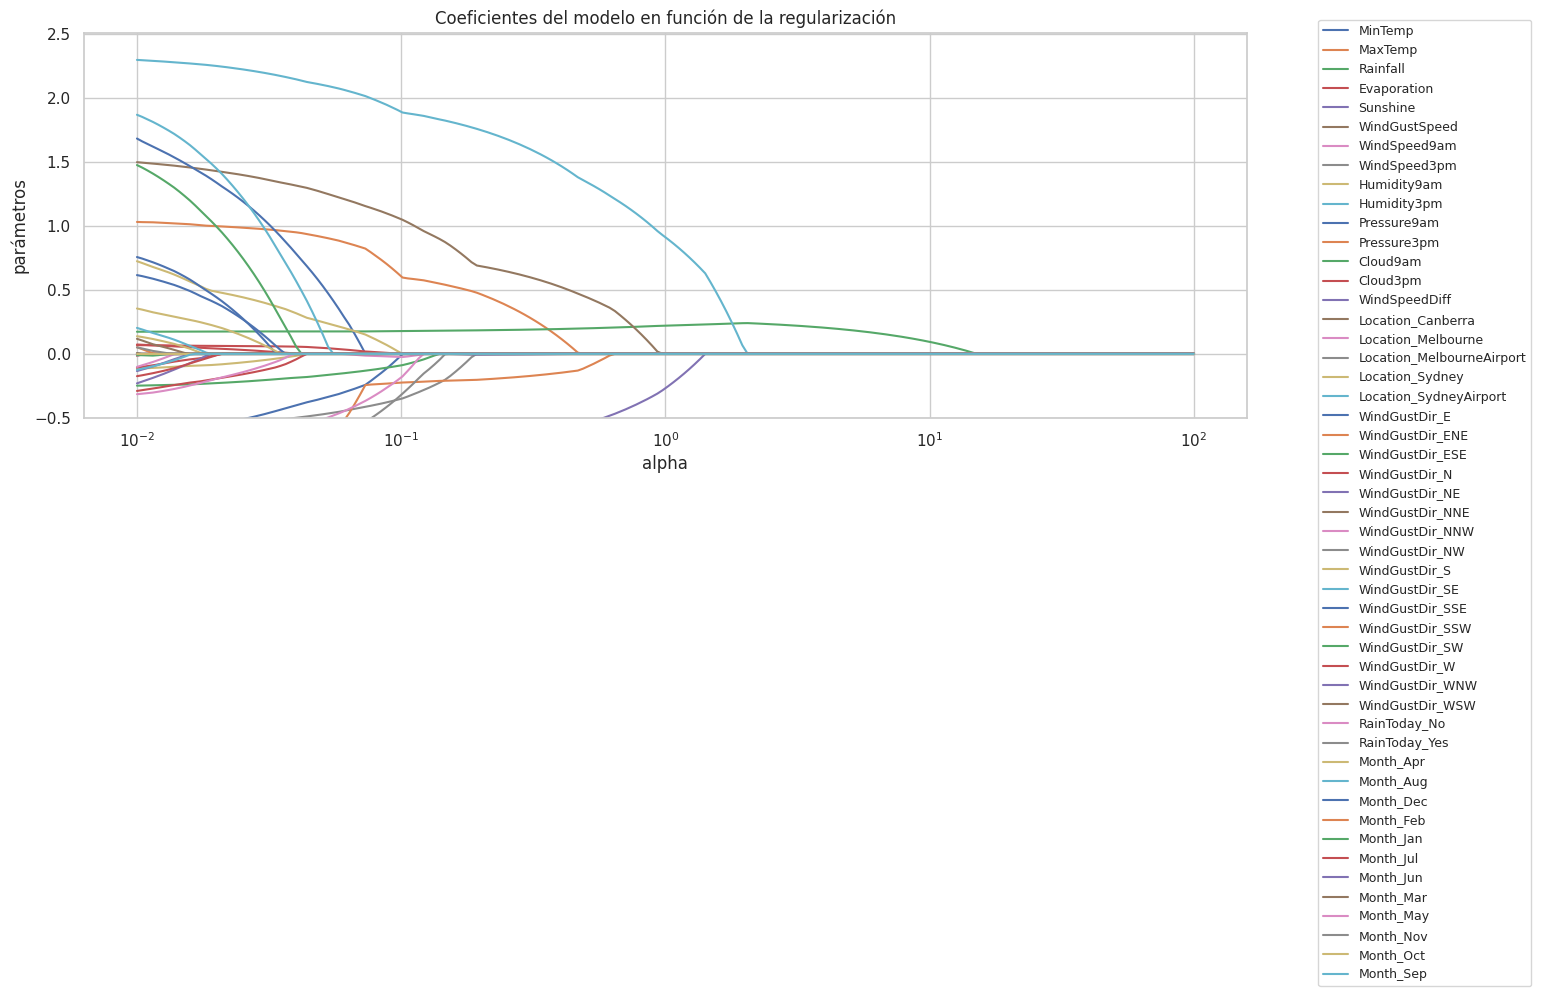

In [ ]:
alphas = modelo_lasso.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = Lasso(alpha=alpha)
    modelo_aux.fit(xtrain_mod3, ytrain_mod3)
    coefs.append(modelo_aux.coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=xtest_mod3.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')

ax.legend()
# Ajustar la leyenda
legend = ax.legend(prop={'size': 9}, loc='upper right', bbox_to_anchor=(1.25, 1.05))
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Luego, hacemos predicciones y calculamos el error rmse y el R^2.

In [ ]:
y_pred_lasso = modelo_lasso.predict(xtest_mod3)

rmse_lasso = mean_squared_error(ytest_mod3,y_pred_lasso,squared = False)
print(f"El error (rmse) de test es: {round(rmse_lasso,4)}")

R2_lasso = metrics.r2_score(ytest_mod3, y_pred_lasso)
print(f"El R^2 para Lasso es: {round(R2_lasso,4)}")

El error (rmse) de test es: 7.2533
El R^2 para Lasso es: 0.2326


Observamos que Lasso tampoco ha podido mejorar el resultado del R^2 respecto al del modelo 2 de regresión lineal, arrojando un R^2 aún menor que Ridge.

A continuación, un gráfico de cómo quedaron los coeficientes.

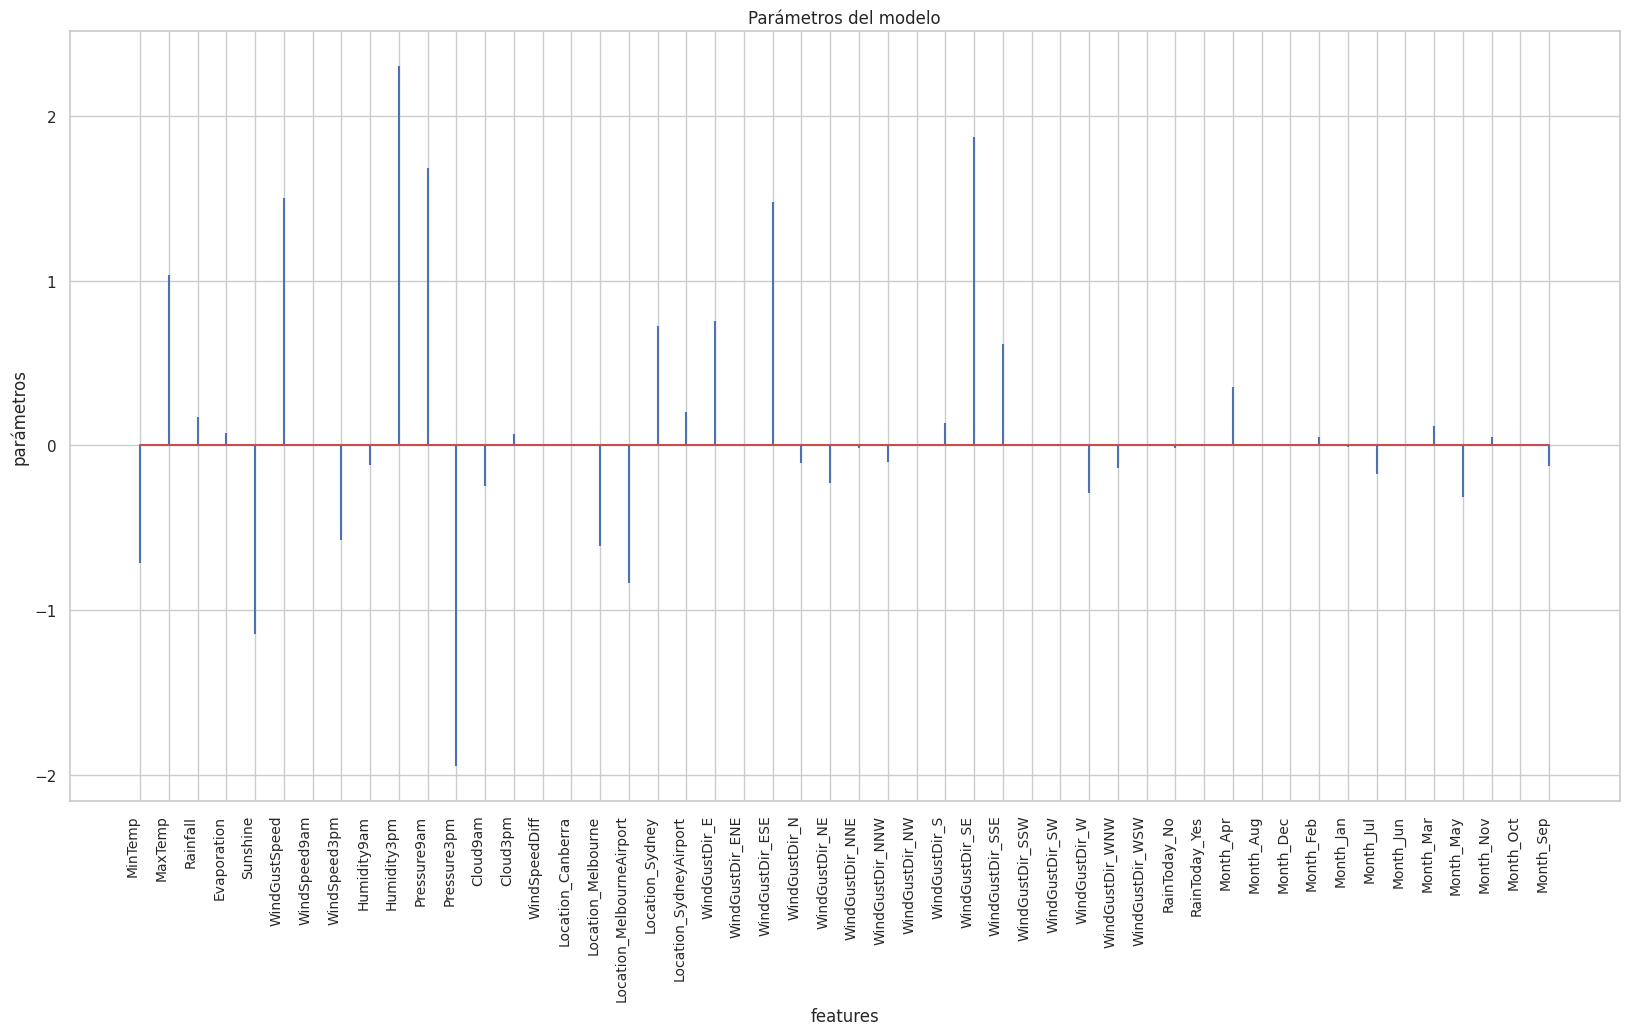

In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': xtrain_mod3.columns,
                         'coef': modelo_lasso.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
modelo_elastic = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas = np.logspace(-1, 1, 200),
                              cv = 10)

_ = modelo_elastic.fit(xtrain_mod3, ytrain_mod3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(f"Mejor valor de alpha encontrado: {modelo_elastic.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo_elastic.l1_ratio_}")

Mejor valor de alpha encontrado: 0.1
Mejor valor de l1_ratio encontrado: 0.1


In [ ]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': xtrain_mod3.columns,
                         'coef': modelo_elastic.coef_.flatten()}
                  )

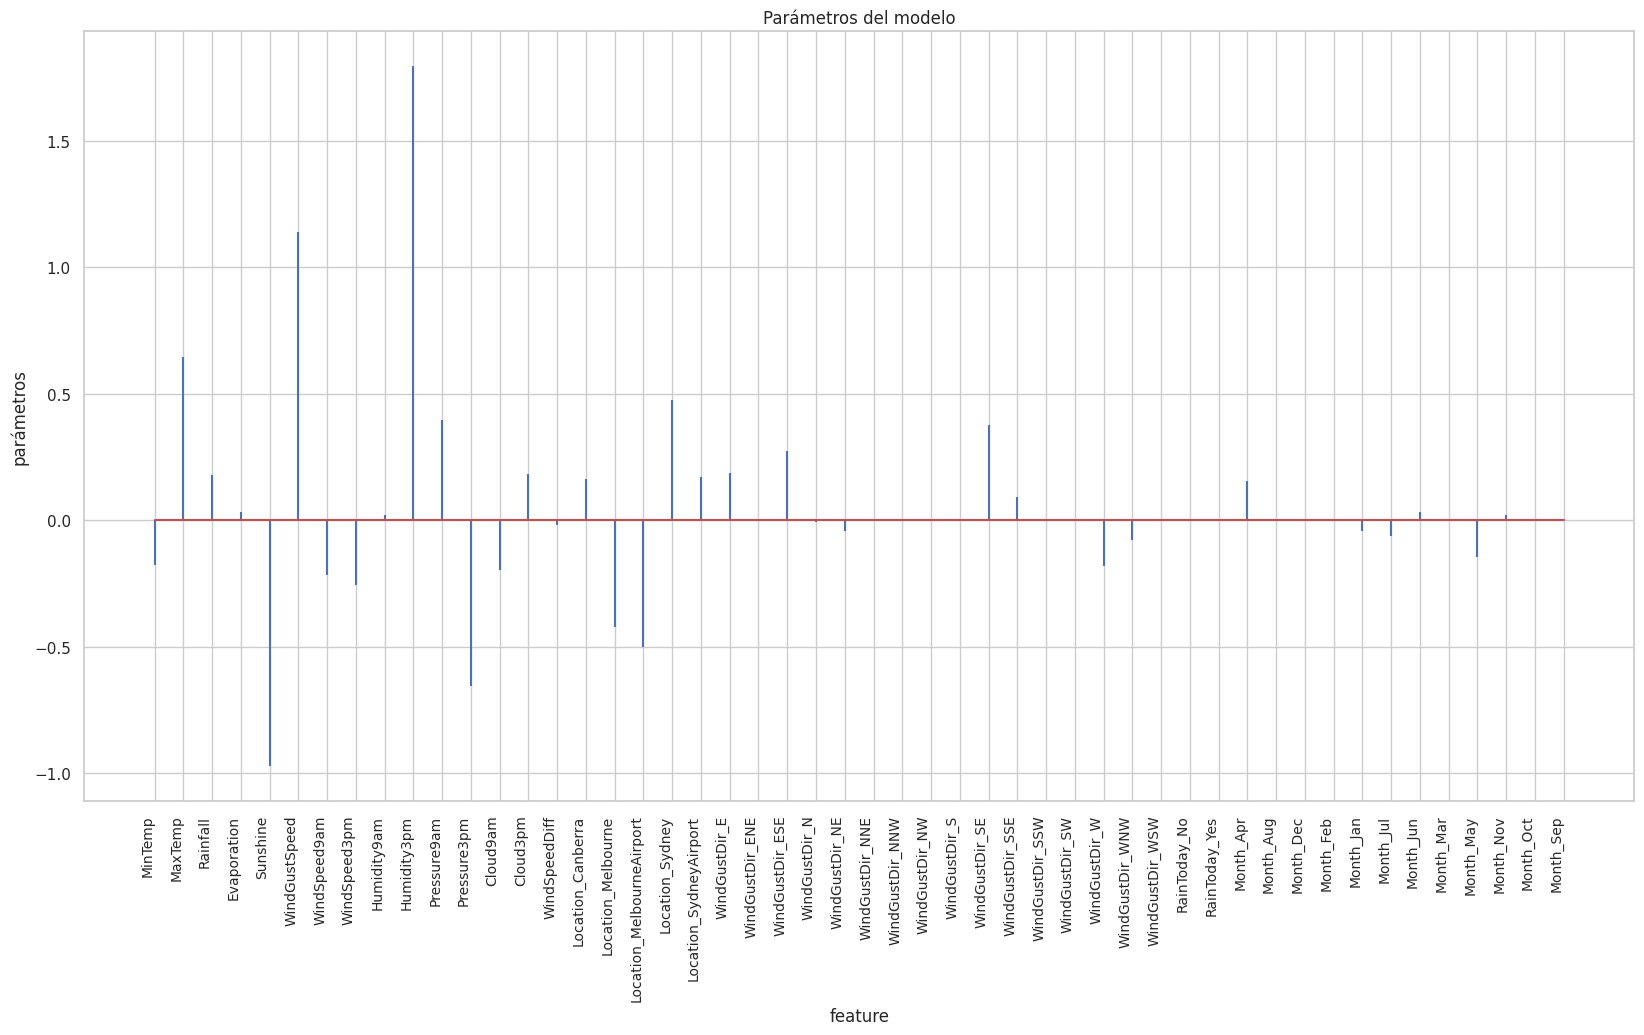

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

Luego, haremos predicciones.

In [ ]:
y_pred_elastic = modelo_elastic.predict(xtest_mod3)

rmse_elastic = mean_squared_error(ytest_mod3,y_pred_elastic, squared = False)
print("")
print(f"El error (rmse) de test es: {round(rmse_elastic,4)}")

R2_elastic = metrics.r2_score(ytest_mod3, y_pred_elastic)
print(f"El R^2 de elastic net es: {round(R2_elastic,4)}")


El error (rmse) de test es: 7.3222
El R^2 de elastic net es: 0.218


# Comparación Regresión Lineal - Ridge - Lasso - Elastic Net

A continuación, compararemos el rmse y el R^2 luego de haber entrenado el modelo 3 con regresión lineal, ridge, lasso y elastic net.

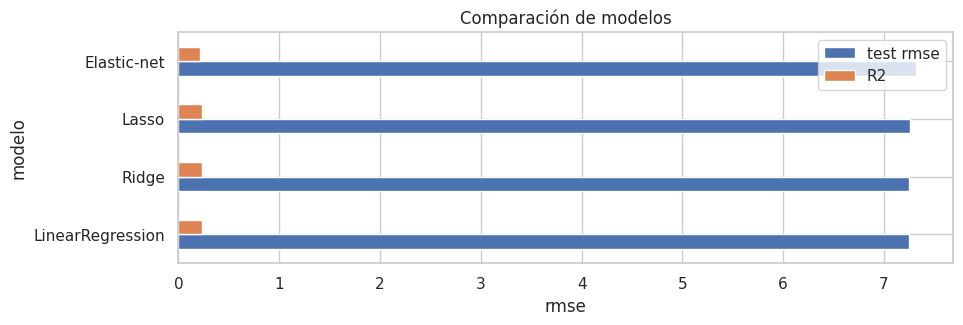

In [ ]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_mod3, rmse_ridge, rmse_lasso, rmse_elastic],
                    'R2': [R2_mod3, R2_ridge, R2_lasso, R2_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

Las diferencia entre los cuatro valores es mínima, casi no se diferencia a simple vista.

In [ ]:
for index, row in df_comparacion.iterrows():
    print(f"El valor de RMSE de {row['modelo']} es {row['test rmse']:.4f}")

print("")
for index, row in df_comparacion.iterrows():
    print(f"El valor de R^2 de {row['modelo']} es {row['R2']:.4f}")

El valor de RMSE de LinearRegression es 7.2446
El valor de RMSE de Ridge es 7.2470
El valor de RMSE de Lasso es 7.2533
El valor de RMSE de Elastic-net es 7.3222

El valor de R^2 de LinearRegression es 0.2344
El valor de R^2 de Ridge es 0.2339
El valor de R^2 de Lasso es 0.2326
El valor de R^2 de Elastic-net es 0.2180


Como se mencionó, la diferencia es mínima. El modelo que mayor rmse arrojó es Elastic Net, mientras que el que menos rmse obtuvo es el de la regresión lineal.

En cuanto a los R^2, el mejor valor fue obtenido por la regresión lineal, y el peor por Elastic Net.

Sin embargo, la diferencia es muy pequeña entre todos los valores (casi insignificante).

# Balanceo

Al intentar predecir las variables que nos interesan, 'RainfallTomorrow', y "RainTomorrow", nos encontramos con un problema: la mayoría de los días en el conjunto de datos no presentan lluvia ('RainTomorrow' = 'No').

Esta desproporción puede afectar tanto a los modelos de regresión como a los de clasificación, ya que el modelo puede tener dificultades para aprender de los datos debido a la falta de ejemplos positivos ('RainTomorrow' = 'Yes').

Para abordar este problema de desequilibrio de clases, decidimos aplicar una técnica de oversampling a los días en que no llueve. Esto implica duplicar o generar datos sintéticos de las instancias de 'No llueve' para igualar la proporción entre las dos clases.

Como esta estrategia tiene como objetivo mejorar la capacidad del modelo para aprender de los ejemplos negativos, primero analizaremos si mejora el rendimiento del modelo número 3 creado anteriormente.

In [ ]:
def balancear_dataframe(X_train, y_train):
    '''Balancea el conjunto de entrenamiento aplicando oversampling'''
    # Calculamos el número de días lluviosos y no lluviosos en el conjunto de entrenamiento
    rainy_data = X_train[y_train == 'Yes']
    non_rain_data = X_train[y_train == 'No']

    # Número de veces para aplicar oversampling
    oversample_factor = len(non_rain_data) // len(rainy_data)

    # Aplicamos oversampling al conjunto de entrenamiento
    oversampled_rainy_data = pd.concat([rainy_data] * oversample_factor, axis=0)

    # Concatenamos los dataframes: días lluviosos con oversampling y días no lluviosos del conjunto de entrenamiento original
    X_train_balanceado = pd.concat([X_train, oversampled_rainy_data], axis=0)
    y_train_balanceado = pd.concat([y_train, pd.Series(['Yes'] * len(oversampled_rainy_data))], axis=0)

    return X_train_balanceado, y_train_balanceado

In [ ]:
# Calculamos el número de días lluviosos y no lluviosos
rainy_data = df_model[df_model['RainTomorrow'] == 'Yes']
non_rain_data = df_model[df_model['RainTomorrow'] == 'No']

# Número de veces para aplicar oversampling
oversample_factor = len(non_rain_data) // len(rainy_data)

oversampled_rainy_data = pd.concat([rainy_data] * oversample_factor, axis=0)

# Concatenamos los dataframes: días lluviosos con oversampling y días no lluviosos del df original
oversampled_data = pd.concat([non_rain_data, oversampled_rainy_data], axis=0)

Como se observa, una vez que hemos aplicado oversampling, contamos con 10329 registros donde 'RainTomorrow' vale 'Yes' y 11593 registros donde 'RainTomorrow' vale 'No'.

In [ ]:
rainy_count = oversampled_data['RainTomorrow'].value_counts()['Yes']
non_rain_count = oversampled_data['RainTomorrow'].value_counts()['No']

print(f'Número de registros con RainTomorrow=Yes: {rainy_count}')
print(f'Número de registros con RainTomorrow=No: {non_rain_count}')

Número de registros con RainTomorrow=Yes: 10329
Número de registros con RainTomorrow=No: 11593


A continuación, graficamos las variables categóricas para ver cómo varió el gráfico de 'RainTomorrow'

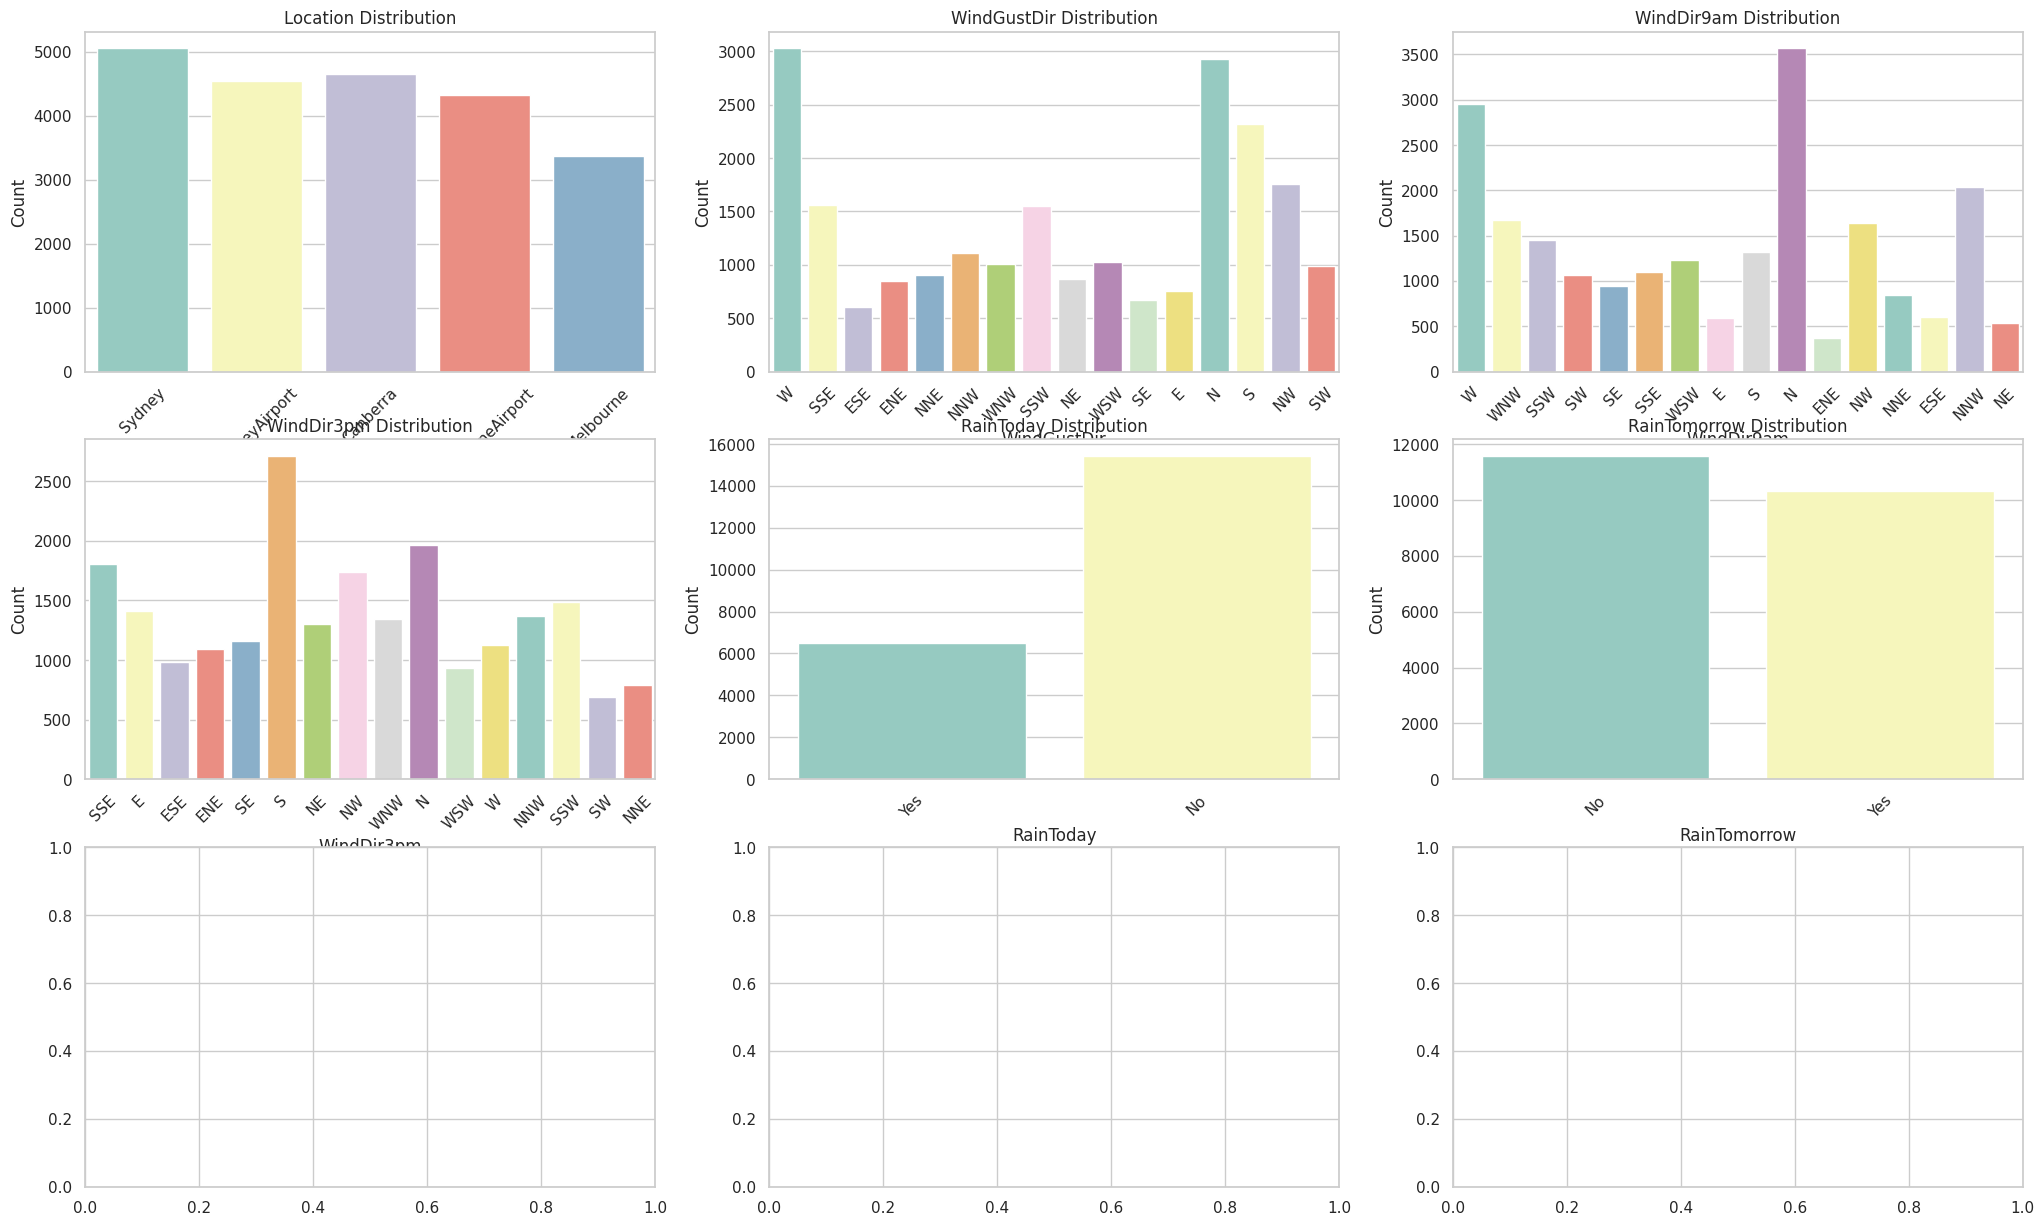

In [ ]:
# Gráficos de frecuencias de variables categóricas

fig, axes = plt.subplots(3, 3, figsize=(25, 15))
axes = axes.flatten()
for i, var in enumerate(categorical):
    sns.countplot(data=oversampled_data, x=var, palette="Set3", ax=axes[i])
    axes[i].set_title(f'{var} Distribution')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

Como mencionamos anteriormente, nos interesa volver a entrenar el modelo n°3 pero ésta vez sobre el nuevo dataframe con el fin de corroborar si, al haberlo balanceado, otorga mejores resultados.

In [ ]:
X3 = df_regresion.drop(columns=['RainfallTomorrow', 'Date_cos', 'Date_sin', 'WindDir9am_cos',
                                'WindDir9am_sin', 'WindDir3pm_cos', 'WindDir3pm_sin', 'WindGustDir_cos', 'WindGustDir_sin', 'Temp9am',
                                'Temp3pm', 'TempDiff', 'PressureDiff', 'CloudDiff', 'WindDir9am_E', 'WindDir9am_ENE',
                                'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
                                'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
                                'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
                                'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
                                'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
                                'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
                                'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
                                'WindDir3pm_WNW', 'WindDir3pm_WSW'])  # Variables predictoras

rainy_data = X3[X3['RainTomorrow_Yes'] == 1]
non_rain_data = X3[X3['RainTomorrow_Yes'] == 0]

# Número de veces para aplicar oversampling
oversample_factor = len(non_rain_data) // len(rainy_data)

oversampled_rainy_data = pd.concat([rainy_data] * oversample_factor, axis=0)

# Concatenamos los dataframes: días lluviosos con oversampling y días no lluviosos del df original
X3 = pd.concat([non_rain_data, oversampled_rainy_data], axis=0)

y3 = df_regresion['RainfallTomorrow'] # Variable a predecir

In [ ]:
print("Días que no llueven: ", len(X3[X3['RainTomorrow_Yes'] == 0]))
print("Días que llueven: ", len(X3[X3['RainTomorrow_Yes'] == 1]))

Días que no llueven:  11593
Días que llueven:  10329


In [ ]:
X3_balanced = X3.drop(columns=["RainTomorrow_Yes", "RainTomorrow_No"])

X_train3_bal, X_test3_bal, y_train3_bal, y_test3_bal = train_test_split(X3_balanced,y3.values.reshape(-1,1),test_size=0.2,random_state = 42)


ValueError: ignored

In [ ]:
len(X3['RainTomorrow_No'])

6886

In [ ]:
# Volvemos a entrenar el modelo 3, pero con el dataframe balanceado.

df_regresion = pd.get_dummies(oversampled_data)

X3 = df_regresion.drop(columns=['RainfallTomorrow', 'RainTomorrow_No', 'RainTomorrow_Yes', 'Date_cos', 'Date_sin', 'WindDir9am_cos',
                                'WindDir9am_sin', 'WindDir3pm_cos', 'WindDir3pm_sin', 'WindGustDir_cos', 'WindGustDir_sin', 'Temp9am',
                                'Temp3pm', 'TempDiff', 'PressureDiff', 'CloudDiff', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'])  # Variables predictoras

y3 = df_regresion['RainfallTomorrow'] # Variable a predecir

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3.values.reshape(-1,1),test_size=0.2,random_state = 42)

model3 =  LinearRegression()

model3.fit(X_train3, y_train3)  # Entrenamos

y_pred3 = model3.predict(X_test3) # Predecimos

R2_3 = metrics.r2_score(y_test3, y_pred3)
print("R^2: ", round(R2_3,4))

R^2:  0.3023


Se observa un aumento significativo en el coeficiente de determinación R^2 (anteriormente en 0.2344, ahora en 0.3023) después de balancear los datos. Este incremento sugiere que el modelo ha mejorado su capacidad para predecir la variable 'RainfallTomorrow'. El balanceo de datos ha permitido al modelo realizar predicciones más precisas y coherentes.

Aún así, consideramos que no llega a ser un R^2 aceptable.

Graficamos a continuación, los valores reales vs predicciones.

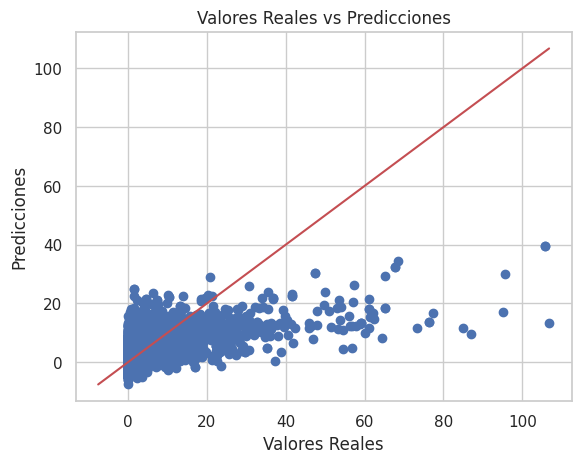

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(y_test3, y_pred3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

diagonal = np.linspace(min(y_test3.min(), y_pred3.min()), max(y_test3.max(), y_pred3.max()))
plt.plot(diagonal, diagonal, '-r')
plt.show()

# Regresión logística

A continuación, creamos una clase 'Regresion_Logistica', para facilitar el entrenamiento y evaluación de modelos de regresión logística. La clase toma como entrada un pipeline de scikit-learn, así como conjuntos de entrenamiento y prueba (X_train, y_train, X_test, y_test). También permite especificar el número de splits para la validación cruzada (cv).

Esta clase proporciona métodos para realizar el balanceo de datos mediante oversampling, entrenar el modelo con validación cruzada en datos balanceados, calcular métricas en el conjunto de prueba, y visualizar resultados como la matriz de confusión, curva ROC, y métricas de validación cruzada.

Además, ofrece funcionalidades para obtener los conjuntos de datos procesados por la tubería y realizar visualizaciones de los resultados de la validación cruzada, incluyendo gráficos de barras para métricas como Accuracy, Recall y Precision.

In [ ]:
class Regresion_Logistica:
    '''Clase para entrenar un modelo de regresión logística'''
    def __init__(self, pipeline, X_train, y_train, X_test, y_test, cv=5):
        self.pipeline = pipeline
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.cv = cv
        self.cv_scores = []  # Almacena las métricas de cada fold

    def balance_data(self):
        '''Aplica oversampling a los datos de entrenamiento'''
        oversampler = RandomOverSampler(random_state=42)
        self.X_train_balanced, self.y_train_balanced = oversampler.fit_resample(self.X_train, self.y_train)
        #chequear si se hizo el balanceo
        unique, counts = np.unique(self.y_train_balanced, return_counts=True)
        class_distribution = dict(zip(unique, counts))
        print("Distribución de clases en datos de entrenamiento balanceados:")
        print(class_distribution)

    def train_model(self):
        '''Entrena el modelo con validación cruzada y calcula las métricas para cada fold en datos balanceados'''

        for i, (train_index, test_index) in enumerate(KFold(n_splits=self.cv).split(self.X_train_balanced, self.y_train_balanced)):
            X_train_fold, X_test_fold = self.X_train_balanced.iloc[train_index], self.X_train_balanced.iloc[test_index]
            y_train_fold, y_test_fold = self.y_train_balanced.iloc[train_index], self.y_train_balanced.iloc[test_index]

            self.pipeline.fit(X_train_fold, y_train_fold)
            y_pred_fold = self.pipeline.predict(X_test_fold)

            # Calcular métricas para clasificación
            accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
            recall_fold = recall_score(y_test_fold, y_pred_fold)
            precision_fold = precision_score(y_test_fold, y_pred_fold)

            self.cv_scores.append({
                'accuracy': accuracy_fold,
                'recall': recall_fold,
                'precision': precision_fold
            })

            print(f"\nConjunto de Validación Cruzada {i + 1}:")
            print("Accuracy:", round(accuracy_fold, 4))
            print("Recall:", round(recall_fold, 4))
            print("Precision:", round(precision_fold, 4))

    def calculate_test_metrics(self):
        '''Calcula las métricas en el conjunto de prueba'''
        y_pred_test = self.pipeline.predict(self.X_test)

        # Calcular métricas
        accuracy_test = accuracy_score(self.y_test, y_pred_test)
        recall_test = recall_score(self.y_test, y_pred_test)
        precision_test = precision_score(self.y_test, y_pred_test)

        print("\nMétricas en Conjunto de Prueba:")
        print("Accuracy:", round(accuracy_test, 4))
        print("Recall:", round(recall_test, 4))
        print("Precision:", round(precision_test, 4))

        return accuracy_test, recall_test, precision_test

    def plot_confusion_matrix(self):
        '''Muestra la matriz de confusión en el conjunto de prueba'''
        y_pred_test = self.pipeline.predict(self.X_test)

        # Calcular la matriz de confusión
        cm = confusion_matrix(self.y_test, y_pred_test)

        # Mostrar la matriz de confusión
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
        plt.title('Matriz de Confusión en Conjunto de Prueba')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    def plot_results(self):
        '''Muestra gráficamente los resultados de la validación cruzada'''

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

        # Plot de barras para Accuracy
        accuracies = [fold['accuracy'] for fold in self.cv_scores]
        ax1.barh(range(len(accuracies)), accuracies, color='skyblue', label='Accuracy')
        ax1.set_yticks(range(len(accuracies)))
        ax1.set_yticklabels([f'Fold {i+1}' for i in range(len(accuracies))])
        ax1.set_xlabel('Accuracy')
        ax1.set_title('Resultados de Validación Cruzada (Accuracy)')

        # Plot de barras para Recall
        recalls = [fold['recall'] for fold in self.cv_scores]
        ax2.barh(range(len(recalls)), recalls, color='green', label='Recall')
        ax2.set_yticks(range(len(recalls)))
        ax2.set_yticklabels([f'Fold {i+1}' for i in range(len(recalls))])
        ax2.set_xlabel('Recall')
        ax2.set_title('Resultados de Validación Cruzada (Recall)')

        # Plot de barras para Precision
        precisions = [fold['precision'] for fold in self.cv_scores]
        ax3.barh(range(len(precisions)), precisions, color='orange', label='Precision')
        ax3.set_yticks(range(len(precisions)))
        ax3.set_yticklabels([f'Fold {i+1}' for i in range(len(precisions))])
        ax3.set_xlabel('Precision')
        ax3.set_title('Resultados de Validación Cruzada (Precision)')

        plt.show()

    def plot_roc_curve(self):
        '''Muestra la curva ROC y la métrica AUC-ROC en el conjunto de prueba'''
        y_pred_prob = self.pipeline.predict_proba(self.X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(self.y_test, y_pred_prob)
        roc_auc = roc_auc_score(self.y_test, y_pred_prob)  # Utilizar roc_auc_score en lugar de auc

        # Plot de la curva ROC
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Curva ROC en Conjunto de Prueba')
        plt.legend(loc='lower right')
        plt.show()

        print(f'Métrica AUC-ROC en Conjunto de Prueba: {roc_auc:.4f}')

    def get_processed_data(self):
        '''Obtiene los conjuntos de entrenamiento y prueba procesados por la tubería'''
        X_train_log_transformed = self.pipeline.named_steps['preprocessor'].transform(self.X_train)
        X_test_log_transformed = self.pipeline.named_steps['preprocessor'].transform(self.X_test)

        return X_train_log_transformed, X_test_log_transformed, self.y_train, self.y_test

Una vez balanceado el dataset, el propósito de esta sección es predecir la variable categórica 'RainTomorrow' mediante un modelo de regresión logística y analizar sus métricas.

In [ ]:
X_log = df_regresion[['Cloud3pm', 'Cloud9am', 'Evaporation', 'Humidity3pm', 'Humidity9am', 'Location_Canberra', 'Location_Melbourne',
                      'Location_MelbourneAirport', 'Location_Sydney', 'Location_SydneyAirport', 'MaxTemp', 'MinTemp', 'Month_Apr',
                      'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov',
                      'Month_Oct', 'Month_Sep', 'Pressure3pm', 'Pressure9am', 'RainToday_No', 'RainToday_Yes', 'Rainfall', 'Sunshine',
                      'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
                      'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
                      'WindGustDir_WNW', 'WindGustDir_WSW', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'WindSpeedDiff']]

y_log = df_regresion['RainTomorrow_Yes'] # Variable a predecir

X_trainlog, X_testlog, y_trainlog, y_testlog = train_test_split(X_log, y_log, test_size=0.2,random_state = 42)

# Contruimos una tubería
regresion_pipe_log = construir_pipeline(X_log, y_log, modelo=LogisticRegression())

# Creamos un objeto de clase Regresión logística y entrenamos el modelo
regresion_trainer_log = Regresion_Logistica(regresion_pipe_log, X_trainlog, y_trainlog, X_testlog, y_testlog)

regresion_trainer_log.balance_data() #balanceamos train

# entrenamos el modelo y calculamos métricas
regresion_trainer_log.train_model()
regresion_trainer_log.calculate_test_metrics()

Distribución de clases en datos de entrenamiento balanceados:
{0: 9298, 1: 9298}

Conjunto de Validación Cruzada 1:
Accuracy: 0.7554
Recall: 0.8127
Precision: 0.4673

Conjunto de Validación Cruzada 2:
Accuracy: 0.7486
Recall: 0.8061
Precision: 0.4729

Conjunto de Validación Cruzada 3:
Accuracy: 0.7362
Recall: 0.8005
Precision: 0.4533

Conjunto de Validación Cruzada 4:
Accuracy: 0.7064
Recall: 0.6802
Precision: 0.949

Conjunto de Validación Cruzada 5:
Accuracy: 0.6246
Recall: 0.6246
Precision: 1.0

Métricas en Conjunto de Prueba:
Accuracy: 0.8268
Recall: 0.6536
Precision: 0.6297


(0.8267952127659575, 0.6535764375876578, 0.6297297297297297)

In [ ]:
X_train_log_transformed, X_test_log_transformed, y_train_log, y_test_log = regresion_trainer_log.get_processed_data()

Los valores de accuracy en los conjuntos de validación cruzada varían entre aproximadamente 0.62 y 0.76. La variabilidad puede deberse a diferentes particiones de los datos en cada fold.

En cuanto al Recall (proporción de casos positivos reales que el modelo identifica correctamente), que varían entre 0.62 y 0.81, el modelo parece tener un rendimiento razonable.

La precisión es alta en algunos conjuntos, pero baja en otros, especialmente en el Conjunto de Validación Cruzada 4.

Accuracy en el conjunto de prueba es de aproximadamente 0.83, lo que indica que el modelo generaliza bien a nuevos datos. El recall en el conjunto de prueba es de alrededor de 0.65, lo que sugiere que el modelo identifica correctamente alrededor del 65% de los casos positivos. La precisión en el conjunto de prueba es de aproximadamente 0.63, lo que significa que alrededor del 63% de los casos identificados como positivos son realmente positivos.

Las métricas en el conjunto de prueba no difieren en gran medida de las obtenidas para el conjunto de entrenamiento. Podríamos decir entonces que el modelo generaliza bien para nuevos datos.

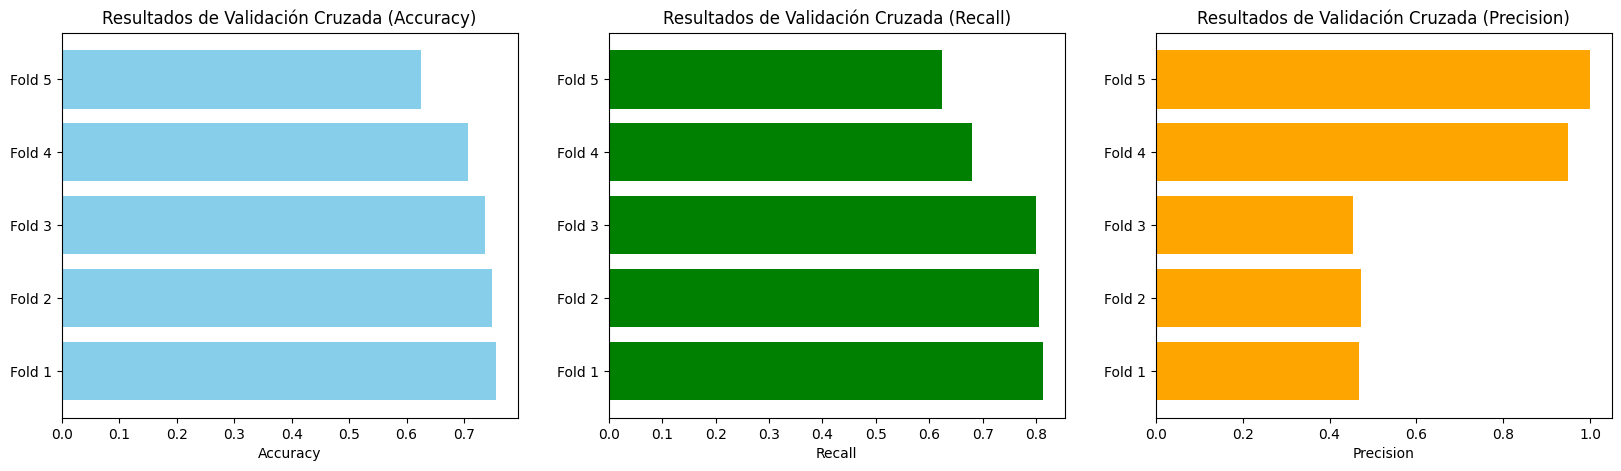

In [ ]:
regresion_trainer_log.plot_results()

Aquí podemos visualizar la cantidad de valores predichos versus los reales.

En el caso de un modelo de clasificación binaria, podemos analizar métricas tales como accuracy, precisión, recall, F1 score

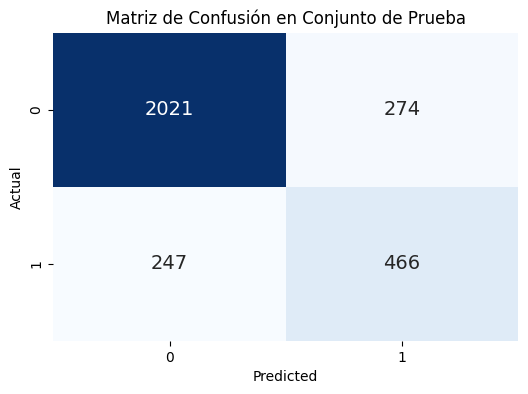

In [ ]:
regresion_trainer_log.plot_confusion_matrix()

Como podemos observar, las métricas han dado valores similares alrededor de 0.77. Son razonables según la naturaleza del problema, en el sentido de que un falso positivo o negativo no tendrá grandes repercusiones (nadie va a morir en el caso de una mala predicción de la lluvia). Si estuviesemos estudiando otros problemas, tal vez sea necesario ser más exigentes de las métricas.


A continuación vemos la curva ROC

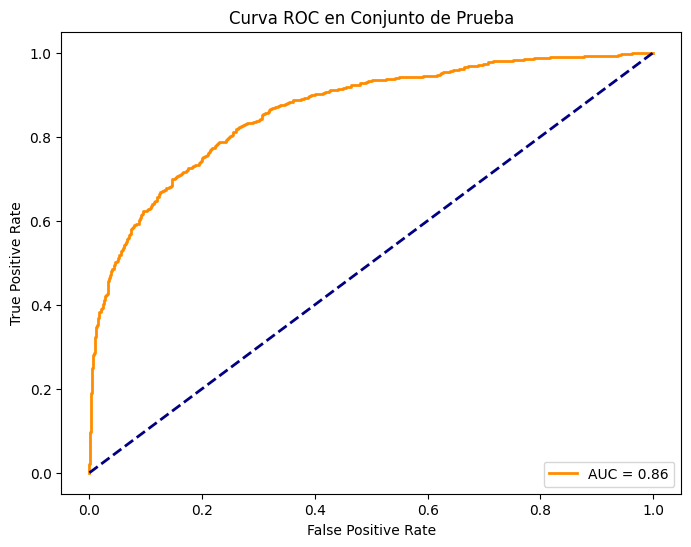

Métrica AUC-ROC en Conjunto de Prueba: 0.8627


In [ ]:
regresion_trainer_log.plot_roc_curve()

En una curva ROC, cada punto representa un modelo de clasificación binaria, mientras que los ejes x e y representan los falsos positivos y los verdaderos positivos respectivamente.

Si la curva se encuentra por debajo de la identidad, hay más falsos positivos que verdaderos, lo que implica un mal modelo. Si la curva se encuentra por encima, lo contrario.

Un punto ideal es la esquina superior izquierda que implica que no hay falsos positivos.

Como podemos observar, la curva de los modelos de regresión logística se encuentra por encima de la identidad. Junto con el análisis de métricas, podemos concluir que nuestro modelo de regresión logística predice considerablemente bien.

# Modelos base



### Modelo base para Clasificación

Dada la predominancia de días sin lluvia en el dataset, el enfoque que deicidimos llevar a cabo para un modelo base de clasificación consiste en una predicción sencilla: si hoy llueve ('RainToday' igual a 1), entonces pronosticamos lluvia también para mañana ('RainTomorrow' igual a 1). Por otro lado, si hoy no llueve ('RainToday' igual a 0), anticipamos un día sin lluvia para mañana ('RainTomorrow' igual a 0).


A continuación, creamos el modelo base para clasificación que simplemente predice teniendo en cuenta la clase más frecuente debido a que el dataset está desbalanceado.

In [ ]:
# utilizamos el mismo conjunto de train-test para regresión logística

# rellenamos faltantes
imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer_X.fit_transform(X_trainlog), columns=X_trainlog.columns)

# Estandarización para X_train_imputed
scaler_X = StandardScaler()
X_train_scaled = pd.DataFrame(scaler_X.fit_transform(X_train_imputed), columns=X_train_imputed.columns)

# Imputación por la media para y_train_log
imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = pd.Series(imputer_y.fit_transform(y_trainlog.values.reshape(-1, 1)).flatten(), name=y_train_log.name)

# Estandarización para y_train_imputed
scaler_y = StandardScaler()
y_train_scaled = pd.Series(scaler_y.fit_transform(y_train_imputed.values.reshape(-1, 1)).flatten(), name=y_train_imputed.name)

In [ ]:
def base_classification_model(X_train):
    '''Modelo base de clasificación que predice "Sí" si 'RainToday_Yes' vale 1, y "No" en caso contrario.'''

    predictions = np.where(X_train['RainToday_Yes'] == 1, 1, 0)

    return predictions

# utilizamos la función
base_pred = base_classification_model(X_train_scaled)

In [ ]:
y_train_true = y_trainlog

# predicciones del modelo base
base_pred = base_classification_model(X_train_scaled)

# métricas de evaluación
accuracy = accuracy_score(y_train_true, base_pred)
precision = precision_score(y_train_true, base_pred, average='weighted')
recall = recall_score(y_train_true, base_pred, average='weighted')
f1 = f1_score(y_train_true, base_pred, average='weighted')
roc_auc = roc_auc_score(y_train_true, base_pred)

# Imprimir métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.773029597605587
Precision: 0.5975747587742557
Recall: 0.773029597605587
F1 Score: 0.6740719495954935
ROC-AUC: 0.5


Las métricas que se observan a partir del modelo base son considerablemente bajas. Por otro lado, se puede deducir a simple vista que el dataset está desbalanceado porque, aún siendo un modelo ingenuo ya que es imposible que nunca llueva, algunas métricas alcanzan el 0.5 (equivalente a predecir aleatoriamente).

## Regresión

Como tenemos información acerca de la fecha, armamos nuestro modelo base teniendo en cuenta una serie temporal. Este modelo consiste en predecir la cantidad de lluvia en base a la media de los 7 días previos.

Elegimos este enfoque debido a la proximidad del rango temporal a la fecha actual, lo cual tiene más sentido en términos de mantener la coherencia estacional y la similitud de los pronósticos. En contraste con la opción de utilizar parámetros estadísticos basados en el conjunto de datos completo, centrarnos en los 7 días previos nos permite capturar mejor las estaciones y mantener la relevancia de los pronósticos al considerar un intervalo más cercano en el tiempo.

Comenzamos cargando nuevamente el conjunto de datos dentro de la variable 'dataframe' ya que nos interesa contar con la fecha, y en los dataframes trabajados anteriormente ésta columna ya ha sido modificada.

Luego, cambiamos su formato y establecemos la columna como índice. Finalmente, ordenamos el dataframe por fecha.

Cabe aclarar que también eliminamos los nulos de la columna Rainfall al igual que habíamos hecho en el análisis exploratorio y tratamiento de valores nulos al comienzo del trabajo práctico.

In [ ]:
#dataframe = pd.read_csv("weatherAUS.csv") #vuelvo a cargar el df, porque los demás tienen modificada la fecha
#dataframe.dropna(subset=['Rainfall'], inplace=True) # Eliminamos los valores nulos de Rainfall
#dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%Y-%m-%d')
#dataframe.set_index('Date', inplace=True) #Establececemos'Date' como el índice del DataFrame
#dataframe.sort_index(inplace=True) # Ordenamos el DataFrame por la variable de tiempo

A modo de explicación gráfica para este modelo, a continuación se muestra la serie temporal. Se grafica en azul los datos reales de lluvia, y en rojo los promedios basados en los 7 días previos.

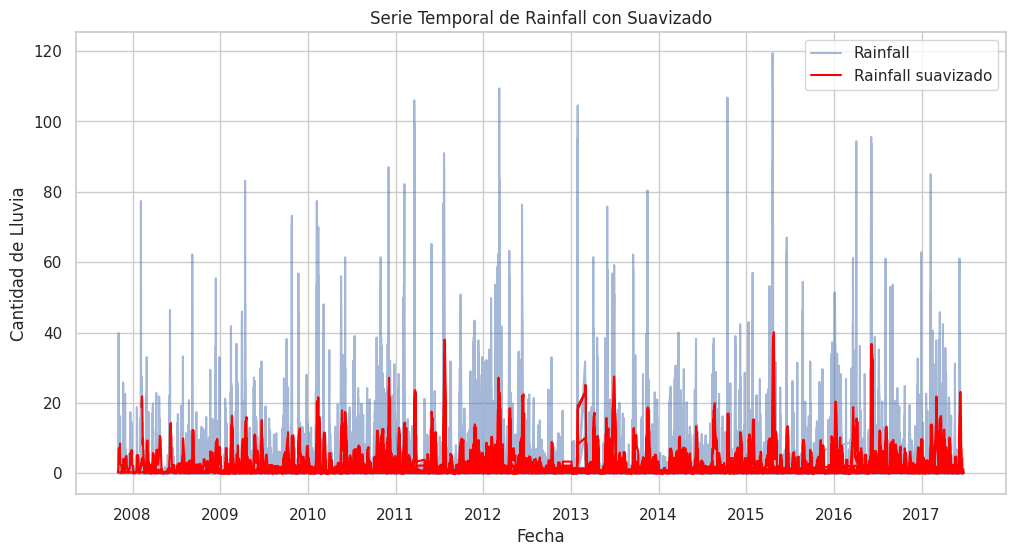

In [ ]:
# Calculamos la media móvil con una ventana de 7 días
data_no_outliers['Rainfall_smoothed'] = data_no_outliers['Rainfall'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(data_no_outliers['Date'], data_no_outliers['Rainfall'], label='Rainfall', alpha=0.5)  # Serie temporal original
plt.plot(data_no_outliers['Date'], data_no_outliers['Rainfall_smoothed'], label='Rainfall suavizado', color='red')  # Serie temporal suavizada
plt.title('Serie Temporal de Rainfall con Suavizado')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Lluvia')
plt.legend()
plt.show()

Definimos una función con nuestro modelo base, que recibe una serie ordenada (esto fue realizado anteriormente cuando ordenamos el dataframe en base a la fecha) y devuelve las predicciones en base a la media de los 3 días previos.

In [ ]:
def base_pred_regression(series):
    """
    Modelo base para regresión que predice la cantidad de lluvia
    en base a la lluvia promedio de los 7 días anteriores.
    """
    pred_reg_base = series.rolling(window=30).mean()
    pred_reg_base = pred_reg_base.fillna(method='bfill')

    return pred_reg_base

predicciones = base_pred_regression(data_no_outliers['Rainfall']) #Predecimos en base a los 7 dias anteriories.

In [ ]:
R2_3 = metrics.r2_score(data_no_outliers['Rainfall'], predicciones)
print("R^2: ", round(R2_3,4))

R^2:  0.041


Observamos que el valor de R^2 para el modelo base de regresión es de aproximadamente 0,198.

Este valor, aunque no sea alto, es bastante relevante si consideramos que hemos implementado modelos de regresión lineal en seis conjuntos de entrenamiento-prueba diferentes, y el coeficiente más alto obtenido en estos casos fue de 0.2344.

Concluimos que, a pesar de que el R^2 no alcanza valores significativamente altos, el modelo base proporciona una base aceptable considerando la complejidad del conjunto de datos y las limitaciones que respectan a la predicción de la cantidad de lluvia.

## Alternativa
Otra alternativa es crear una serie temporal pero en lugar de toda la historia del dataset, de un solo año, agrupando según año y promediando los registros.

El performance de este modelo base es muy malo, sin embargo es un modelo base.

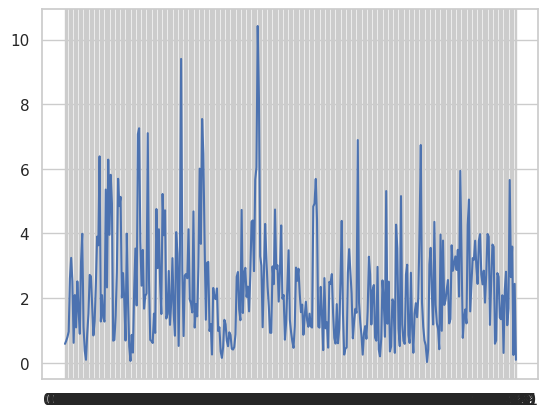

In [ ]:
data_no_outliers['MonthDay'] = data_no_outliers['Date'].dt.strftime('%m-%d')
average_rainfall = data_no_outliers.groupby('MonthDay')['Rainfall'].mean().reset_index()
average_rainfall['smoothed_Rainfall'] = average_rainfall['Rainfall']
#average_rainfall['smoothed_Rainfall'] = average_rainfall['Rainfall'].rolling(window=7).mean()
#average_rainfall['smoothed_Rainfall'] = average_rainfall['smoothed_Rainfall'].fillna(method='bfill')
plt.plot(average_rainfall['MonthDay'], average_rainfall['smoothed_Rainfall'])

In [ ]:
def base_pred_regression(date_series):
    """
    Modelo base para regresión que predice la cantidad de lluvia
    en base a la lluvia promedio de los 7 días anteriores.
    Predice según la fecha
    """
    X_dates = date_series.dt.strftime('%m-%d') # Pasamos a meses y dias
    merged_df = pd.merge(average_rainfall, pd.DataFrame({'MonthDay': X_dates}), on='MonthDay', how='right') # Mergeamos
    merged_df['smoothed_Rainfall'] = merged_df['smoothed_Rainfall'].interpolate()
    predicted_rainfall = merged_df['smoothed_Rainfall']
    return predicted_rainfall

predicciones = base_pred_regression(data_no_outliers['Date']) #Predecimos en base a los 7 dias anteriories.

In [ ]:
R2_3 = metrics.r2_score(data_no_outliers['Rainfall'], predicciones)
print("R^2: ", round(R2_3,4))

R^2:  0.0497


## Nuevo modelo base de Regresión sobre X_train y sin fuga de datos

Al inicio del análisis, exploramos el mapa de correlaciones entre las variables del conjunto de datos, revelando que la variable objetivo 'RainfallTomorrow' no presentaba una correlación significativa con otras variables. No obstante, durante el proceso de entrenamiento del Modelo 3, mencionamos que la exclusión de las variables relacionadas con la humedad tenían un impacto negativo en las métricas de rendimiento del modelo.

Por lo tanto, para establecer un modelo base de regresión, decidimos realizar una regresión lineal simple utilizando la variable 'Humidity3pm'. La elección de esta variable en lugar de 'Humidity9am' se debe a su mayor correlación con la variable objetivo, como se muestra a continuación.

In [ ]:
correlation_9am = X3['Humidity9am'].corr(y3)
correlation_3pm = X3['Humidity3pm'].corr(y3)
print(f"Coeficiente de correlación de Pearson entre Humidity9am y RainfallTomorrow: {round(correlation_9am,4)}")
print(f"Coeficiente de correlación de Pearson entre Humidity3pm y RainfallTomorrow: {round(correlation_3pm,4)}")

Coeficiente de correlación de Pearson entre Humidity9am y RainfallTomorrow: 0.1726
Coeficiente de correlación de Pearson entre Humidity9am y RainfallTomorrow: 0.352


In [ ]:
# Seleccionamos la variable predictora
X_humidity = X3[['Humidity3pm']]

# separamos en train-test
X_train_humidity, X_test_humidity, y_train_humidity, y_test_humidity = train_test_split(X_humidity, y3, test_size=0.2, random_state=42)

# Imputamos nulos por la media en el conjunto de entrenamiento
imputer = SimpleImputer(strategy='mean')
X_train_humidity_imputed = imputer.fit_transform(X_train_humidity)
X_test_humidity_imputed = imputer.transform(X_test_humidity)

# Inicializamos y entrenamos el modelo de regresión lineal
model_humidity = LinearRegression()
model_humidity.fit(X_train_humidity_imputed, y_train_humidity)

# Realizamos predicciones en el conjunto de prueba
y_pred_humidity = model_humidity.predict(X_test_humidity_imputed)

# Calculamos métricas
mse_humidity = mean_squared_error(y_test_humidity, y_pred_humidity)
r2_humidity = r2_score(y_test_humidity, y_pred_humidity)
print(f'Mean Squared Error (MSE): {round(mse_humidity,4)}')
print(f'R^2 Score: {round(r2_humidity,4)}')

Mean Squared Error (MSE): 60.284
R^2 Score: 0.1207


Como se observa, las métricas de este modelo base son muy malas. Sin embargo, era de esperarse porque la naturaleza del problema es muchísimo más compleja y no se espera hallar la solución únicamente haciendo regresión sobre una variable.

# Redes neuronales

En esta sección, implementaremos ambas soluciones de regresión y clasificación utilizando redes neuronales.

Usamos el mismo dataframe 'df_regresion' que utilizamos para entrenar los modelos de regresión lineal.

Para la implementación de la red neuronal de regresión encargada de predecir la cantidad de lluvia, hemos creado la clase denominada RedNeuronal_Regresion.

En su estructura, hemos incorporado diversas funciones clave. En primer lugar, la función de inicialización establece las propiedades iniciales necesarias. Posteriormente, la función build_model se encarga de definir la arquitectura de la red neuronal, especificando las capas y la configuración necesaria. La función de ajuste (fit) es responsable de entrenar el modelo con los datos proporcionados durante la fase de entrenamiento. Asimismo, hemos incluido una función dedicada a visualizar la evolución del modelo a lo largo del tiempo, representando la historia de pérdida mediante un gráfico. Finalmente, la última función de la clase está diseñada para realizar predicciones basadas en el modelo entrenado.

## Red Neuronal de Regresión

En la sigueinte clase clase, hemos creado un modelo de red neuronal para regresión utilizando la biblioteca TensorFlow y Keras. Hemos definido una arquitectura que incluye capas densas con funciones de activación relu. Cuando aplicamos el método fit, ajustamos el modelo a los datos de entrada y salida proporcionados. Además, hemos implementado el método evaluate_metrics para calcular y mostrar métricas de evaluación como R2, MAE y MSE.

Para visualizar el historial de pérdidas durante el entrenamiento, utilizamos el método plot_loss_history. Además, hemos creado funciones como plot_predictions_vs_true y plot_residuals_histogram que nos permiten examinar visualmente las predicciones frente a los valores reales y explorar la distribución de los residuos.

Además de las funciones de evaluación y visualización, la clase proporciona métodos para realizar predicciones (predict) y para guardar/cargar el modelo (save_model, load_model).

In [ ]:
class RedNeuronal_Regresion(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = None

    def build_model(self, input_shape):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(3, activation='relu', input_shape=(input_shape,)),
            tf.keras.layers.Dense(2, activation='relu'),  # Capa oculta
            tf.keras.layers.Dense(1)
        ])

        model.compile(optimizer='adam', loss='mean_squared_error')
        # Cantidad de parámetros
        print("Número de parámetros:", model.count_params())
        return model

    def fit(self, X, y, lr=0.1, epochs=1000, batch_size=100):
        X = np.array(X)
        y = np.array(y)
        input_shape = X.shape[1]
        self.model = self.build_model(input_shape)
        history = self.model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
        self.loss_history = history.history['loss']
        return self

    def evaluate_metrics(self, X, y):
        """
        Calculate and print R2, MAE, and MSE.
        """
        predictions = self.predict(X)

        r2 = r2_score(y, predictions)
        mae = mean_absolute_error(y, predictions)
        mse = mean_squared_error(y, predictions)

        print(f'R2 Score: {r2:.4f}')
        print(f'Mean Absolute Error (MAE): {mae:.4f}')
        print(f'Mean Squared Error (MSE): {mse:.4f}')

    def transform(self, X):
        # Implementa la lógica de transformación si es necesario
        return X

    def plot_loss_history(self):
        plt.plot(self.loss_history, label='NN')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Epochs')
        plt.show()

    def predict(self, X):
        X = np.array(X)
        self.predictions = self.model.predict(X)
        return self.predictions

    def save_model(self, filepath='model_regression.h5'):
        '''Guarda el modelo en un archivo dado
        por el filepath.'''
        self.model.save(filepath)

    def load_model(self, filepath='model_regression.h5'):
        '''Carga el modelo desde un archivo dado
        por el filepath.'''
        self.model = tf.keras.models.load_model(filepath)

In [ ]:
X_rn = df_regresion[['Cloud3pm', 'Cloud9am', 'Evaporation', 'Humidity3pm', 'Humidity9am', 'Location_Canberra', 'Location_Melbourne',
                      'Location_MelbourneAirport', 'Location_Sydney', 'Location_SydneyAirport', 'MaxTemp', 'MinTemp', 'Month_Apr',
                      'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov',
                      'Month_Oct', 'Month_Sep', 'Pressure3pm', 'Pressure9am', 'RainToday_No', 'RainToday_Yes', 'Rainfall', 'Sunshine',
                      'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
                      'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
                      'WindGustDir_WNW', 'WindGustDir_WSW', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'WindSpeedDiff']]  # Variables predictoras

y_rn = df_regresion['RainfallTomorrow'] # Variable a predecir

X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_rn, y_rn.values.reshape(-1, 1), test_size=0.2, random_state=42)

rn_reg = RedNeuronal_Regresion()
regresion_pipe_rn = construir_pipeline(X_rn, y_rn, modelo=rn_reg)
regresion_pipe_rn.fit(X_train_rn, y_train_rn)

Número de parámetros: 59
94/94 [==============================] - 1s 4ms/step - loss: 0.4595 - accuracy: 0.7706


[I 2023-12-08 02:29:34,189] Trial 2 finished with value: 0.2293882966041565 and parameters: {'lr': 0.003531595155167336, 'epochs': 714, 'batch_size': 32}. Best is trial 0 with value: 0.21409577131271362.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Cloud3pm', 'Cloud9am', 'Evaporation', 'Humidity3pm', 'Humidity9am',
       'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am', 'Rainfall',
       'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am',
       'WindSpeedDiff'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index([], dtype='object'))])),
                ('regressor', RedNeuronal_Regresion())])

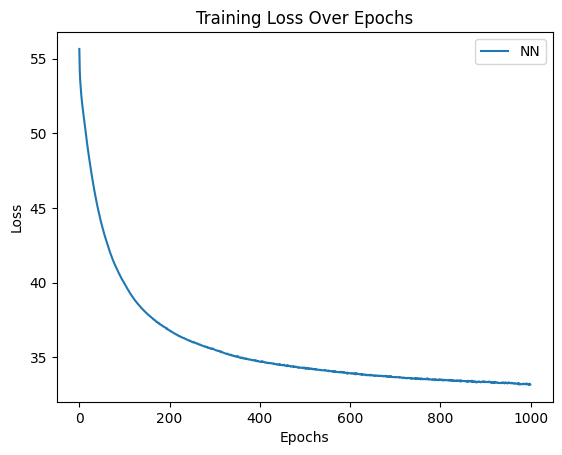

In [ ]:
rn_reg.plot_loss_history()

In [ ]:
predicciones_test = regresion_pipe_rn.predict(X_test_rn)
mse = mean_squared_error(y_test_rn, predicciones_test)
r2 = r2_score(y_test_rn, predicciones_test)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

94/94 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 47.89161904353876
R^2 Score: 0.3014283689360383


In [ ]:
rn_reg.save_model()

Las métricas brindadas por la red neuronal de regresión son mejores que las brindadas por la regresión lineal.

Las métricas obtenidas para la regresión con la red neuronal implementada experimentaron un aumento en comparación con los resultados obtenidos mediante modelos de regresión lineal. El Error Cuadrático Medio (MSE) reveló un valor de 47.89, mientras que el coeficiente de determinación (R^2) alcanzó un 0.30.

Es importante destacar que, debido a la naturaleza computacionalmente intensiva de las redes neuronales, configuramos los parámetros de manera que la ejecución se mantuviera dentro de límites razonables, limitando el tiempo de ejecución a 10 minutos. Dichos parámetros incluyeron 1000 épocas, un tamaño de lote (batch_size) de 100, y la presencia de solo tres capas de neuronas, cada una con un número reducido de unidades.

Si el objetivo es mejorar aún más la calidad del modelo, se sugiere considerar la posibilidad de ajustar los parámetros mencionados, como incrementar el número de épocas o el tamaño de lote, y la adición de más neuronas o capas ocultas. Sin embargo, se debe tener en cuenta que este aumento en la complejidad también puede requerir recursos computacionales adicionales y tiempo de entrenamiento más prolongado.

## Optimización de Hiperparámetros - NN Regresión

Realizaremos una optimización de hiperparámetros para la red neuronal de Regresión mediante Optuna.

Creamos una nueva función que crea tuberías únicamente para preprocesar los datos antes de encontrar los mejores hiperparámetros.

In [ ]:
def pipeline_preproc():
    columnas_numericas = X_rn.columns

    # Construir la tubería
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    transformers = [
        ('preprocesamiento', pipeline, columnas_numericas)]

    preprocessor = ColumnTransformer(transformers)

    return preprocessor

Crearemos también una nueva clase 'RedNeuronal_Regresion_HP, que permite optimizar hiperparámetros como el tamaño del lote (batch_size), el número de neuronas (num_neurons), el número de capas (num_layers), la tasa de aprendizaje (lr), y la función de activación (activation).

In [ ]:
class RedNeuronal_Regresion_HP(BaseEstimator, TransformerMixin):
    '''Clase de red neuronal de regresión para optimizar hiperparámetros'''
    def __init__(self, batch_size=100, num_neurons=10, num_layers=2, lr=0.001, activation='relu'):
        self.batch_size = batch_size
        self.num_neurons = num_neurons
        self.num_layers = num_layers
        self.lr = lr
        self.activation = activation
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(self.num_neurons, activation=self.activation, input_shape=(X_rn.shape[1],)))

        for _ in range(self.num_layers - 1):
            model.add(tf.keras.layers.Dense(self.num_neurons, activation=self.activation))

        model.add(tf.keras.layers.Dense(1))
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.lr), loss='mean_squared_error')
        return model

    def fit(self, X, y, epochs=10, verbose=0):
        X = np.array(X)
        y = np.array(y)
        history = self.model.fit(X, y, epochs=epochs, batch_size=self.batch_size, verbose=verbose)
        self.loss_history = history.history['loss']
        return self

    def transform(self, X):
        # Implementa la lógica de transformación si es necesario
        return X

    def predict(self, X):
        X = np.array(X)
        predictions = self.model.predict(X)
        return predictions

    def mostrar_metricas(self, y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        rmse = np.sqrt(mse)

        print(f'Mean Squared Error (MSE): {mse}')
        print(f'R^2 Score: {r2}')
        print(f'Root Mean Squared Error (RMSE): {rmse}')

    def plot_loss_history(self):
        plt.plot(self.loss_history, label='NN')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Epochs')
        plt.show()

        return self

    def plot_predicciones(self, y_true, y_pred):
        plt.scatter(y_true, y_pred)
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        plt.title('True Values vs Predictions')
        plt.show()

        return self

# Función objetivo para Optuna
def objective(trial):
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128, 300])
    num_neurons = trial.suggest_int('num_neurons', 5, 20, log=True)
    num_layers = trial.suggest_int('num_layers', 3, 5)
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh'])

    # Crear y ajustar la tubería en el conjunto de entrenamiento
    pipeline = pipeline_preproc()
    X_train_rn_preprocesado = pipeline.fit_transform(X_train_rn)
    X_test_rn_preprocesado = pipeline.transform(X_test_rn)

    # Creamos y entrenamos el modelo con los hiperparámetros sugeridos por Optuna
    model = RedNeuronal_Regresion_HP(batch_size=batch_size, num_neurons=num_neurons, num_layers=num_layers, lr=lr, activation=activation)
    model.fit(X_train_rn_preprocesado, y_train_rn, epochs=100, verbose=0)

    # predicciones en el conjunto de prueba
    predictions = model.predict(X_test_rn_preprocesado)

    # Calculamos el MSE
    mse = mean_squared_error(y_test_rn, predictions)
    return mse


# Construimos tubería y preprocesamos Xtrain y Xtest porque salía error por valores NaN.
pipeline = pipeline_preproc()
X_train_rn_preprocesado = pipeline.fit_transform(X_train_rn)
X_test_rn_preprocesado = pipeline.transform(X_test_rn)

# Creamos un estudio Optuna y optimizamos
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=15)

# Obtenemos los mejores hiperparámetros
best_params = study.best_params

[I 2023-12-07 04:39:09,698] A new study created in memory with name: no-name-367173aa-9208-461a-971a-a4d064c7c6b9


94/94 [==============================] - 0s 1ms/step


[I 2023-12-07 04:39:28,703] Trial 0 finished with value: 57.74215971937417 and parameters: {'batch_size': 128, 'num_neurons': 17, 'num_layers': 3, 'lr': 0.005438718709685894, 'activation': 'relu'}. Best is trial 0 with value: 57.74215971937417.


94/94 [==============================] - 0s 2ms/step


[I 2023-12-07 04:39:50,556] Trial 1 finished with value: 49.17360637110122 and parameters: {'batch_size': 128, 'num_neurons': 11, 'num_layers': 4, 'lr': 0.0009315768035449133, 'activation': 'sigmoid'}. Best is trial 1 with value: 49.17360637110122.


94/94 [==============================] - 0s 1ms/step


[I 2023-12-07 04:40:07,810] Trial 2 finished with value: 70.27532531415196 and parameters: {'batch_size': 128, 'num_neurons': 5, 'num_layers': 4, 'lr': 3.6816373393845575e-05, 'activation': 'sigmoid'}. Best is trial 1 with value: 49.17360637110122.


94/94 [==============================] - 0s 1ms/step


[I 2023-12-07 04:40:29,338] Trial 3 finished with value: 48.45671562059764 and parameters: {'batch_size': 128, 'num_neurons': 10, 'num_layers': 3, 'lr': 0.0006949166232222347, 'activation': 'sigmoid'}. Best is trial 3 with value: 48.45671562059764.


94/94 [==============================] - 0s 1ms/step


[I 2023-12-07 04:40:51,767] Trial 4 finished with value: 55.49623516014508 and parameters: {'batch_size': 128, 'num_neurons': 8, 'num_layers': 5, 'lr': 0.00101512039585617, 'activation': 'relu'}. Best is trial 3 with value: 48.45671562059764.


94/94 [==============================] - 0s 1ms/step


[I 2023-12-07 04:41:03,237] Trial 5 finished with value: 53.128648586859576 and parameters: {'batch_size': 300, 'num_neurons': 6, 'num_layers': 3, 'lr': 0.06790234012264404, 'activation': 'tanh'}. Best is trial 3 with value: 48.45671562059764.


94/94 [==============================] - 0s 1ms/step


[I 2023-12-07 04:41:24,907] Trial 6 finished with value: 55.07213777650801 and parameters: {'batch_size': 128, 'num_neurons': 10, 'num_layers': 3, 'lr': 0.0001766471282081837, 'activation': 'sigmoid'}. Best is trial 3 with value: 48.45671562059764.


94/94 [==============================] - 0s 1ms/step


[I 2023-12-07 04:42:31,351] Trial 7 finished with value: 51.212852309992044 and parameters: {'batch_size': 32, 'num_neurons': 15, 'num_layers': 5, 'lr': 1.653073265623601e-05, 'activation': 'relu'}. Best is trial 3 with value: 48.45671562059764.


94/94 [==============================] - 0s 1ms/step


[I 2023-12-07 04:43:02,200] Trial 8 finished with value: 52.70320358746877 and parameters: {'batch_size': 64, 'num_neurons': 15, 'num_layers': 3, 'lr': 1.630439924043816e-05, 'activation': 'relu'}. Best is trial 3 with value: 48.45671562059764.


94/94 [==============================] - 0s 1ms/step


[I 2023-12-07 04:44:08,799] Trial 9 finished with value: 59.70459513415244 and parameters: {'batch_size': 32, 'num_neurons': 15, 'num_layers': 5, 'lr': 0.010817752897855807, 'activation': 'sigmoid'}. Best is trial 3 with value: 48.45671562059764.


94/94 [==============================] - 0s 2ms/step


[I 2023-12-07 04:44:41,799] Trial 10 finished with value: 48.56235150113621 and parameters: {'batch_size': 64, 'num_neurons': 20, 'num_layers': 4, 'lr': 0.00013586568061368926, 'activation': 'tanh'}. Best is trial 3 with value: 48.45671562059764.


94/94 [==============================] - 0s 2ms/step


[I 2023-12-07 04:45:24,658] Trial 11 finished with value: 49.07510734528394 and parameters: {'batch_size': 64, 'num_neurons': 20, 'num_layers': 4, 'lr': 0.00016110311567574972, 'activation': 'tanh'}. Best is trial 3 with value: 48.45671562059764.


94/94 [==============================] - 0s 2ms/step


[I 2023-12-07 04:46:07,498] Trial 12 finished with value: 51.62994493544686 and parameters: {'batch_size': 64, 'num_neurons': 12, 'num_layers': 4, 'lr': 0.00013274279928830165, 'activation': 'tanh'}. Best is trial 3 with value: 48.45671562059764.


94/94 [==============================] - 0s 1ms/step


[I 2023-12-07 04:46:15,490] Trial 13 finished with value: 50.919137374034214 and parameters: {'batch_size': 300, 'num_neurons': 8, 'num_layers': 3, 'lr': 0.0005866519097078647, 'activation': 'tanh'}. Best is trial 3 with value: 48.45671562059764.


94/94 [==============================] - 0s 2ms/step


[I 2023-12-07 04:46:51,584] Trial 14 finished with value: 52.582140436478824 and parameters: {'batch_size': 64, 'num_neurons': 20, 'num_layers': 4, 'lr': 6.983306176931383e-05, 'activation': 'tanh'}. Best is trial 3 with value: 48.45671562059764.


In [ ]:
print("Mejores hiperparámetros:")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Número de Neuronas: {best_params['num_neurons']}")
print(f"Número de Capas: {best_params['num_layers']}")
print(f"Learning Rate: {best_params['lr']}")
print(f"Función de Activación: {best_params['activation']}")

Mejores hiperparámetros:
Batch Size: 128
Número de Neuronas: 10
Número de Capas: 3
Learning Rate: 0.0006949166232222347
Función de Activación: sigmoid


Una vez que conocemos los mejores hiperparámetros para la red neuronal, realizaremos un nuevo entrenamiento con dichos valores.

94/94 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 55.442305773899186
R^2 Score: 0.19129019340086562
Root Mean Squared Error (RMSE): 7.44595902311443





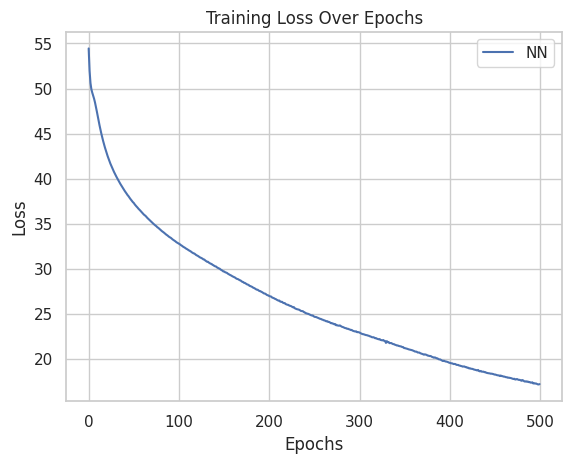

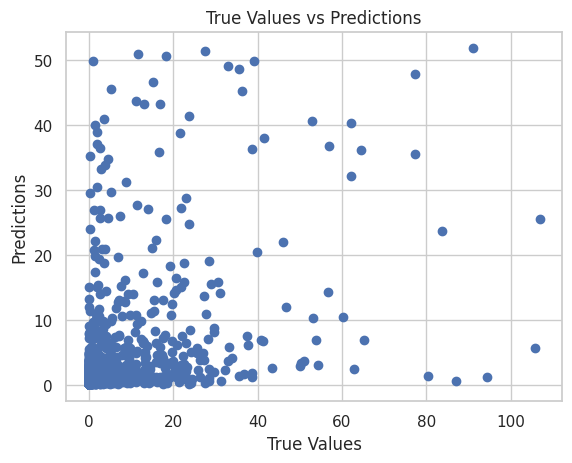

RedNeuronal_Regresion_HP(activation='sigmoid', batch_size=128,
                         lr=0.0006949166232222347, num_layers=3)

In [ ]:
# Creamos y ajustamos la tubería en el conjunto de entrenamiento con los mejores hiperparámetros
best_pipeline_reg = pipeline_preproc()
X_train_rn_preprocesado = best_pipeline_reg.fit_transform(X_train_rn)
X_test_rn_preprocesado = best_pipeline_reg.transform(X_test_rn)

# Creamos y entrenamos el modelo con los mejores hiperparámetros
best_model = RedNeuronal_Regresion_HP(**best_params)
best_model.fit(X_train_rn_preprocesado, y_train_rn, epochs=500, verbose=0)

# Realizamos predicciones en el conjunto de prueba
predictions = best_model.predict(X_test_rn_preprocesado)

# Mostramos métricas y gráficos
best_model.mostrar_metricas(y_test_rn, predictions)
print("\n\n")
best_model.plot_loss_history()
print("\n\n")
best_model.plot_predicciones(y_test_rn, predictions)

Vemos que al entrenar nuevamente el modelo con los mejores hiperparámetros encontrados por Optuna, las métricas siguien siendo mejores en nuestro modelo entrenado anteriormente.

## Red Neuronal de Clasificación
Construimos el modelo de red neuronal para clasificación. Aquí, tenemos que notar diversas diferencias con el modelo de regresión.

La primera diferencia es la variable objetivo: debemos transformala de los valores 'Yes' y 'No' a 1 y 0 para que pueda ser reconocida por la red.

La otra diferencia es la última capa: como podemos notar, usamos una capa Dense con una única neurona con activación sigmoidea. De esta manera, la salida es un valor en el intervalo [0,1] que representa la posibilidad de que el registro corresponda a la clase 1. Entonces, debemos agregar a esta última capa un umbral. Esto lo haremos luego de hacer la predicción.
## Capas
En el modelo tenemos 4 capas:
- La capa de entrada, donde cargamos las variables independientes en una capa de 10 neuronas con activación relu.
- Dos capas intermedias, de 5 neuronas con activación relu.
- Capa final, de una neurona con activación sigmoidea.


La clase definida nos permite tanto iniciar como reanudar el entrenamiento del modelo, así como graficar los errores de las épocas de la sesión actual.

También podemos guardar y cargar el modelo para reanudar el entrenamiento.

In [3]:
class RedNeuronal_Clasificacion(BaseEstimator, TransformerMixin):
    def __init__(self, lr=0.1, epochs=1000, batch_size=100):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = self.build_model()

    def build_model(self):
        '''Construye el modelo'''
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation='relu', input_shape=(15,)),
            tf.keras.layers.Dense(5, activation='relu'),  # Capa oculta
            tf.keras.layers.Dense(5, activation='relu'),  # Capa oculta
            tf.keras.layers.Dense(1, activation='sigmoid')  # Capa output, al ser clasificación usamos una única neurona de salida con activación sigmoidea
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # usamos como pérdida la entropía binaria usando como métrica la precisión
        print("Número de parámetros:", model.count_params())
        return model

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        history = self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        self.loss_history = history.history['loss']
        return self

    def transform(self, X):
        # Implementa la lógica de transformación si es necesario
        return X

    def plot_loss_history(self):
        '''Grafica training loss a medida que aumentan las épocas'''
        plt.plot(self.loss_history, label='NN')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Epochs')
        plt.show()

    def predict(self, X):
        X = np.array(X)
        predictions = self.model.predict(X)
        return (predictions > 0.5).astype(int)

    def score(self, X, y):
        X = np.array(X)
        y = np.array(y)
        _, accuracy = self.model.evaluate(X, y)
        return accuracy

    def save_model(self, filepath='model_classification.h5'):
        '''
        Guarda el modelo en un archivo dado por el filepath.
        '''
        self.model.save(filepath)

    def load_model(self, filepath='model_classification.h5'):
        '''
        Carga el modelo desde un archivo dado por el filepath.
        '''
        self.model = tf.keras.models.load_model(filepath)

NameError: ignored

A continuación, balanceamos los datos de entrenamiento, creamos una instancia de la clase anterior, y construimos una pipeline.

In [ ]:
X_log = df_regresion[['Cloud3pm', 'Cloud9am', 'Evaporation', 'Humidity3pm', 'Humidity9am', 'Location_Canberra', 'Location_Melbourne',
                      'Location_MelbourneAirport', 'Location_Sydney', 'Location_SydneyAirport', 'MaxTemp', 'MinTemp', 'Month_Apr',
                      'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov',
                      'Month_Oct', 'Month_Sep', 'Pressure3pm', 'Pressure9am', 'RainToday_No', 'RainToday_Yes', 'Rainfall', 'Sunshine',
                      'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
                      'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
                      'WindGustDir_WNW', 'WindGustDir_WSW', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'WindSpeedDiff']]   # Variables predictoras

y_log = df_regresion['RainTomorrow_Yes'] # Variable a predecir

X_trainlog, X_testlog, y_trainlog, y_testlog = train_test_split(X_log, y_log, test_size=0.2,random_state = 42)

# Balancear los datos de entrenamiento
X_train_balanced, y_train_balanced = resample(X_trainlog[y_trainlog == 1], y_trainlog[y_trainlog == 1], n_samples=len(X_trainlog[y_trainlog == 0]), random_state=42)
X_train_balanced = pd.concat([X_trainlog[y_trainlog == 0], X_train_balanced])
y_train_balanced = pd.concat([y_trainlog[y_trainlog == 0], y_train_balanced])

rn_clf = RedNeuronal_Clasificacion()
clf_pipe_rn = construir_pipeline(X_log, y_log, modelo=rn_clf)



clf_pipe_rn.fit(X_train_balanced, y_train_balanced)

Número de parámetros: 251


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Cloud3pm', 'Cloud9am', 'Evaporation', 'Humidity3pm', 'Humidity9am',
       'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am', 'Rainfall',
       'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am',
       'WindSpeedDiff'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index([], dtype='object'))])),
                ('regressor', RedNeuronal_Clasificacion())])

In [ ]:
# Predicciones sobre los datos de entrenamiento (balanceados)
y_train_pred = clf_pipe_rn.predict(X_train_balanced)

# Predicciones sobre los datos de prueba
y_test_pred = clf_pipe_rn.predict(X_testlog)

# Métricas en datos de entrenamiento balanceados
print("\n Métricas en datos de entrenamiento balanceados:")
print("Accuracy:", accuracy_score(y_train_balanced, y_train_pred))
print("Precision:", precision_score(y_train_balanced, y_train_pred))
print("Recall:", recall_score(y_train_balanced, y_train_pred))
print("F1 Score:", f1_score(y_train_balanced, y_train_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_train_balanced, y_train_pred))

# Métricas en datos de prueba
print("\nMétricas en datos de prueba:")
print("Accuracy:", accuracy_score(y_testlog, y_test_pred))
print("Precision:", precision_score(y_testlog, y_test_pred))
print("Recall:", recall_score(y_testlog, y_test_pred))
print("F1 Score:", f1_score(y_testlog, y_test_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_testlog, y_test_pred))

94/94 [==============================] - 0s 3ms/step

 Métricas en datos de entrenamiento balanceados:
Accuracy: 0.8023768552376855
Precision: 0.7900546786340659
Recall: 0.8236179823617983
F1 Score: 0.8064872834500554

 Confusion Matrix:
 [[7263 2035]
 [1640 7658]]

Métricas en datos de prueba:
Accuracy: 0.7716090425531915
Precision: 0.512014787430684
Recall: 0.7769985974754559
F1 Score: 0.6172701949860725

 Confusion Matrix:
 [[1767  528]
 [ 159  554]]


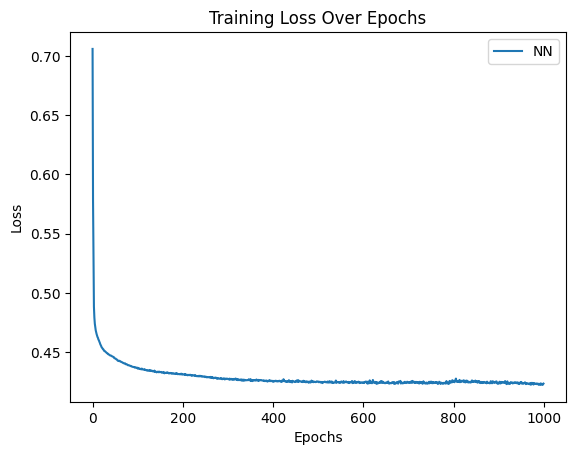

In [ ]:
rn_clf.plot_loss_history()

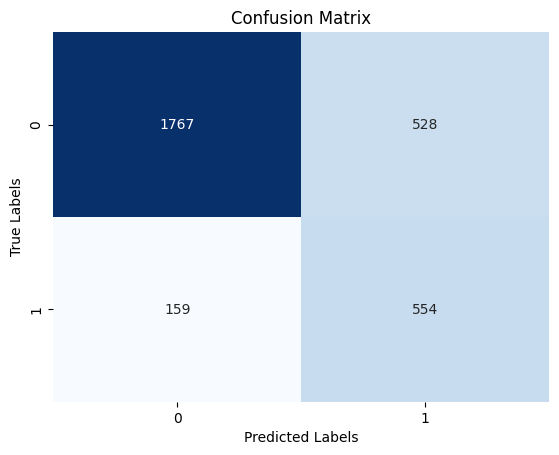

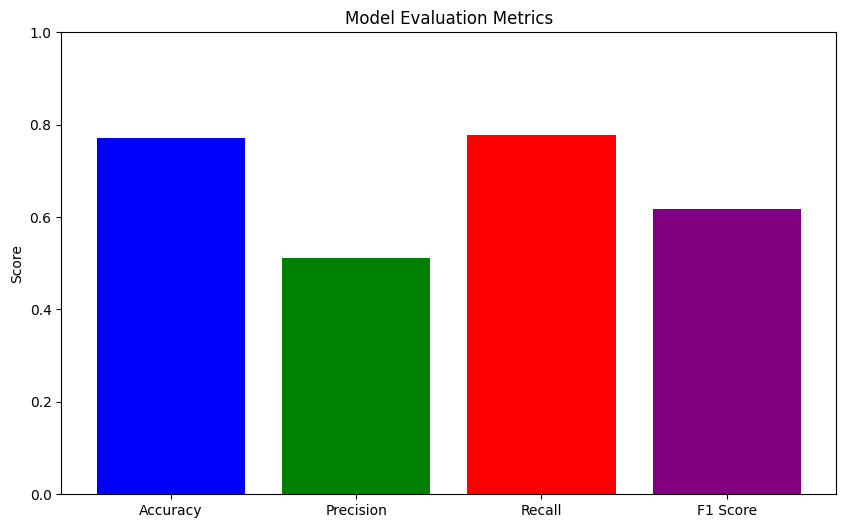

In [ ]:
# Graficar la matriz de confusión
cm = confusion_matrix(y_testlog, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
# Graficar otras métricas
plt.figure(figsize=(10, 6))
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy_score(y_testlog, y_test_pred), precision_score(y_testlog, y_test_pred), recall_score(y_testlog, y_test_pred), f1_score(y_testlog, y_test_pred)], color=['blue', 'green', 'red', 'purple'])
plt.ylim([0, 1])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()

Como vemos, el modelo percibe una leve mejora.

Esto puede ser mejorado con más capas o más neuronas, o revisando las funciones de activación de las capas, ya que los errores de entrenamiento se estancan al continuar entrenando.

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_testlog, y_test_pred)

# Calculate AUC-ROC
roc_auc = auc(fpr, tpr)
print(f'ROC: {roc_auc}')

ROC: 0.7734666189991658


In [ ]:
rn_clf.save_model()

## Optimización de Hiperparámetros - NN Clasificación

Creamos la clase RedNeuronal_Clasificacion_HP con el propósito de facilitar la optimización de hiperparámetros para modelos de red neuronal de clasificación mediante la herramienta Optuna. Esta clase encapsula la arquitectura de la red neuronal, permitiendo la variación de hiperparámetros clave como el tamaño del lote (batch_size), el número de neuronas en cada capa (num_neurons), la cantidad de capas ocultas (num_layers), la tasa de aprendizaje (lr), y la función de activación (activation).

La función objetivo objective_clasificacion se diseñó para ser utilizada con Optuna y realiza la optimización minimizando el error de clasificación en el conjunto de prueba. En particular, esta función balancea los datos de entrenamiento antes de preprocesarlos y ajustar el modelo, buscando mejorar la capacidad del modelo para generalizar a clases minoritarias. La optimización se realiza a través de múltiples iteraciones (n_trials) donde Optuna busca automáticamente los mejores conjuntos de hiperparámetros que minimizan la métrica de error.

In [ ]:
class RedNeuronal_Clasificacion_HP(BaseEstimator, TransformerMixin):
    '''Clase de red neuronal de clasificación para optimizar hiperparámetros'''
    def __init__(self, batch_size=100, num_neurons=10, num_layers=2, lr=0.001, activation='relu'):
        self.batch_size = batch_size
        self.num_neurons = num_neurons
        self.num_layers = num_layers
        self.lr = lr
        self.activation = activation
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(self.num_neurons, activation=self.activation, input_shape=(X_log.shape[1],)))

        for _ in range(self.num_layers - 1):
            model.add(tf.keras.layers.Dense(self.num_neurons, activation=self.activation))

        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.lr), loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y, epochs=10, verbose=0):
        X = np.array(X)
        y = np.array(y)
        history = self.model.fit(X, y, epochs=epochs, batch_size=self.batch_size, verbose=verbose)
        self.loss_history = history.history['loss']
        return self

    def transform(self, X):
        # Implementa la lógica de transformación si es necesario
        return X

    def predict(self, X):
        X = np.array(X)
        predictions = self.model.predict(X)
        return (predictions > 0.5).astype(int)

    def score(self, X, y):
        X = np.array(X)
        y = np.array(y)
        _, accuracy = self.model.evaluate(X, y)
        return accuracy

    def mostrar_metricas(self, X, y):
        predictions = self.predict(X)
        accuracy = accuracy_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)
        f1 = f1_score(y, predictions)

        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}')

    def plot_loss_history(self):
        plt.plot(self.loss_history, label='NN')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Epochs')
        plt.show()

        return self

    def plot_roc_curve(self, X, y):
        predictions = self.predict(X)
        fpr, tpr, _ = roc_curve(y, predictions)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

        return self


# Función objetivo para Optuna
def objective_clasificacion(trial):
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128, 300])
    num_neurons = trial.suggest_int('num_neurons', 5, 20, log=True)
    num_layers = trial.suggest_int('num_layers', 3, 5)
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh'])

    # Balancear los datos de entrenamiento
    X_train_balanced, y_train_balanced = resample(X_trainlog[y_trainlog == 1], y_trainlog[y_trainlog == 1], n_samples=len(X_trainlog[y_trainlog == 0]), random_state=42)
    X_train_balanced = pd.concat([X_trainlog[y_trainlog == 0], X_train_balanced])
    y_train_balanced = pd.concat([y_trainlog[y_trainlog == 0], y_train_balanced])

    # Creamos y ajustamos la tubería en el conjunto de entrenamiento
    pipeline = pipeline_preproc()
    X_trainlog_preprocesado = pipeline.fit_transform(X_train_balanced)
    X_testlog_preprocesado = pipeline.transform(X_testlog)

    # Creamos y entrenamos el modelo con los hiperparámetros sugeridos por Optuna
    model = RedNeuronal_Clasificacion_HP(batch_size=batch_size, num_neurons=num_neurons, num_layers=num_layers, lr=lr, activation=activation)
    model.fit(X_trainlog_preprocesado, y_train_balanced, epochs=10, verbose=0)

    # predicciones en el conjunto de prueba
    predictions = model.predict(X_testlog_preprocesado)

    # Calculamos el accuracy
    accuracy = accuracy_score(y_testlog, predictions)
    return 1 - accuracy # Optuna minimiza, así que invertimos el accuracy

# Creamos un estudio Optuna y optimizamos
study_clasificacion = optuna.create_study(direction='minimize')
study_clasificacion.optimize(objective_clasificacion, n_trials=15)

# Obtenemos los mejores hiperparámetros
best_params_clasificacion = study_clasificacion.best_params

[I 2023-12-08 01:59:47,265] A new study created in memory with name: no-name-06e970f6-3f9d-47df-b7bf-e1dba03a962a


94/94 [==============================] - 2s 13ms/step


[I 2023-12-08 02:00:13,009] Trial 0 finished with value: 0.26196808510638303 and parameters: {'batch_size': 300, 'num_neurons': 8, 'num_layers': 4, 'lr': 0.0005396135491012808, 'activation': 'relu'}. Best is trial 0 with value: 0.26196808510638303.


94/94 [==============================] - 2s 15ms/step


[I 2023-12-08 02:00:48,964] Trial 1 finished with value: 0.21841755319148937 and parameters: {'batch_size': 128, 'num_neurons': 11, 'num_layers': 4, 'lr': 0.00016721081035620566, 'activation': 'tanh'}. Best is trial 1 with value: 0.21841755319148937.


94/94 [==============================] - 1s 7ms/step


[I 2023-12-08 02:01:08,012] Trial 2 finished with value: 0.24368351063829785 and parameters: {'batch_size': 128, 'num_neurons': 16, 'num_layers': 4, 'lr': 0.03800271058422453, 'activation': 'relu'}. Best is trial 1 with value: 0.21841755319148937.


94/94 [==============================] - 1s 6ms/step


[I 2023-12-08 02:01:15,171] Trial 3 finished with value: 0.23105053191489366 and parameters: {'batch_size': 300, 'num_neurons': 9, 'num_layers': 3, 'lr': 0.040125850299988636, 'activation': 'relu'}. Best is trial 1 with value: 0.21841755319148937.


94/94 [==============================] - 1s 6ms/step - loss: 0.4513 - accuracy: 0.7859


[I 2023-12-08 02:01:34,296] Trial 0 finished with value: 0.21409577131271362 and parameters: {'lr': 0.017350245381421898, 'epochs': 439, 'batch_size': 128}. Best is trial 0 with value: 0.21409577131271362.


94/94 [==============================] - 1s 6ms/step


[I 2023-12-08 02:01:43,468] Trial 4 finished with value: 0.21609042553191493 and parameters: {'batch_size': 32, 'num_neurons': 13, 'num_layers': 3, 'lr': 1.4023534534787347e-05, 'activation': 'sigmoid'}. Best is trial 4 with value: 0.21609042553191493.


94/94 [==============================] - 1s 6ms/step


[I 2023-12-08 02:02:24,138] Trial 5 finished with value: 0.30618351063829785 and parameters: {'batch_size': 32, 'num_neurons': 9, 'num_layers': 4, 'lr': 1.985939390028111e-05, 'activation': 'relu'}. Best is trial 4 with value: 0.21609042553191493.


94/94 [==============================] - 1s 10ms/step


[I 2023-12-08 02:02:40,248] Trial 6 finished with value: 0.22273936170212771 and parameters: {'batch_size': 128, 'num_neurons': 11, 'num_layers': 4, 'lr': 0.002831417263618035, 'activation': 'sigmoid'}. Best is trial 4 with value: 0.21609042553191493.


94/94 [==============================] - 1s 6ms/step


[I 2023-12-08 02:03:27,972] Trial 7 finished with value: 0.24468085106382975 and parameters: {'batch_size': 32, 'num_neurons': 9, 'num_layers': 5, 'lr': 0.001367251716356048, 'activation': 'relu'}. Best is trial 4 with value: 0.21609042553191493.


94/94 [==============================] - 1s 5ms/step


[I 2023-12-08 02:03:42,609] Trial 8 finished with value: 0.3896276595744681 and parameters: {'batch_size': 128, 'num_neurons': 9, 'num_layers': 3, 'lr': 1.0172365861052754e-05, 'activation': 'tanh'}. Best is trial 4 with value: 0.21609042553191493.


94/94 [==============================] - 1s 7ms/step


[I 2023-12-08 02:05:10,597] Trial 9 finished with value: 0.21509308510638303 and parameters: {'batch_size': 32, 'num_neurons': 7, 'num_layers': 5, 'lr': 0.0003423295274927176, 'activation': 'tanh'}. Best is trial 9 with value: 0.21509308510638303.


94/94 [==============================] - 2s 14ms/step


[I 2023-12-08 02:05:44,146] Trial 10 finished with value: 0.2217420212765957 and parameters: {'batch_size': 64, 'num_neurons': 5, 'num_layers': 5, 'lr': 0.00011887366527194638, 'activation': 'tanh'}. Best is trial 9 with value: 0.21509308510638303.


94/94 [==============================] - 1s 5ms/step


[I 2023-12-08 02:07:15,298] Trial 11 finished with value: 0.2529920212765957 and parameters: {'batch_size': 32, 'num_neurons': 17, 'num_layers': 3, 'lr': 4.8241887612365445e-05, 'activation': 'sigmoid'}. Best is trial 9 with value: 0.21509308510638303.


94/94 [==============================] - 1s 5ms/step


[I 2023-12-08 02:07:56,026] Trial 12 finished with value: 0.1708776595744681 and parameters: {'batch_size': 32, 'num_neurons': 6, 'num_layers': 5, 'lr': 4.559345650576014e-05, 'activation': 'sigmoid'}. Best is trial 12 with value: 0.1708776595744681.


94/94 [==============================] - 1s 5ms/step


[I 2023-12-08 02:08:42,589] Trial 13 finished with value: 0.22340425531914898 and parameters: {'batch_size': 32, 'num_neurons': 6, 'num_layers': 5, 'lr': 0.00021289272214194317, 'activation': 'tanh'}. Best is trial 12 with value: 0.1708776595744681.


94/94 [==============================] - 1s 6ms/step


[I 2023-12-08 02:09:11,095] Trial 14 finished with value: 0.7629654255319149 and parameters: {'batch_size': 64, 'num_neurons': 7, 'num_layers': 5, 'lr': 5.375246995897538e-05, 'activation': 'sigmoid'}. Best is trial 12 with value: 0.1708776595744681.


In [ ]:
print("Mejores hiperparámetros:")
print(f"Batch Size: {best_params_clasificacion['batch_size']}")
print(f"Número de Neuronas: {best_params_clasificacion['num_neurons']}")
print(f"Número de Capas: {best_params_clasificacion['num_layers']}")
print(f"Learning Rate: {best_params_clasificacion['lr']}")
print(f"Función de Activación: {best_params_clasificacion['activation']}")

Mejores hiperparámetros:
Batch Size: 32
Número de Neuronas: 6
Número de Capas: 5
Learning Rate: 4.559345650576014e-05
Función de Activación: sigmoid


# SHAP
A medida que vamos desarrollando cada uno de los modelos nos encontramos con uno de los problemas más importantes de estos: su interpretabilidad. Si bien contamos con las métricas de cada uno y podemos hacer inferencia con datos propios, realmente no sabemos que pasa dentro del modelo. Incluso para el caso de regresión lineal, que contamos con los coeficientes, tenemos únicamente una explicación global del modelo, no tenemos un análisis local claro.

SHAP es una librería que nos permite dar explicatividad a una gran amplia cantidad de modelos. Mediante el SHAP value, se puede determinar cuán importante es una variable en una predicción en particular. De esta manera, se nos otorga la posibilidad de dar interpretación local.

También podemos dar con una interpretación global, teniendo en cuenta el promedio del SHAP value de cada variable, es decir, cuánto impacta cada variable en las predicciones.

## Visualizaciones
Para visualizar los valores SHAP, contamos con 4 gráficos: dos locales y dos globales.
### Locales
Sobre una predicción en particular
- Force plot: Comenzando desde un valor base, se muestra cuánto aporta cada variable mediante su valor SHAP hasta llegar a la predicción final.
- Waterfall plot: Casi identico al force plot, además nos ordena de mayor a menor las variables más influyentes.
### Globales
- Summary plot: Como mencionamos antes, se observa el promedio de los valores SHAP de cada variable.
- Beeswarm plot: Por cada variable se realiza un gráfico de dispersión respecto al valor shap que tiene cada registro. Aquellas secciones en donde haya una mayor densidad de puntos se acumularán verticalmente. Cuenta con colores que representan el valor relativo que tiene cada parametro (alto o bajo)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.9 MB/s eta 0:00:00


In [2]:
from sklearn.model_selection import train_test_split
class SHAP_analysis():
  def __init__(self):
    self.model = None

  def load_train_test(self, X_train, X_test, y_train, y_test):
    '''Método por si se quieren cargar los datos manualmente'''
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test

  def load_model(self, model):
    '''
    Método para cargar el modelo y crear el análisis shap
    '''
    self.model = model
    # Inicializamos el explicador shap
    X_train_summary = shap.kmeans(self.X_train, 10) # Tenemos que compactar los datos que le damos al explicador por temas de memoria dinámica
    X_train_summary = shap.sample(self.X_train, 1000)
    self.explainer = shap.DeepExplainer(model,np.array(X_train_summary))
    self.expected_value = float(self.explainer.expected_value[0])
    try:
      self.shap_values = self.explainer.shap_values(np.array(self.X_test))
    except AttributeError:
      print('Error, no se han cargado los datos X,y')
      return
    self.explanation = shap.Explanation(values=self.shap_values[0], feature_names=self.X_train.columns.values)

  # Hallar percentil en el conjunto de test.
  # Nota: Como los shap_values son calculados sobre el conjunto de test, debemos hacer este cálculo respecto de este conjunto.
  def find_quantile(self,quantile=0.5):
    '''Buscar el indice del registro en shap_values correspondiente al cuartil'''
    if type(self.y_test) == np.ndarray:
      reset_index_array = pd.Series(self.y_test.flatten()).reset_index(drop=True) # Pasamos a series para dar robustez
    else:
      reset_index_array = self.y_test.reset_index(drop=True)
    sorted_y_test = reset_index_array.sort_values()
    reset_index_array = sorted_y_test.reset_index()
    quantile_index = int(len(reset_index_array) * quantile)
    return reset_index_array['index'][quantile_index]

  # Visualizaciones locales
  def waterfall(self, register_index=0):
    shap.plots._waterfall.waterfall_legacy(self.expected_value, self.shap_values[0][register_index], feature_names=self.X_train.columns.values) # LOCAL, ver https://github.com/shap/shap/issues/1420

  def force_plot(self, register_index=0):
    shap.plots.force(self.expected_value, self.shap_values[0][register_index], self.X_test.iloc[register_index], matplotlib=True) # LOCAL

  # Visualizaciones globales
  def summary(self, max_display=None):
    shap.summary_plot(self.shap_values, self.X_test, feature_names=self.X_train.columns.values, plot_size=[10,6], max_display=max_display, title='Summary plot') # GLOBAL

  def beeswarm(self, max_display=None):
    shap.summary_plot(self.explanation, features= self.X_test, max_display=max_display, title='Beeswarm plot') # GLOBAL Ver error: https://stackoverflow.com/questions/75065673/deepshap-beeswarm-plot-only-shows-blue-dots-and-does-not-have-a-color-gradient-t


In [6]:
class RedNeuronal_Regresion():
    def __init__(self):
      self.model = None

    def build_model(self, X):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, input_shape=(X.shape[1],)),
            tf.keras.layers.LeakyReLU(alpha=0.01),
            tf.keras.layers.Dropout(0.6),
            tf.keras.layers.Dense(6), # capa oculta
            tf.keras.layers.LeakyReLU(alpha=0.01),
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.Dense(6), # capa oculta
            tf.keras.layers.LeakyReLU(alpha=0.01),
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.Dense(6), # capa oculta
            tf.keras.layers.LeakyReLU(alpha=0.01),
            tf.keras.layers.Dense(1)
        ])
        custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
        ### Cantidad de parámetros
        print("n° de parámetros:", model.count_params())
        return model

    def fit(self, X, y, lr=0.1, epochs=100, batch_size=100):
        X = np.array(X)
        y = np.array(y)
        history = self.model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
        self.loss_history = history.history['loss']
        return history.history['loss']

    def plot_loss_history(self):
        plt.plot(self.loss_history, label='NN')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Epochs')
        plt.show()

    def predict(self, X):
        X = np.array(X)
        predictions = self.model.predict(X)
        return predictions

    def save_model(self, filepath='model_regression.h5'):
        '''
        Guarda el modelo en un archivo dado por el filepath.
        '''
        self.model.save(filepath)

    def load_model(self, filepath='model_regression.h5'):
        '''
        Carga el modelo desde un archivo dado por el filepath.
        '''
        self.model = tf.keras.models.load_model(filepath)

class RedNeuronal_Clasificacion():
    def __init__(self):
      self.model = None

    def build_model(self, X):
        '''
        Construye un modelo de red neuronal con las capas y funciones de activación especificadas,
        se necesita brindar el vector X de variables independientes
        '''
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation='relu', input_shape=(X.shape[1],)),
            tf.keras.layers.Dense(5, activation='relu'), # capa oculta
            tf.keras.layers.Dense(5, activation='relu'), # capa oculta
            tf.keras.layers.Dense(1, activation='sigmoid') # Capa output, al ser clasificación usamos una única neurona de salida con activación sigmoidea
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # usamos como pérdida la entropía binaria usando como métrica la precisión
        ### imprimimos la cantidad de parámetros a modo de ejemplo
        print("n° de parámetros:", model.count_params())
        return model

    def fit(self, X, y, lr=0.1, epochs=1000, batch_size=100):
        ### esta es la función donde se entrena el modelo, fijarse que hay un learning rate e iteraciones.
        ### la función que fitea devuelve una historia de pérdida, que vamos a guardar para graficar la evolución.
        X = np.array(X)
        y = np.array(y)
        history = self.model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
        self.loss_history = history.history['loss']
        return history.history['loss']

    def plot_loss_history(self):
        plt.plot(self.loss_history, label='NN')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Epochs')
        plt.show()

    def predict(self, X):
        X = np.array(X)
        predictions = self.model.predict(X)
        return predictions

    def save_model(self, filepath='model_classification.h5'):
        '''
        Guarda el modelo en un archivo dado por el filepath.
        '''
        self.model.save(filepath)

    def load_model(self, filepath='model_classification.h5'):
        '''
        Carga el modelo desde un archivo dado por el filepath.
        '''
        self.model = tf.keras.models.load_model(filepath)

In [9]:
data = pd.read_csv('data.csv')
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

from sklearn.model_selection import train_test_split
# Datos ya estandarizados
X = data[['Location', 'MinTemp', 'MaxTemp', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Month']]
X = pd.get_dummies(X)
X.columns

y = data['RainTomorrow']
y = y.map({'Yes':1,'No':0})

X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(X,y.values.reshape(-1,1),test_size=0.2,random_state = 42)

y = data['RainfallTomorrow']

X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X,y,test_size=0.3,random_state = 42)

9773      0.0
9971      1.0
911      16.4
8180      0.0
13161     0.0
         ... 
5191      0.0
13418     0.0
5390      0.0
860       0.0
7270     20.8
Name: RainfallTomorrow, Length: 10525, dtype: float64

In [17]:
red_neuronal = RedNeuronal_Regresion()
red_neuronal.load_model()

red_clasificacion = RedNeuronal_Clasificacion()
red_clasificacion.load_model()

In [11]:
shap_analyzer = SHAP_analysis()
shap_analyzer.load_train_test(X_train_rn, X_test_rn, y_train_rn, y_test_rn)
shap_analyzer.load_model(red_neuronal.model)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


ValueError: ignored

In [18]:
shap_analyzer_clas = SHAP_analysis()
shap_analyzer_clas.load_train_test(X_train_clas, X_test_clas, y_train_clas, y_test_clas)
shap_analyzer_clas.load_model(red_clasificacion.model)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


ValueError: ignored

In [ ]:
reset_index_array = shap_analyzer.y_test.reset_index(drop=True)
sorted_y_test = reset_index_array.sort_values()
reset_index_array = sorted_y_test.reset_index()
reset_index_array['index'][1]

In [ ]:
for percentil in [0.5,0.8,0.99]:
  print(f'Force plot y waterfall en percentil {percentil}')
  print(shap_analyzer.find_quantile(percentil))
  shap_analyzer.force_plot(shap_analyzer.find_quantile(percentil))
  shap_analyzer.waterfall(shap_analyzer.find_quantile(percentil))

In [ ]:
shap_analyzer.summary()
shap_analyzer.beeswarm()

# Conclusiones del trabajo

A lo largo de este estudio, hemos aplicado diversas técnicas de Aprendizaje Automático para abordar la predicción de dos variables: 'RainTomorrow' (indicando si lloverá o no mañana) y 'RainfallTomorrow' (cuánto lloverá).

El análisis inicial incluyó una exploración exhaustiva del conjunto de datos, que abarcó la revisión de columnas, datos, distribuciones, valores atípicos y nulos. Utilizamos una variedad de visualizaciones, desde histogramas y boxplots hasta un mapa de calor para analizar correlaciones.

Durante esta exploración, identificamos variables altamente correlacionadas, algunas con coeficientes de Pearson tan altos como 0.97, especialmente entre las variables de temperatura.

Posteriormente, entrenamos varios modelos de regresión lineal, tanto con validación cruzada k=5 tratando y sin tratar outliers. El objetivo era encontrar la combinación óptima de columnas que maximizara las métricas de rendimiento. Finalmente, seleccionamos la configuración de columnas del tercer modelo debido a sus resultados superiores.

Exploramos el gradiente descendente y la regresión lineal, observando que, en este caso, la regresión lineal proporcionaba métricas más favorables. Realizamos una optimización de hiperparámetros, ajustando learning rates y epochs mediante grid search.

En el ámbito de la regularización, aplicamos técnicas como Lasso, Ridge y Elastic Net. Observamos que las diferencias entre los modelos con y sin regularización fueron mínimas, y las métricas apenas variaron, sugiriendo que la regularización no aportaba significativamente en este contexto.

Para abordar la predicción de 'RainTomorrow' con regresión logística, enfrentamos el desafío de un conjunto de datos desbalanceado y lo balanceamos para mejorar la capacidad del modelo para prever eventos de lluvia. Tras este proceso, observamos mejoras en las métricas y, sorprendentemente, al volver a entrenar el modelo de regresión lineal con datos balanceados, también notamos mejoras adicionales.

Adicionalmente, implementamos modelos base para establecer una referencia inicial y entender las métricas esperadas. A pesar de nuestras expectativas, las métricas de clasificación resultaron ser mejores de lo anticipado, lo cual puede atribuirse al predominio de días sin lluvia en el conjunto de datos.

Finalmente, exploramos clases de redes neuronales para clasificación y regresión. Ajustamos manualmente distintos hiperparámetros, como capas, neuronas y tamaños de batches, y posteriormente, utilizando Optuna, identificamos los mejores hiperparámetros.

Además, empleamos la librería SHAP para entender la influencia de las variables en el entrenamiento del modelo, tanto a nivel global como local.

Finalmente, pusimos en producción nuestro trabajo mediante una interfaz de joblib, seleccionando los modelos de redes neuronales que proporcionaron el mejor rendimiento y desarrollando un script .py para su implementación. Este proceso asegura que nuestro modelo pueda ser utilizado en entornos productivos de manera eficiente y escalable.